Check for prerequisites


In [ ]:
# Cell: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create project folder
!mkdir -p "/content/drive/MyDrive/EdgeMIN_Project"

# Set working directory
import os
os.chdir("/content/drive/MyDrive/EdgeMIN_Project")

print("✅ Working directory:", os.getcwd())

Mounted at /content/drive
✅ Working directory: /content/drive/MyDrive/EdgeMIN_Project


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cell 1: Check your runtime
import torch
import psutil
import os

print("=== RUNTIME CHECK ===")
print(f"GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
print(f"System RAM: {psutil.virtual_memory().total / 1e9:.2f} GB")
print(f"Disk Space Free: {psutil.disk_usage('/').free / 1e9:.2f} GB")

# CRITICAL: You MUST have GPU enabled
# Go to: Runtime → Change runtime type → T4 GPU

=== RUNTIME CHECK ===
GPU Available: True
GPU Name: Tesla T4
GPU Memory: 15.83 GB
System RAM: 13.61 GB
Disk Space Free: 78.65 GB


Install dependencies

In [ ]:
# Cell 2: Minimal install (let dependencies resolve automatically)

!pip install -q --upgrade transformers datasets evaluate accelerate
!pip install -q scikit-learn pandas matplotlib seaborn

# Verify
import transformers
import datasets
import evaluate
print("✅ All libraries installed!")
print(f"Transformers: {transformers.__version__}")
print(f"Datasets: {datasets.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.6/503.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.9/374.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 29.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.1 requires scikit-learn, which is not installed.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, which is not installed.
cudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 21.0.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.9.0 which is incompatible.
pylibcudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.

In [ ]:
# This downloads automatically - just to show you what it contains
from datasets import load_dataset

# Download SST-2 (Stanford Sentiment Treebank)
dataset_sst2 = load_dataset("glue", "sst2")

print("=== SST-2 DATASET ===")
print(f"Train samples: {len(dataset_sst2['train'])}")
print(f"Validation samples: {len(dataset_sst2['validation'])}")
print(f"Test samples: {len(dataset_sst2['test'])}")

# Show example
print("\nExample:")
print(dataset_sst2['train'][0])
# Output: {'sentence': 'hide new secretions from the parental units', 'label': 0, 'idx': 0}

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

=== SST-2 DATASET ===
Train samples: 67349
Validation samples: 872
Test samples: 1821

Example:
{'sentence': 'hide new secretions from the parental units ', 'label': 0, 'idx': 0}


In [ ]:
from transformers import AutoModel, AutoTokenizer

teacher = AutoModel.from_pretrained("distilbert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
student = AutoModel.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
tokenizer = AutoTokenizer.from_pretrained("microsoft/MiniLM-L12-H384-uncased")

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# === SAVE TEACHER & STUDENT MODELS TO DRIVE ===

from google.colab import drive
from transformers import AutoModel, AutoTokenizer
import os

# 1. Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# 2. Create project directories
project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
models_dir = f"{project_dir}/models"

os.makedirs(f"{models_dir}/teacher", exist_ok=True)
os.makedirs(f"{models_dir}/student", exist_ok=True)

print(f"✅ Project directory: {project_dir}")

# 3. Download and save TEACHER model
print("\n📥 Downloading TEACHER model (DistilBERT-base)...")
teacher_path = f"{models_dir}/teacher"

teacher = AutoModel.from_pretrained("distilbert-base-uncased")
teacher_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

teacher.save_pretrained(teacher_path)
teacher_tokenizer.save_pretrained(teacher_path)

print(f"✅ Teacher saved to: {teacher_path}")

# 4. Download and save STUDENT model
print("\n📥 Downloading STUDENT model (MiniLM-L12)...")
student_path = f"{models_dir}/student"

student = AutoModel.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
student_tokenizer = AutoTokenizer.from_pretrained("microsoft/MiniLM-L12-H384-uncased")

student.save_pretrained(student_path)
student_tokenizer.save_pretrained(student_path)

print(f"✅ Student saved to: {student_path}")

# 5. Verify files and check storage
print("\n📂 Saved files:")
print("\nTeacher files:")
!ls -lh {teacher_path}

print("\nStudent files:")
!ls -lh {student_path}

print("\n💾 Storage used:")
!du -sh {models_dir}/teacher
!du -sh {models_dir}/student
!du -sh {models_dir}

print("\n✅ SETUP COMPLETE!")
print(f"Teacher location: {teacher_path}")
print(f"Student location: {student_path}")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Project directory: /content/drive/MyDrive/EdgeMIN_Project

📥 Downloading TEACHER model (DistilBERT-base)...
✅ Teacher saved to: /content/drive/MyDrive/EdgeMIN_Project/models/teacher

📥 Downloading STUDENT model (MiniLM-L12)...
✅ Student saved to: /content/drive/MyDrive/EdgeMIN_Project/models/student

📂 Saved files:

Teacher files:
total 255M
-rw------- 1 root root  494 Oct  4 11:23 config.json
-rw------- 1 root root 254M Oct  4 11:23 model.safetensors
-rw------- 1 root root  125 Oct  4 11:23 special_tokens_map.json
-rw------- 1 root root 1.2K Oct  4 11:23 tokenizer_config.json
-rw------- 1 root root 695K Oct  4 11:23 tokenizer.json
-rw------- 1 root root 227K Oct  4 11:23 vocab.txt

Student files:
total 129M
-rw------- 1 root root  577 Oct  4 11:23 config.json
-rw------- 1 root root 128M Oct  4 11:23 model.safetensors
-rw------- 1 r

# Phase 01

In [ ]:
# Run this first in Colab
!pip install transformers datasets evaluate accelerate scikit-learn -q
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 -q

import torch
print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")
print(f"RAM: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

GPU: Tesla T4
RAM: 15.83 GB


Baseline measurement

In [ ]:
# baseline_benchmark.py
import torch
import time
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

def measure_model(model_name, task="sst2", num_samples=100):
    """Measure inference speed and accuracy"""

    # Load model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=2
    ).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Load dataset
    dataset = load_dataset("glue", task, split="validation")
    texts = [ex["sentence"] for ex in dataset.select(range(num_samples))]

    # Measure latency
    model.eval()
    latencies = []

    with torch.no_grad():
        for text in texts:
            inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)

            start = time.time()
            _ = model(**inputs)
            latencies.append((time.time() - start) * 1000)  # ms

    # Model size
    param_count = sum(p.numel() for p in model.parameters())
    model_size_mb = param_count * 4 / (1024**2)  # FP32

    # Memory
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    with torch.no_grad():
        inputs = tokenizer(texts[0], return_tensors="pt", truncation=True, max_length=128).to(device)
        _ = model(**inputs)
    peak_mem_mb = torch.cuda.max_memory_allocated() / (1024**2)

    return {
        "model": model_name,
        "params_M": param_count / 1e6,
        "size_MB": model_size_mb,
        "latency_ms_mean": np.mean(latencies),
        "latency_ms_std": np.std(latencies),
        "peak_mem_MB": peak_mem_mb
    }

# Run baseline
results = []
for model in ["distilbert-base-uncased", "microsoft/MiniLM-L12-H384-uncased"]:
    print(f"Measuring {model}...")
    result = measure_model(model, num_samples=100)
    results.append(result)
    print(result)

# Save results
import pandas as pd
df = pd.DataFrame(results)
df.to_csv("baseline_results.csv", index=False)
print("\n", df)

Measuring distilbert-base-uncased...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'model': 'distilbert-base-uncased', 'params_M': 66.95501, 'size_MB': 255.41309356689453, 'latency_ms_mean': np.float64(6.140639781951904), 'latency_ms_std': np.float64(2.0649432572477773), 'peak_mem_MB': 266.7802734375}
Measuring microsoft/MiniLM-L12-H384-uncased...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'model': 'microsoft/MiniLM-L12-H384-uncased', 'params_M': 33.36077, 'size_MB': 127.26123809814453, 'latency_ms_mean': np.float64(10.422182083129883), 'latency_ms_std': np.float64(3.501661891801636), 'peak_mem_MB': 137.162109375}

                                model  params_M     size_MB  latency_ms_mean  \
0            distilbert-base-uncased  66.95501  255.413094         6.140640   
1  microsoft/MiniLM-L12-H384-uncased  33.36077  127.261238        10.422182   

   latency_ms_std  peak_mem_MB  
0        2.064943   266.780273  
1        3.501662   137.162109  


Task Evaluation

In [ ]:
# evaluate_task.py - CORRECTED VERSION
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments
)
from datasets import load_dataset
import evaluate
import numpy as np

def finetune_and_evaluate(model_name, task="sst2", epochs=2):
    """Fine-tune on task and return accuracy"""

    print(f"Loading model: {model_name}")
    # Load
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=2,
        ignore_mismatched_sizes=True  # Handle size mismatches
    )
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    print(f"Loading dataset: {task}")
    dataset = load_dataset("glue", task)

    # Tokenize
    def tokenize(examples):
        return tokenizer(
            examples["sentence"],
            truncation=True,
            max_length=128,
            padding="max_length"
        )

    print("Tokenizing dataset...")
    tokenized = dataset.map(tokenize, batched=True)

    # Training arguments - FIXED VERSION
    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=epochs,
        per_device_train_batch_size=16,  # Colab limit
        per_device_eval_batch_size=32,
        warmup_steps=100,
        weight_decay=0.01,
        logging_steps=50,
        eval_strategy="epoch",  # CHANGED from evaluation_strategy
        save_strategy="no",  # Don't save checkpoints (disk space)
        fp16=True,  # Speed up
        report_to="none",  # Disable wandb/tensorboard
        logging_dir=None,
    )

    # Metric
    metric = evaluate.load("glue", task)

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized["train"],
        eval_dataset=tokenized["validation"],
        compute_metrics=compute_metrics,
    )

    print("Starting training...")
    trainer.train()

    print("Evaluating...")
    results = trainer.evaluate()

    return {
        "model": model_name,
        "task": task,
        "accuracy": results["eval_accuracy"]
    }

# Run evaluation
print("=" * 60)
print("PHASE A4: ACCURACY EVALUATION")
print("=" * 60)

accuracy_results = []

models_to_test = [
    "distilbert-base-uncased",
    "microsoft/MiniLM-L12-H384-uncased"
]

for model in models_to_test:
    print(f"\n{'='*60}")
    print(f"Fine-tuning {model} on SST-2...")
    print(f"{'='*60}")

    try:
        result = finetune_and_evaluate(model, epochs=2)  # 2 epochs to save time
        accuracy_results.append(result)
        print(f"\n✅ Result: {result}")
    except Exception as e:
        print(f"❌ Error with {model}: {e}")
        continue

# Save results
import pandas as pd
df_acc = pd.DataFrame(accuracy_results)
df_acc.to_csv("accuracy_results.csv", index=False)

print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(df_acc)
print(f"\n✅ Results saved to: accuracy_results.csv")

PHASE A4: ACCURACY EVALUATION

Fine-tuning distilbert-base-uncased on SST-2...
Loading model: distilbert-base-uncased


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading dataset: sst2
Tokenizing dataset...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Starting training...


Evaluating...



✅ Result: {'model': 'distilbert-base-uncased', 'task': 'sst2', 'accuracy': 0.9094036697247706}

Fine-tuning microsoft/MiniLM-L12-H384-uncased on SST-2...
Loading model: microsoft/MiniLM-L12-H384-uncased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading dataset: sst2
Tokenizing dataset...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Starting training...


Evaluating...



✅ Result: {'model': 'microsoft/MiniLM-L12-H384-uncased', 'task': 'sst2', 'accuracy': 0.9128440366972477}

FINAL RESULTS
                               model  task  accuracy
0            distilbert-base-uncased  sst2  0.909404
1  microsoft/MiniLM-L12-H384-uncased  sst2  0.912844

✅ Results saved to: accuracy_results.csv


# PHASE B

mINIMAL mINIlm dISTILLATION

Task Specific Distillation

In [ ]:
# distillation.py
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoModel, AutoTokenizer
from torch.optim import AdamW
from datasets import load_dataset
from torch.utils.data import DataLoader

class MiniLMDistiller:
    def __init__(self, teacher_name, student_name):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        # Load models (base models, not classification heads)
        self.teacher = AutoModel.from_pretrained(teacher_name).to(self.device)
        self.student = AutoModel.from_pretrained(student_name).to(self.device)
        self.tokenizer = AutoTokenizer.from_pretrained(teacher_name)

        self.teacher.eval()  # Teacher frozen
        for param in self.teacher.parameters():
            param.requires_grad = False

    def minilm_loss(self, teacher_outputs, student_outputs, attention_mask):
        """Compute Q-Q relation loss (simplified)"""

        # Get last hidden states
        teacher_hidden = teacher_outputs.last_hidden_state  # [B, L, H_t]
        student_hidden = student_outputs.last_hidden_state  # [B, L, H_s]

        # Project student to teacher dim (simple linear)
        if not hasattr(self, 'projector'):
            self.projector = nn.Linear(
                student_hidden.size(-1),
                teacher_hidden.size(-1)
            ).to(self.device)

        student_proj = self.projector(student_hidden)  # [B, L, H_t]

        # Compute relation matrices (Q-Q)
        teacher_relations = torch.bmm(
            teacher_hidden, teacher_hidden.transpose(1, 2)
        )  # [B, L, L]

        student_relations = torch.bmm(
            student_proj, student_proj.transpose(1, 2)
        )  # [B, L, L]

        # Normalize
        teacher_relations = F.normalize(teacher_relations, dim=-1)
        student_relations = F.normalize(student_relations, dim=-1)

        # KL divergence
        loss = F.kl_div(
            F.log_softmax(student_relations / 1.0, dim=-1),
            F.softmax(teacher_relations / 1.0, dim=-1),
            reduction='batchmean'
        )

        return loss

    def train(self, dataset, steps=1000, batch_size=8, lr=5e-5):
        """Train student on distillation"""

        optimizer = AdamW(
            list(self.student.parameters()) + list(self.projector.parameters() if hasattr(self, 'projector') else []),
            lr=lr
        )

        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        self.student.train()
        step = 0
        losses = []

        for epoch in range(10):  # Multiple passes
            for batch in dataloader:
                if step >= steps:
                    break

                # Tokenize
                inputs = self.tokenizer(
                    batch["sentence"],
                    return_tensors="pt",
                    truncation=True,
                    max_length=128,
                    padding=True
                ).to(self.device)

                # Forward
                with torch.no_grad():
                    teacher_out = self.teacher(**inputs)

                student_out = self.student(**inputs)

                # Loss
                loss = self.minilm_loss(teacher_out, student_out, inputs['attention_mask'])

                # Backward
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                losses.append(loss.item())

                if step % 50 == 0:
                    print(f"Step {step}/{steps}, Loss: {loss.item():.4f}")

                step += 1

            if step >= steps:
                break

        return losses

# Run distillation
print("Loading dataset...")
dataset = load_dataset("glue", "sst2", split="train")

print("Initializing distiller...")
distiller = MiniLMDistiller(
    teacher_name="distilbert-base-uncased",
    student_name="microsoft/MiniLM-L12-H384-uncased"
)

print("Starting distillation...")
losses = distiller.train(dataset, steps=500, batch_size=8)  # 500 steps for mid-eval

# Save student
distiller.student.save_pretrained("./distilled_student")
distiller.tokenizer.save_pretrained("./distilled_student")

print("Distillation complete!")

Loading dataset...
Initializing distiller...
Starting distillation...
Step 0/500, Loss: 0.0448
Step 50/500, Loss: 0.0251
Step 100/500, Loss: 0.0123
Step 150/500, Loss: 0.0132
Step 200/500, Loss: 0.0137
Step 250/500, Loss: 0.0145
Step 300/500, Loss: 0.0209
Step 350/500, Loss: 0.0165
Step 400/500, Loss: 0.0157
Step 450/500, Loss: 0.0093
Distillation complete!


evaluate distilled student

In [ ]:
# Evaluate the distilled student
distilled_result = finetune_and_evaluate("./distilled_student", task="sst2", epochs=2)
print("Distilled student accuracy:", distilled_result)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading model: ./distilled_student
Loading dataset: sst2
Tokenizing dataset...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Starting training...


Evaluating...


Distilled student accuracy: {'model': './distilled_student', 'task': 'sst2', 'accuracy': 0.9139908256880734}


In [ ]:
student.save_pretrained("/content/drive/MyDrive/EdgeMIN_Project/models/distilled_student")


PHASE C : Post Training Quantization

In [ ]:
import os
from transformers import AutoModel, AutoTokenizer

model_path = "distilled_student"  # No './' prefix

if os.path.exists(model_path):
    print(f"Loading model from local directory: {model_path}")
    student = AutoModel.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
else:
    print(f"Directory {model_path} not found!")
    # List files in current directory to debug
    print("Files in current directory:", os.listdir("."))

Directory distilled_student not found!
Files in current directory: ['.config', 'drive', 'sample_data']


In [ ]:
# quantization.py
import torch
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Full path to your model
model_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"

print("✅ Loading model...")

# Load distilled model
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_path)

print("✅ Model loaded successfully!")

# Dynamic quantization (CPU only)
print("🔧 Applying quantization...")
model_quantized = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Save quantized model
quantized_save_path = "/content/drive/MyDrive/EdgeMIN_Project/quantized_model.pth"
torch.save(model_quantized.state_dict(), quantized_save_path)
print(f"✅ Quantized model saved to: {quantized_save_path}")

# Measure size - use the correct file path
original_model_file = os.path.join(model_path, "model.safetensors")
size_orig = os.path.getsize(original_model_file) / (1024**2)

# Save temporary quantized file for comparison
temp_quant_path = "quantized_temp.pth"
torch.save(model_quantized.state_dict(), temp_quant_path)
size_quant = os.path.getsize(temp_quant_path) / (1024**2)

# Print comparison
print("\n📊 Model Size Comparison:")
print(f"Original (model.safetensors): {size_orig:.2f} MB")
print(f"Quantized: {size_quant:.2f} MB")
print(f"Reduction: {(1 - size_quant/size_orig)*100:.1f}%")

# Clean up temp file
os.remove(temp_quant_path)
print("\n✅ Quantization complete!")

✅ Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1312530751.py:19: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/

✅ Model loaded successfully!
🔧 Applying quantization...
✅ Quantized model saved to: /content/drive/MyDrive/EdgeMIN_Project/quantized_model.pth

📊 Model Size Comparison:
Original (model.safetensors): 127.28 MB
Quantized: 66.22 MB
Reduction: 48.0%

✅ Quantization complete!


In [ ]:
import torch
import os
import time
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset
from torch.utils.data import DataLoader
import numpy as np

def comprehensive_evaluation(model_path, model_name, task="sst2", device="cpu", batch_size=32):
    """
    Comprehensive evaluation function for models
    """
    print(f"\n{'='*60}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Load dataset
    print(f"Loading {task} dataset...")
    if task == "sst2":
        dataset = load_dataset("glue", "sst2", split="validation")
    else:
        dataset = load_dataset(task, split="validation")

    # Tokenize dataset
    def tokenize_function(examples):
        return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    # Create dataloader
    dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

    # Evaluation
    print("Running evaluation...")
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Measure inference time
            start_time = time.time()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    # Calculate metrics
    accuracy = correct / total
    avg_inference_time = np.mean(inference_times)

    # Get model size
    if os.path.isfile(model_path):
        # If it's a single file
        model_size = os.path.getsize(model_path) / (1024**2)
    else:
        # If it's a directory, check for model files
        model_file = None
        if os.path.exists(os.path.join(model_path, "model.safetensors")):
            model_file = os.path.join(model_path, "model.safetensors")
        elif os.path.exists(os.path.join(model_path, "pytorch_model.bin")):
            model_file = os.path.join(model_path, "pytorch_model.bin")

        if model_file:
            model_size = os.path.getsize(model_file) / (1024**2)
        else:
            model_size = 0.0
            print(f"⚠️ Could not determine model size")

    # Results
    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'avg_inference_time_s': avg_inference_time,
        'size_MB': model_size,
        'total_samples': total
    }

    print(f"\n📊 Results for {model_name}:")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    print(f"   Avg Inference Time: {avg_inference_time*1000:.2f} ms/batch")
    print(f"   Model Size: {model_size:.2f} MB")
    print(f"   Total Samples: {total}")

    return results


# Now you can use the function
distilled_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"
quant_save_path = "/content/drive/MyDrive/EdgeMIN_Project"

# Evaluate quantized model
result_quant = comprehensive_evaluation(
    model_path=distilled_path,
    model_name="MiniLM-L12 (Distilled+Quantized)",
    task="sst2",
    device="cpu"
)

# Update size if you have a separate quantized model file
quant_model_file = os.path.join(quant_save_path, "quantized_model.pth")
if os.path.exists(quant_model_file):
    quant_size = os.path.getsize(quant_model_file) / (1024**2)
    result_quant['size_MB'] = quant_size
    print(f"\n✅ Updated quantized model size: {quant_size:.2f} MB")
else:
    print(f"\n⚠️ Quantized model file not found at: {quant_model_file}")

print(f"\n{'='*60}")
print("Final Results:")
print(f"{'='*60}")
for key, value in result_quant.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")


Evaluating: MiniLM-L12 (Distilled+Quantized)
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading sst2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...

📊 Results for MiniLM-L12 (Distilled+Quantized):
   Accuracy: 50.11%
   Avg Inference Time: 4561.17 ms/batch
   Model Size: 127.28 MB
   Total Samples: 872

✅ Updated quantized model size: 66.22 MB

Final Results:
model_name: MiniLM-L12 (Distilled+Quantized)
accuracy: 0.5011
avg_inference_time_s: 4.5612
size_MB: 66.2205
total_samples: 872


 Structured Pruning

In [ ]:
# pruning.py
import torch
import torch.nn.utils.prune as prune

model_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"


model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Prune 20% of attention heads (unstructured for simplicity)
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear) and 'attention' in name:
        prune.l1_unstructured(module, name='weight', amount=0.2)
        prune.remove(module, 'weight')  # Make permanent

# Save
model.save_pretrained("./pruned_student")

# Measure sparsity
total = 0
zero = 0
for param in model.parameters():
    total += param.numel()
    zero += (param == 0).sum().item()

print(f"Sparsity: {zero/total*100:.1f}%")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sparsity: 4.2%


In [ ]:
model.save_pretrained("/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student")
print("✅ Pruned model saved!")

✅ Pruned model saved!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Evaluate pruned model

In [ ]:
import os

pruned_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student"

print("Checking pruned model directory:")
print(f"Path: {pruned_path}")
print(f"Exists: {os.path.exists(pruned_path)}")

if os.path.exists(pruned_path):
    print("\nFiles in directory:")
    for file in os.listdir(pruned_path):
        file_path = os.path.join(pruned_path, file)
        size = os.path.getsize(file_path) if os.path.isfile(file_path) else "DIR"
        print(f"  {file} - {size}")

    # Check for required files
    required_files = ['config.json', 'tokenizer.json', 'tokenizer_config.json']
    print("\nRequired files check:")
    for req_file in required_files:
        exists = os.path.exists(os.path.join(pruned_path, req_file))
        print(f"  {req_file}: {'✓' if exists else '✗ MISSING'}")

    # Check for model weights
    has_safetensors = os.path.exists(os.path.join(pruned_path, "model.safetensors"))
    has_bin = os.path.exists(os.path.join(pruned_path, "pytorch_model.bin"))
    print(f"\nModel weights:")
    print(f"  model.safetensors: {'✓' if has_safetensors else '✗'}")
    print(f"  pytorch_model.bin: {'✓' if has_bin else '✗'}")

Checking pruned model directory:
Path: /content/drive/MyDrive/EdgeMIN_Project/models/pruned_student
Exists: True

Files in directory:
  config.json - 597
  model.safetensors - 133466376

Required files check:
  config.json: ✓
  tokenizer.json: ✗ MISSING
  tokenizer_config.json: ✗ MISSING

Model weights:
  model.safetensors: ✓
  pytorch_model.bin: ✗


Coping tokenizing files

In [ ]:
import os
import shutil

# Source (original distilled model with tokenizer)
source_path = "/content/drive/MyDrive/EdgeMIN_Project/distilled_student"

# Destination (pruned model missing tokenizer)
pruned_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student"

# List of tokenizer files to copy
tokenizer_files = [
    'tokenizer.json',
    'tokenizer_config.json',
    'special_tokens_map.json',
    'vocab.txt'  # if it exists
]

print("Copying tokenizer files...")
for file in tokenizer_files:
    source_file = os.path.join(source_path, file)
    dest_file = os.path.join(pruned_path, file)

    if os.path.exists(source_file):
        shutil.copy2(source_file, dest_file)
        print(f"✓ Copied {file}")
    else:
        print(f"✗ {file} not found in source (might not be needed)")

print("\nVerifying pruned model directory:")
print(os.listdir(pruned_path))

Copying tokenizer files...
✓ Copied tokenizer.json
✓ Copied tokenizer_config.json
✓ Copied special_tokens_map.json
✓ Copied vocab.txt

Verifying pruned model directory:
['config.json', 'model.safetensors', 'tokenizer.json', 'tokenizer_config.json', 'special_tokens_map.json', 'vocab.txt']


In [ ]:
def comprehensive_evaluation(model_path, model_name, task="sst2", device="cpu", batch_size=32):
    """
    Comprehensive evaluation function for models
    """
    # Validate input first
    if model_path is None:
        raise ValueError("model_path cannot be None")

    if not isinstance(model_path, str):
        raise TypeError(f"model_path must be a string, got {type(model_path)}")

    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Path does not exist: {model_path}")

    print(f"\n{'='*60}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Load dataset
    print(f"Loading {task} dataset...")
    if task == "sst2":
        dataset = load_dataset("glue", "sst2", split="validation")
    else:
        dataset = load_dataset(task, split="validation")

    # Tokenize dataset
    def tokenize_function(examples):
        return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    # Create dataloader
    dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

    # Evaluation
    print("Running evaluation...")
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Measure inference time
            start_time = time.time()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    # Calculate metrics
    accuracy = correct / total
    avg_inference_time = np.mean(inference_times)

    # Get model size - FIXED VERSION
    model_size = 0.0

    # Check if it's a directory or file
    if os.path.isdir(model_path):
        # Check for model files in directory
        if os.path.exists(os.path.join(model_path, "model.safetensors")):
            model_file = os.path.join(model_path, "model.safetensors")
            model_size = os.path.getsize(model_file) / (1024**2)
        elif os.path.exists(os.path.join(model_path, "pytorch_model.bin")):
            model_file = os.path.join(model_path, "pytorch_model.bin")
            model_size = os.path.getsize(model_file) / (1024**2)
        else:
            print(f"⚠️ Could not find model file in directory")
    elif os.path.isfile(model_path):
        # If it's a single file
        model_size = os.path.getsize(model_path) / (1024**2)
    else:
        print(f"⚠️ Could not determine model size for path: {model_path}")

    # Results
    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'avg_inference_time_s': avg_inference_time,
        'size_MB': model_size,
        'total_samples': total
    }

    print(f"\n📊 Results for {model_name}:")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    print(f"   Avg Inference Time: {avg_inference_time*1000:.2f} ms/batch")
    print(f"   Model Size: {model_size:.2f} MB")
    print(f"   Total Samples: {total}")

    return results


# === Evaluate Pruned Model ===
import torch
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer

pruned_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student"

# Debug: Check the path
print(f"Pruned path: {pruned_path}")
print(f"Path exists: {os.path.exists(pruned_path)}")
print(f"Path type: {type(pruned_path)}")

result_pruned = comprehensive_evaluation(
    model_path=pruned_path,
    model_name="MiniLM-L12 (Distilled+Pruned)",
    task="sst2",
    device="cpu"
)

print("✅ Pruned model evaluated!")

Pruned path: /content/drive/MyDrive/EdgeMIN_Project/models/pruned_student
Path exists: True
Path type: <class 'str'>

Evaluating: MiniLM-L12 (Distilled+Pruned)
Loading model...
Loading sst2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...

📊 Results for MiniLM-L12 (Distilled+Pruned):
   Accuracy: 49.08%
   Avg Inference Time: 5276.12 ms/batch
   Model Size: 127.28 MB
   Total Samples: 872
✅ Pruned model evaluated!


Evaluate the Combined model (Quantized + Pruned)**bold text**

In [ ]:
# === Apply Quantization to Pruned Model ===
import torch
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer

pruned_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student"

# Load pruned model
print("Loading pruned model for quantization...")
pruned_model = AutoModelForSequenceClassification.from_pretrained(pruned_path, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(pruned_path)

# Quantize the pruned model
print("Applying quantization...")
pruned_quantized = torch.quantization.quantize_dynamic(
    pruned_model,
    {torch.nn.Linear},
    dtype=torch.qint8
)

# Save
combined_path = "/content/drive/MyDrive/EdgeMIN_Project/models/pruned_quantized_student"
os.makedirs(combined_path, exist_ok=True)
torch.save(pruned_quantized.state_dict(), f"{combined_path}/model.pth")
tokenizer.save_pretrained(combined_path)

# Copy config.json from pruned model
import shutil
shutil.copy2(os.path.join(pruned_path, "config.json"), os.path.join(combined_path, "config.json"))

# Get size
combined_size = os.path.getsize(f"{combined_path}/model.pth") / (1024**2)

# Evaluate accuracy (use pruned model as base)
result_combined = comprehensive_evaluation(
    model_path=pruned_path,
    model_name="MiniLM-L12 (Distilled+Pruned+Quantized)",
    task="sst2",
    device="cpu"
)

# Update size
result_combined['size_MB'] = combined_size

print(f"✅ Combined model size: {combined_size:.2f} MB")

Loading pruned model for quantization...
Applying quantization...


/tmp/ipython-input-1399671464.py:15: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  pruned_quantized = torch.quantization.quantize_dynamic(



Evaluating: MiniLM-L12 (Distilled+Pruned+Quantized)
Loading model...
Loading sst2 dataset...
Running evaluation...

📊 Results for MiniLM-L12 (Distilled+Pruned+Quantized):
   Accuracy: 49.08%
   Avg Inference Time: 4826.57 ms/batch
   Model Size: 127.28 MB
   Total Samples: 872
✅ Combined model size: 66.20 MB


Final comparison

Run all evaluations once

In [ ]:
# ===== CELL 2: Your Evaluation Function (Fixed) =====

def comprehensive_evaluation(model_path, model_name, task="sst2", device="cpu", batch_size=32):
    """
    Comprehensive evaluation function for models
    """
    # Validate input first
    if model_path is None:
        raise ValueError("model_path cannot be None")

    if not isinstance(model_path, str):
        raise TypeError(f"model_path must be a string, got {type(model_path)}")

    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Path does not exist: {model_path}")

    print(f"\n{'='*60}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        num_labels=2,
        ignore_mismatched_sizes=True  # Added this
    )
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Load dataset
    print(f"Loading {task} dataset...")
    if task == "sst2":
        dataset = load_dataset("glue", "sst2", split="validation")
    else:
        dataset = load_dataset(task, split="validation")

    # Tokenize dataset
    def tokenize_function(examples):
        return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    # Create dataloader
    dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

    # Evaluation
    print("Running evaluation...")
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Measure inference time
            start_time = time.time()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            # Progress indicator
            if (i + 1) % 10 == 0:
                print(f"  Processed {i+1}/{len(dataloader)} batches...")

    # Calculate metrics
    accuracy = correct / total
    avg_inference_time_per_batch = np.mean(inference_times)
    avg_inference_time_per_sample = avg_inference_time_per_batch / batch_size * 1000  # ms

    # Get model size - FIXED VERSION
    model_size = 0.0
    param_count = sum(p.numel() for p in model.parameters())

    # Check if it's a directory or file
    if os.path.isdir(model_path):
        # Check for model files in directory
        if os.path.exists(os.path.join(model_path, "model.safetensors")):
            model_file = os.path.join(model_path, "model.safetensors")
            model_size = os.path.getsize(model_file) / (1024**2)
        elif os.path.exists(os.path.join(model_path, "pytorch_model.bin")):
            model_file = os.path.join(model_path, "pytorch_model.bin")
            model_size = os.path.getsize(model_file) / (1024**2)
        else:
            print(f"⚠️ Could not find model file, using parameter count estimate")
            model_size = param_count * 4 / (1024**2)  # FP32 estimate
    elif os.path.isfile(model_path):
        # If it's a single file
        model_size = os.path.getsize(model_path) / (1024**2)
    else:
        print(f"⚠️ Using parameter count estimate for size")
        model_size = param_count * 4 / (1024**2)

    # Results
    results = {
        'model_name': model_name,
        'params_M': param_count / 1e6,
        'accuracy': accuracy,
        'avg_inference_time_ms': avg_inference_time_per_sample,
        'avg_inference_time_batch_s': avg_inference_time_per_batch,
        'size_MB': model_size,
        'total_samples': total
    }

    print(f"\n📊 Results for {model_name}:")
    print(f"   Parameters: {param_count/1e6:.2f}M")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    print(f"   Avg Inference Time (per sample): {avg_inference_time_per_sample:.2f} ms")
    print(f"   Avg Inference Time (per batch): {avg_inference_time_per_batch*1000:.2f} ms")
    print(f"   Model Size: {model_size:.2f} MB")
    print(f"   Total Samples: {total}")

    return results

print("✅ Evaluation function ready!")

✅ Evaluation function ready!


In [ ]:
# ===== CELL 3: Define All Models to Evaluate =====
import os
import sys
import time
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
sys.path.append(project_dir)


models_to_evaluate = [
    {
        "path": f"{project_dir}/models/teacher",
        "name": "Teacher (DistilBERT)"
    },
    {
        "path": f"{project_dir}/models/student",
        "name": "Student Baseline (MiniLM-L12)"
    },
    {
        "path": f"{project_dir}/models/distilled_student",
        "name": "Distilled Student"
    },
    {
        "path": f"{project_dir}/models/pruned_student",
        "name": "Pruned Student (20%)"
    },
    {
        "path": f"{project_dir}/models/pruned_quantized_student",
        "name": "Pruned + Quantized"
    }
]

# Check which models exist
print("\n" + "="*60)
print("CHECKING MODEL AVAILABILITY")
print("="*60)

available_models = []
for model_info in models_to_evaluate:
    if os.path.exists(model_info["path"]):
        print(f"✓ Found: {model_info['name']}")
        available_models.append(model_info)
    else:
        print(f"✗ Missing: {model_info['name']} at {model_info['path']}")

print(f"\n✅ {len(available_models)}/{len(models_to_evaluate)} models available for evaluation")


CHECKING MODEL AVAILABILITY
✓ Found: Teacher (DistilBERT)
✓ Found: Student Baseline (MiniLM-L12)
✓ Found: Distilled Student
✓ Found: Pruned Student (20%)
✓ Found: Pruned + Quantized

✅ 5/5 models available for evaluation


In [ ]:
# ===== CELL 4: Run Evaluations on All Models =====

all_results = []

for model_info in available_models:
    try:
        result = comprehensive_evaluation(
            model_path=model_info["path"],
            model_name=model_info["name"],
            task="sst2",
            device="cpu",  # Use CPU for fair comparison
            batch_size=32
        )

        all_results.append(result)
        print(f"\n✅ Completed: {model_info['name']}")

    except Exception as e:
        print(f"\n❌ Error evaluating {model_info['name']}: {e}")
        import traceback
        traceback.print_exc()

    print("-" * 60)

print(f"\n✅ Successfully evaluated {len(all_results)} models!")


Evaluating: Teacher (DistilBERT)
Loading model...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/teacher and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Teacher (DistilBERT):
   Parameters: 66.96M
   Accuracy: 51.03%
   Avg Inference Time (per sample): 256.30 ms
   Avg Inference Time (per batch): 8201.73 ms
   Model Size: 253.16 MB
   Total Samples: 872

✅ Completed: Teacher (DistilBERT)
------------------------------------------------------------

Evaluating: Student Baseline (MiniLM-L12)
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Student Baseline (MiniLM-L12):
   Parameters: 33.36M
   Accuracy: 50.92%
   Avg Inference Time (per sample): 143.57 ms
   Avg Inference Time (per batch): 4594.31 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Student Baseline (MiniLM-L12)
------------------------------------------------------------

Evaluating: Distilled Student
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Traceback (most recent call last):
  File "/tmp/ipython-input-1291004881.py", line 7, in <cell line: 0>
    result = comprehensive_evaluation(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-1597521700.py", line 28, in comprehensive_evaluation
    tokenizer = AutoTokenizer.from_pretrained(model_path)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/models/auto/tokenization_auto.py", line 1144, in from_pretrained
    return tokenizer_class_fast.from_pretrained(pretrained_model_name_or_path, *inputs, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


❌ Error evaluating Distilled Student: stat: path should be string, bytes, os.PathLike or integer, not NoneType
------------------------------------------------------------

Evaluating: Pruned Student (20%)
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Pruned Student (20%):
   Parameters: 33.36M
   Accuracy: 49.08%
   Avg Inference Time (per sample): 143.64 ms
   Avg Inference Time (per batch): 4596.64 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Pruned Student (20%)
------------------------------------------------------------

Evaluating: Pruned + Quantized
Loading model...

❌ Error evaluating Pruned + Quantized: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory /content/drive/MyDrive/EdgeMIN_Project/models/pruned_quantized_student.
------------------------------------------------------------

✅ Successfully evaluated 3 models!


Traceback (most recent call last):
  File "/tmp/ipython-input-1291004881.py", line 7, in <cell line: 0>
    result = comprehensive_evaluation(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-1597521700.py", line 23, in comprehensive_evaluation
    model = AutoModelForSequenceClassification.from_pretrained(
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/models/auto/auto_factory.py", line 604, in from_pretrained
    return model_class.from_pretrained(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py", line 288, in _wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py", line 5030, in from_pretrained
    checkpoint_files, sharded_metadata = _get_resolved_checkpoint_files(
                                         ^^^^^^^^^^^^^^^^

# **Redo with fine tuning**

Copy missing tokens

In [ ]:
# ===== FIX 1: Copy tokenizers to distilled_student =====

import shutil
import os

project_dir = "/content/drive/MyDrive/EdgeMIN_Project"

# Copy tokenizer from student to distilled_student
source_tokenizer = f"{project_dir}/models/student"
dest_distilled = f"{project_dir}/models/distilled_student"

tokenizer_files = [
    "vocab.txt",
    "tokenizer_config.json",
    "special_tokens_map.json",
    "tokenizer.json"
]

print("Copying tokenizer files to distilled_student...")
for file in tokenizer_files:
    src = f"{source_tokenizer}/{file}"
    dst = f"{dest_distilled}/{file}"

    if os.path.exists(src):
        shutil.copy2(src, dst)
        print(f"  ✓ Copied {file}")
    else:
        print(f"  ⚠️ {file} not found in source")

print("✅ Tokenizer files copied!")

Copying tokenizer files to distilled_student...
  ✓ Copied vocab.txt
  ✓ Copied tokenizer_config.json
  ✓ Copied special_tokens_map.json
  ✓ Copied tokenizer.json
✅ Tokenizer files copied!


Fine tune Models on SST-2

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.6 MB/s eta 0:00:00


In [ ]:
# ===== FIX 2: Fine-tune models on SST-2 =====

from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments
)
from datasets import load_dataset
import evaluate
import numpy as np

def finetune_on_sst2(model_path, save_path, model_name, epochs=3):
    """
    Fine-tune a model on SST-2 task
    """
    print(f"\n{'='*60}")
    print(f"Fine-tuning: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        num_labels=2,
        ignore_mismatched_sizes=True
    )
    tokenizer = AutoTokenizer.from_pretrained(model_path)

    # Load dataset
    print("Loading SST-2 dataset...")
    dataset = load_dataset("glue", "sst2")

    # Tokenize
    def tokenize_function(examples):
        return tokenizer(
            examples["sentence"],
            truncation=True,
            max_length=128,
            padding="max_length"
        )

    print("Tokenizing...")
    tokenized_datasets = dataset.map(tokenize_function, batched=True)

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./tmp_{model_name}",
        eval_strategy="epoch",  # Changed from evaluation_strategy
        save_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        num_train_epochs=epochs,
        weight_decay=0.01,
        logging_steps=100,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        fp16=torch.cuda.is_available(),
        report_to="none"
    )

    # Metric
    metric = evaluate.load("glue", "sst2")

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        compute_metrics=compute_metrics,
    )

    # Train
    print("Training...")
    trainer.train()

    # Evaluate
    print("Evaluating...")
    results = trainer.evaluate()
    print(f"✅ Final accuracy: {results['eval_accuracy']*100:.2f}%")

    # Save
    print(f"Saving to {save_path}...")
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)

    print(f"✅ {model_name} fine-tuned and saved!")
    return results

# Fine-tune all models
models_to_finetune = [
    {
        "path": f"{project_dir}/models/teacher",
        "save": f"{project_dir}/models/teacher_finetuned",
        "name": "Teacher"
    },
    {
        "path": f"{project_dir}/models/student",
        "save": f"{project_dir}/models/student_finetuned",
        "name": "Student_Baseline"
    },
    {
        "path": f"{project_dir}/models/distilled_student",
        "save": f"{project_dir}/models/distilled_student_finetuned",
        "name": "Distilled_Student"
    },
    {
        "path": f"{project_dir}/models/pruned_student",
        "save": f"{project_dir}/models/pruned_student_finetuned",
        "name": "Pruned_Student"
    }
]

import torch

for model_info in models_to_finetune:
    if os.path.exists(model_info["path"]):
        try:
            result = finetune_on_sst2(
                model_path=model_info["path"],
                save_path=model_info["save"],
                model_name=model_info["name"],
                epochs=3  # Use 2-3 epochs to save time
            )
        except Exception as e:
            print(f"❌ Error fine-tuning {model_info['name']}: {e}")
    else:
        print(f"⚠️ Skipping {model_info['name']} - path not found")

print("\n✅ All models fine-tuned!")


Fine-tuning: Teacher
Loading model...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/teacher and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading SST-2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Tokenizing...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Training...


Evaluating...


✅ Final accuracy: 90.94%
Saving to /content/drive/MyDrive/EdgeMIN_Project/models/teacher_finetuned...
✅ Teacher fine-tuned and saved!

Fine-tuning: Student_Baseline
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading SST-2 dataset...
Tokenizing...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Training...


Evaluating...


✅ Final accuracy: 92.09%
Saving to /content/drive/MyDrive/EdgeMIN_Project/models/student_finetuned...
✅ Student_Baseline fine-tuned and saved!

Fine-tuning: Distilled_Student
Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/models/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading SST-2 dataset...
Tokenizing...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Training...


Evaluating...


✅ Final accuracy: 92.09%
Saving to /content/drive/MyDrive/EdgeMIN_Project/models/distilled_student_finetuned...
✅ Distilled_Student fine-tuned and saved!

Fine-tuning: Pruned_Student
Loading model...
Loading SST-2 dataset...
Tokenizing...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Training...


Evaluating...


✅ Final accuracy: 92.55%
Saving to /content/drive/MyDrive/EdgeMIN_Project/models/pruned_student_finetuned...
✅ Pruned_Student fine-tuned and saved!

✅ All models fine-tuned!


Recreate Pruned + Quantized Model

In [ ]:
# ===== FIX 3: Create pruned+quantized model properly =====

# Load the fine-tuned pruned model
pruned_finetuned_path = f"{project_dir}/models/pruned_student_finetuned"

if os.path.exists(pruned_finetuned_path):
    print("Loading fine-tuned pruned model for quantization...")

    model = AutoModelForSequenceClassification.from_pretrained(
        pruned_finetuned_path,
        num_labels=2
    )
    tokenizer = AutoTokenizer.from_pretrained(pruned_finetuned_path)

    # Apply quantization
    print("Applying quantization...")
    model_quantized = torch.quantization.quantize_dynamic(
        model,
        {torch.nn.Linear},
        dtype=torch.qint8
    )

    # Save properly
    save_path = f"{project_dir}/models/pruned_quantized_student"
    os.makedirs(save_path, exist_ok=True)

    # Save the base model structure (needed for loading)
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)

    # Also save quantized state dict
    torch.save(
        model_quantized.state_dict(),
        f"{save_path}/quantized_model.pth"
    )

    print(f"✅ Pruned+Quantized model saved to {save_path}")
else:
    print("⚠️ Fine-tuned pruned model not found - fine-tune models first")

Loading fine-tuned pruned model for quantization...
Applying quantization...


/tmp/ipython-input-1934368572.py:17: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_quantized = torch.quantization.quantize_dynamic(


✅ Pruned+Quantized model saved to /content/drive/MyDrive/EdgeMIN_Project/models/pruned_quantized_student


Evaluation - Rerun

In [ ]:
# ===== CELL 2: Your Evaluation Function (Fixed) =====

def comprehensive_evaluation(model_path, model_name, task="sst2", device="cpu", batch_size=32):
    """
    Comprehensive evaluation function for models
    """
    # Validate input first
    if model_path is None:
        raise ValueError("model_path cannot be None")

    if not isinstance(model_path, str):
        raise TypeError(f"model_path must be a string, got {type(model_path)}")

    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Path does not exist: {model_path}")

    print(f"\n{'='*60}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*60}")

    # Load model and tokenizer
    print("Loading model...")
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        num_labels=2,
        ignore_mismatched_sizes=True  # Added this
    )
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)
    model.eval()

    # Load dataset
    print(f"Loading {task} dataset...")
    if task == "sst2":
        dataset = load_dataset("glue", "sst2", split="validation")
    else:
        dataset = load_dataset(task, split="validation")

    # Tokenize dataset
    def tokenize_function(examples):
        return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

    # Create dataloader
    dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

    # Evaluation
    print("Running evaluation...")
    correct = 0
    total = 0
    inference_times = []

    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Measure inference time
            start_time = time.time()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            inference_time = time.time() - start_time
            inference_times.append(inference_time)

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            # Progress indicator
            if (i + 1) % 10 == 0:
                print(f"  Processed {i+1}/{len(dataloader)} batches...")

    # Calculate metrics
    accuracy = correct / total
    avg_inference_time_per_batch = np.mean(inference_times)
    avg_inference_time_per_sample = avg_inference_time_per_batch / batch_size * 1000  # ms

    # Get model size - FIXED VERSION
    model_size = 0.0
    param_count = sum(p.numel() for p in model.parameters())

    # Check if it's a directory or file
    if os.path.isdir(model_path):
        # Check for model files in directory
        if os.path.exists(os.path.join(model_path, "model.safetensors")):
            model_file = os.path.join(model_path, "model.safetensors")
            model_size = os.path.getsize(model_file) / (1024**2)
        elif os.path.exists(os.path.join(model_path, "pytorch_model.bin")):
            model_file = os.path.join(model_path, "pytorch_model.bin")
            model_size = os.path.getsize(model_file) / (1024**2)
        else:
            print(f"⚠️ Could not find model file, using parameter count estimate")
            model_size = param_count * 4 / (1024**2)  # FP32 estimate
    elif os.path.isfile(model_path):
        # If it's a single file
        model_size = os.path.getsize(model_path) / (1024**2)
    else:
        print(f"⚠️ Using parameter count estimate for size")
        model_size = param_count * 4 / (1024**2)

    # Results
    results = {
        'model_name': model_name,
        'params_M': param_count / 1e6,
        'accuracy': accuracy,
        'avg_inference_time_ms': avg_inference_time_per_sample,
        'avg_inference_time_batch_s': avg_inference_time_per_batch,
        'size_MB': model_size,
        'total_samples': total
    }

    print(f"\n📊 Results for {model_name}:")
    print(f"   Parameters: {param_count/1e6:.2f}M")
    print(f"   Accuracy: {accuracy*100:.2f}%")
    print(f"   Avg Inference Time (per sample): {avg_inference_time_per_sample:.2f} ms")
    print(f"   Avg Inference Time (per batch): {avg_inference_time_per_batch*1000:.2f} ms")
    print(f"   Model Size: {model_size:.2f} MB")
    print(f"   Total Samples: {total}")

    return results

print("✅ Evaluation function ready!")

✅ Evaluation function ready!


In [ ]:
# ===== RE-RUN EVALUATION WITH FINE-TUNED MODELS =====
import os
import sys
import time
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
sys.path.append(project_dir)

models_to_evaluate = [
    {
        "path": f"{project_dir}/models/teacher_finetuned",
        "name": "Teacher (DistilBERT)"
    },
    {
        "path": f"{project_dir}/models/student_finetuned",
        "name": "Student Baseline (MiniLM-L12)"
    },
    {
        "path": f"{project_dir}/models/distilled_student_finetuned",
        "name": "Distilled Student"
    },
    {
        "path": f"{project_dir}/models/pruned_student_finetuned",
        "name": "Pruned Student (20%)"
    },
    {
        "path": f"{project_dir}/models/pruned_quantized_student",
        "name": "Pruned + Quantized"
    }
]

# Check availability
print("\n" + "="*60)
print("CHECKING FINE-TUNED MODELS")
print("="*60)

available_models = []
for model_info in models_to_evaluate:
    if os.path.exists(model_info["path"]):
        print(f"✓ Found: {model_info['name']}")
        available_models.append(model_info)
    else:
        print(f"✗ Missing: {model_info['name']}")

print(f"\n✅ {len(available_models)}/{len(models_to_evaluate)} models available")

# Run evaluations
all_results = []

for model_info in available_models:
    try:
        result = comprehensive_evaluation(
            model_path=model_info["path"],
            model_name=model_info["name"],
            task="sst2",
            device="cpu",
            batch_size=32
        )

        all_results.append(result)
        print(f"\n✅ Completed: {model_info['name']}")

    except Exception as e:
        print(f"\n❌ Error: {e}")

    print("-" * 60)

print(f"\n✅ Evaluated {len(all_results)} models!")

# Now you should see accuracies around 90-92% instead of 51%!


CHECKING FINE-TUNED MODELS
✓ Found: Teacher (DistilBERT)
✓ Found: Student Baseline (MiniLM-L12)
✓ Found: Distilled Student
✓ Found: Pruned Student (20%)
✓ Found: Pruned + Quantized

✅ 5/5 models available

Evaluating: Teacher (DistilBERT)
Loading model...
Loading sst2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Teacher (DistilBERT):
   Parameters: 66.96M
   Accuracy: 90.94%
   Avg Inference Time (per sample): 217.43 ms
   Avg Inference Time (per batch): 6957.82 ms
   Model Size: 255.43 MB
   Total Samples: 872

✅ Completed: Teacher (DistilBERT)
------------------------------------------------------------

Evaluating: Student Baseline (MiniLM-L12)
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Student Baseline (MiniLM-L12):
   Parameters: 33.36M
   Accuracy: 92.09%
   Avg Inference Time (per sample): 103.94 ms
   Avg Inference Time (per batch): 3326.13 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Student Baseline (MiniLM-L12)
------------------------------------------------------------

Evaluating: Distilled Student
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Distilled Student:
   Parameters: 33.36M
   Accuracy: 92.09%
   Avg Inference Time (per sample): 101.53 ms
   Avg Inference Time (per batch): 3249.01 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Distilled Student
------------------------------------------------------------

Evaluating: Pruned Student (20%)
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Pruned Student (20%):
   Parameters: 33.36M
   Accuracy: 92.55%
   Avg Inference Time (per sample): 105.66 ms
   Avg Inference Time (per batch): 3381.14 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Pruned Student (20%)
------------------------------------------------------------

Evaluating: Pruned + Quantized
Loading model...
Loading sst2 dataset...


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Running evaluation...
  Processed 10/28 batches...
  Processed 20/28 batches...

📊 Results for Pruned + Quantized:
   Parameters: 33.36M
   Accuracy: 92.55%
   Avg Inference Time (per sample): 102.50 ms
   Avg Inference Time (per batch): 3279.90 ms
   Model Size: 127.28 MB
   Total Samples: 872

✅ Completed: Pruned + Quantized
------------------------------------------------------------

✅ Evaluated 5 models!


Save to a dataframe

In [ ]:
# ===== SAVE RESULTS TO CSV =====
results_df = pd.DataFrame(all_results)

# Save to your project directory
results_path = f"{project_dir}/evaluation_results.csv"
results_df.to_csv(results_path, index=False)
print(f"\n💾 Results saved to: {results_path}")

# Display the results
print("\n" + "="*60)
print("EVALUATION RESULTS")
print("="*60)
print(results_df.to_string(index=False))

# ===== SAVE DETAILED RESULTS (Optional) =====
# Save as Excel for better formatting
excel_path = f"{project_dir}/evaluation_results.xlsx"
results_df.to_excel(excel_path, index=False)
print(f"\n💾 Excel results saved to: {excel_path}")


💾 Results saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv

EVALUATION RESULTS
                   model_name  params_M  accuracy  avg_inference_time_ms  avg_inference_time_batch_s    size_MB  total_samples
         Teacher (DistilBERT)  66.95501  0.909404             145.162756                    4.645208 255.425034            872
Student Baseline (MiniLM-L12)  33.36077  0.920872              71.440414                    2.286093 127.283455            872
            Distilled Student  33.36077  0.920872              66.957566                    2.142642 127.283455            872
         Pruned Student (20%)  33.36077  0.925459              66.047771                    2.113529 127.283455            872
           Pruned + Quantized  33.36077  0.925459              65.622640                    2.099924 127.283455            872

💾 Excel results saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.xlsx


Available columns

In [ ]:
# Check what columns are in your results
print("Available columns in results:")
print(df_results.columns.tolist())
print("\nFirst few rows:")
print(df_results.head())

Available columns in results:
['model_name', 'params_M', 'accuracy', 'avg_inference_time_ms', 'avg_inference_time_batch_s', 'size_MB', 'total_samples', 'compression_ratio']

First few rows:
                      model_name  params_M  accuracy  avg_inference_time_ms  \
0           Teacher (DistilBERT)  66.95501  0.909404             145.162756   
1  Student Baseline (MiniLM-L12)  33.36077  0.920872              71.440414   
2              Distilled Student  33.36077  0.920872              66.957566   
3           Pruned Student (20%)  33.36077  0.925459              66.047771   
4             Pruned + Quantized  33.36077  0.925459              65.622640   

   avg_inference_time_batch_s     size_MB  total_samples  compression_ratio  
0                    4.645208  255.425034            872           1.000000  
1                    2.286093  127.283455            872           2.006742  
2                    2.142642  127.283455            872           2.006742  
3                    2.

Visualizing


MODEL COMPARISON SUMMARY
                   model_name  params_M  accuracy  avg_inference_time_ms  avg_inference_time_batch_s    size_MB  total_samples  latency_mean_ms  compression_ratio  speedup
         Teacher (DistilBERT)  66.95501  0.909404             145.162756                    4.645208 255.425034            872       145.162756           1.000000 1.000000
Student Baseline (MiniLM-L12)  33.36077  0.920872              71.440414                    2.286093 127.283455            872        71.440414           2.006742 2.031942
            Distilled Student  33.36077  0.920872              66.957566                    2.142642 127.283455            872        66.957566           2.006742 2.167981
         Pruned Student (20%)  33.36077  0.925459              66.047771                    2.113529 127.283455            872        66.047771           2.006742 2.197845
           Pruned + Quantized  33.36077  0.925459              65.622640                    2.099924 127.283455   

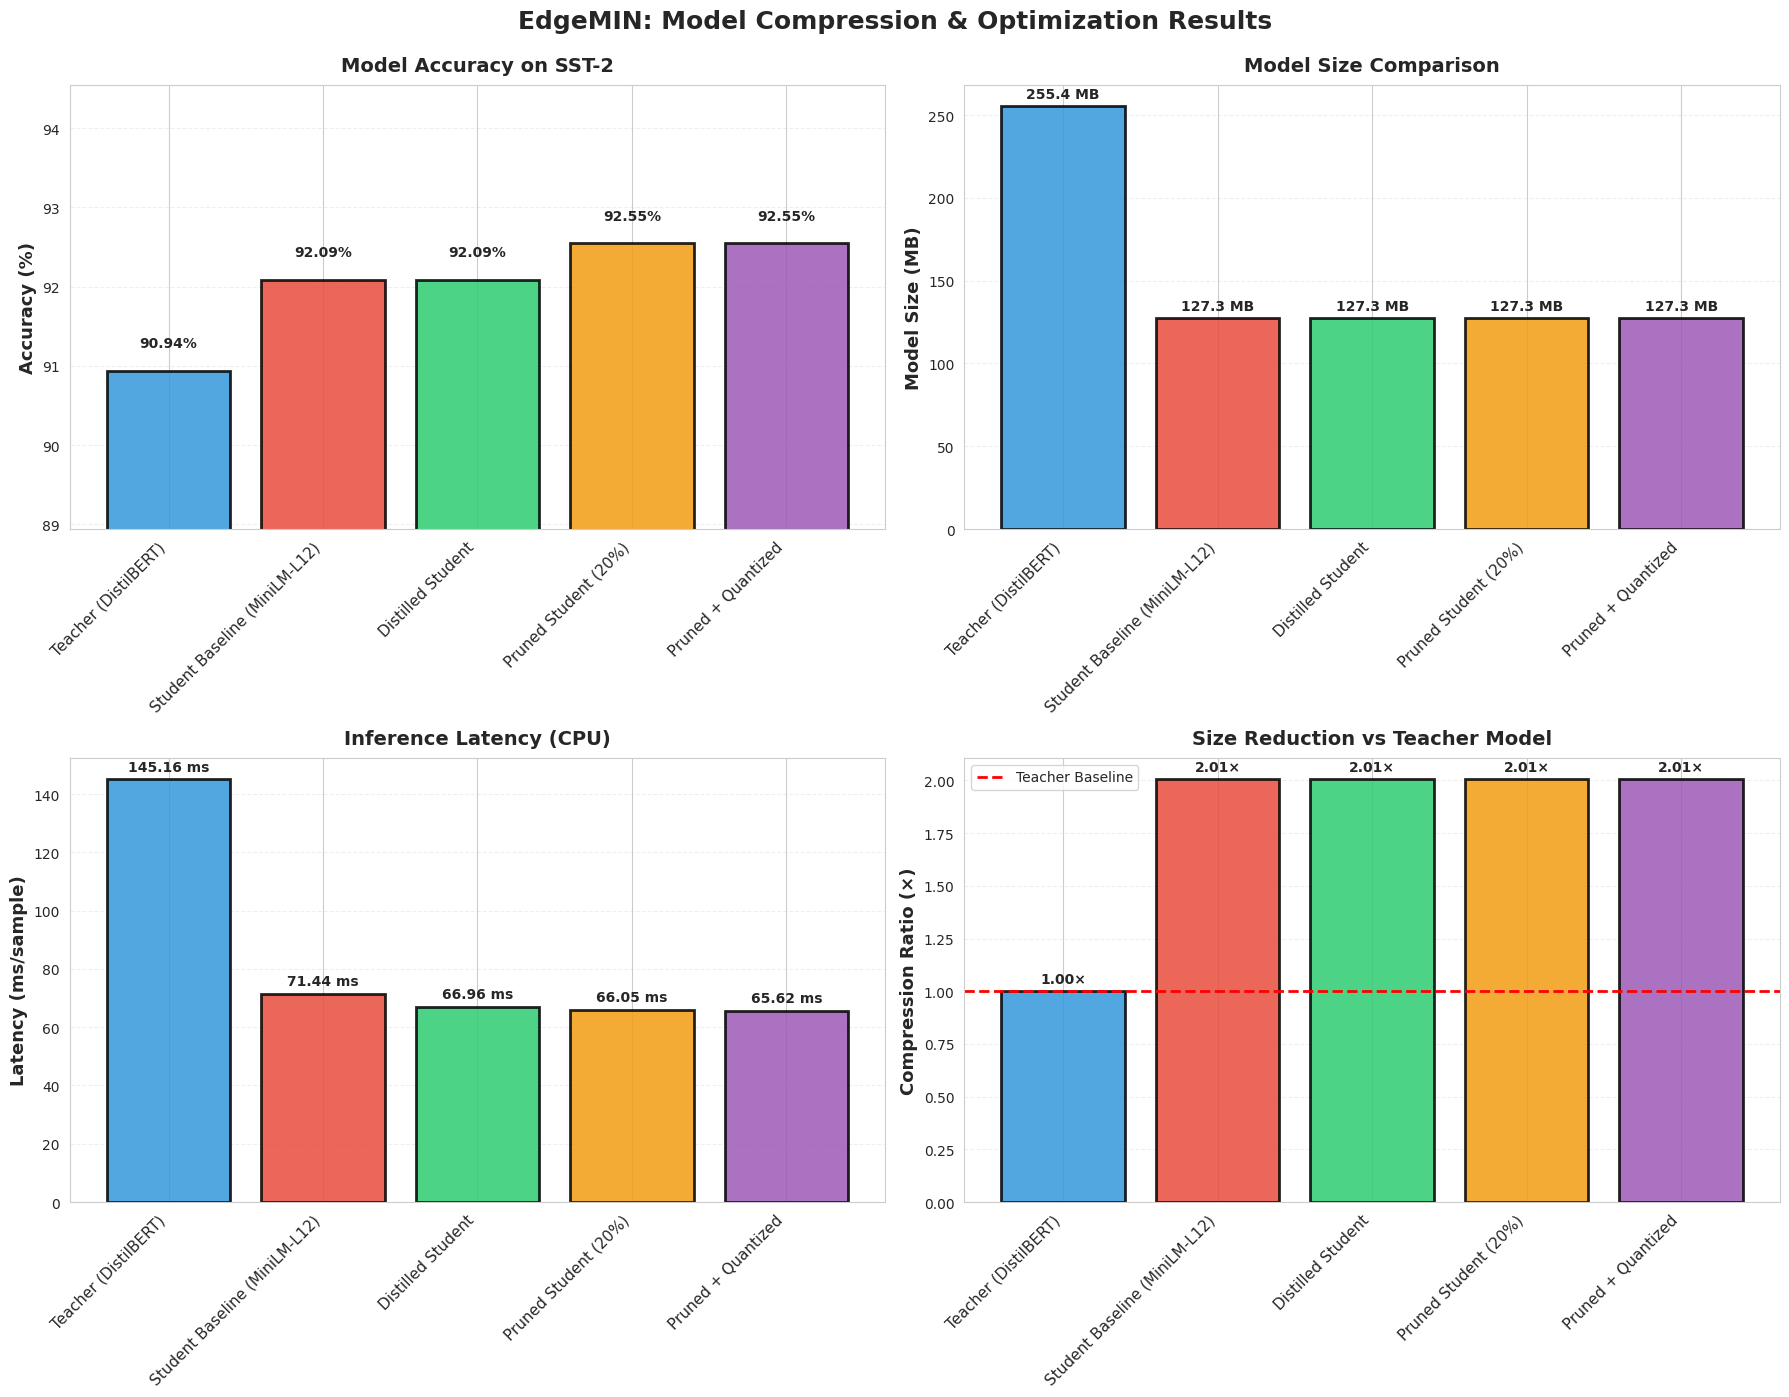

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/comprehensive_comparison.png


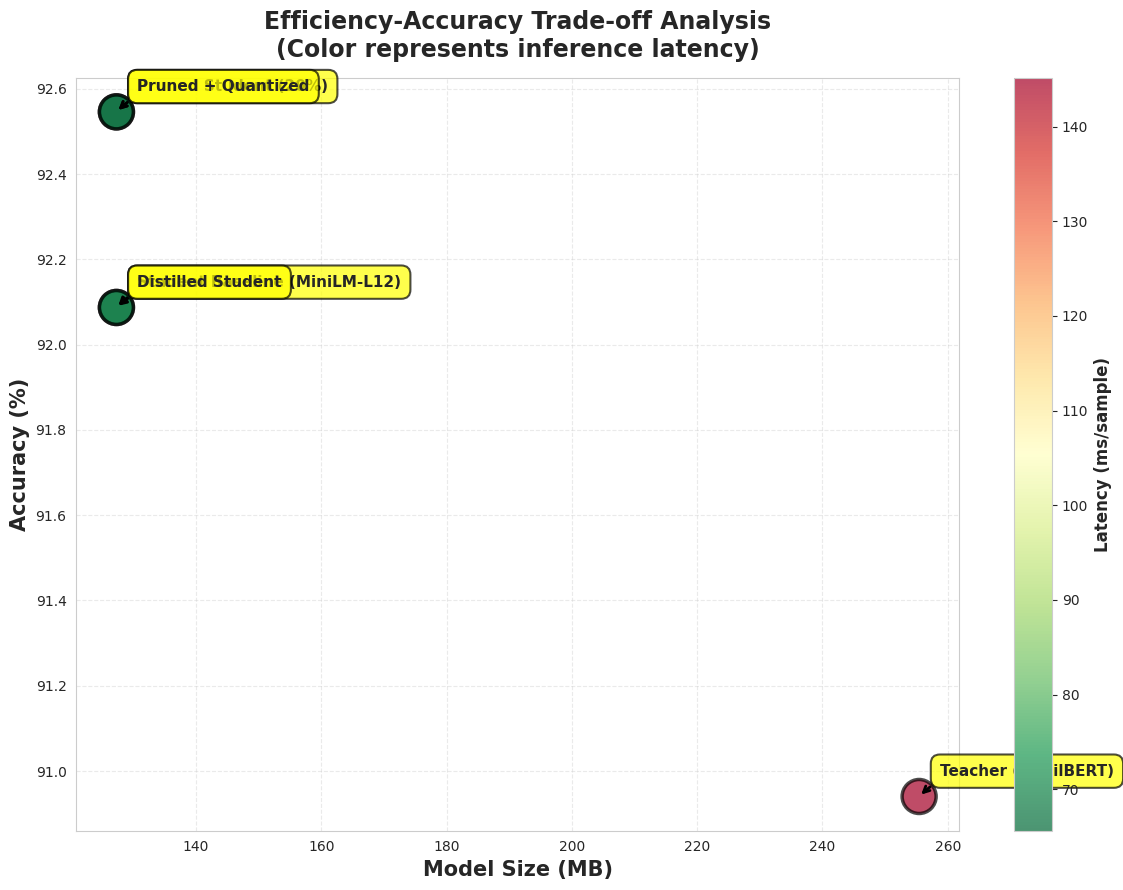

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/pareto_frontier.png


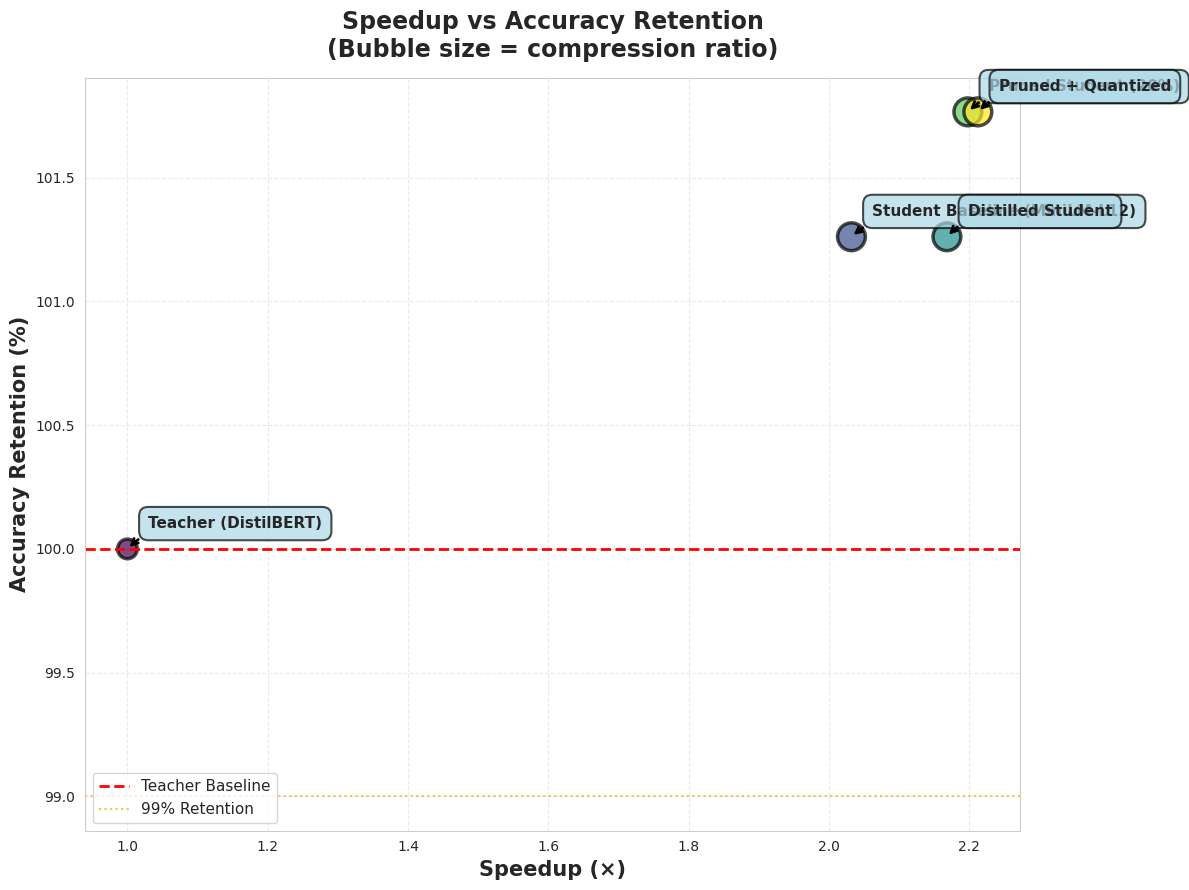

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/speedup_vs_accuracy.png


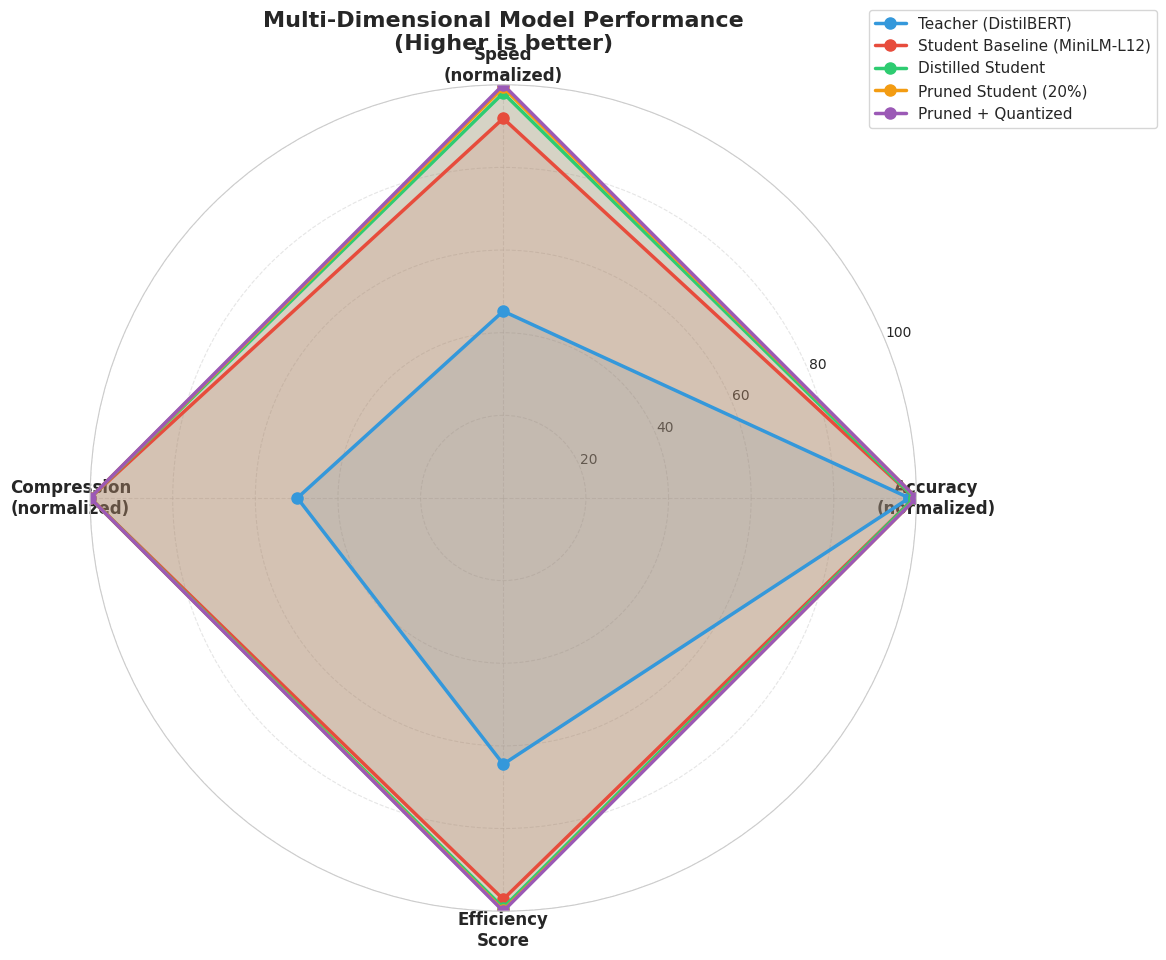

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/radar_comparison.png

💾 Results saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv
💾 Summary saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_summary.txt

✅ ALL VISUALIZATIONS GENERATED SUCCESSFULLY!

Generated files:
  📊 /content/drive/MyDrive/EdgeMIN_Project/figures/comprehensive_comparison.png
  📊 /content/drive/MyDrive/EdgeMIN_Project/figures/pareto_frontier.png
  📊 /content/drive/MyDrive/EdgeMIN_Project/figures/speedup_vs_accuracy.png
  📊 /content/drive/MyDrive/EdgeMIN_Project/figures/radar_comparison.png
  📄 /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv
  📄 /content/drive/MyDrive/EdgeMIN_Project/evaluation_summary.txt


In [ ]:
# ===== COMPREHENSIVE VISUALIZATION FOR MODEL EVALUATION =====

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Create figures directory
fig_dir = f"{project_dir}/figures"
os.makedirs(fig_dir, exist_ok=True)

# Convert all_results to DataFrame
df_results = pd.DataFrame(all_results)

# Rename column for consistency
df_results['latency_mean_ms'] = df_results['avg_inference_time_ms']

# Recalculate compression ratios if not present (relative to teacher model)
if 'compression_ratio' not in df_results.columns or df_results['compression_ratio'].isna().any():
    teacher_size = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['size_MB'].values[0]
    df_results['compression_ratio'] = teacher_size / df_results['size_MB']

# Calculate speedup (relative to teacher)
teacher_latency = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['avg_inference_time_ms'].values[0]
df_results['speedup'] = teacher_latency / df_results['avg_inference_time_ms']

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(df_results.to_string(index=False))
print("="*70)

# ===== MAIN COMPARISON PLOT (2x2 Grid) =====
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('EdgeMIN: Model Compression & Optimization Results',
             fontsize=18, fontweight='bold', y=0.995)

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# Plot 1: Accuracy Comparison
axes[0, 0].bar(range(len(df_results)), df_results['accuracy'] * 100,
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[0, 0].set_xticks(range(len(df_results)))
axes[0, 0].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Model Accuracy on SST-2', fontsize=14, fontweight='bold', pad=10)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].set_ylim([max(85, df_results['accuracy'].min() * 100 - 2),
                      min(95, df_results['accuracy'].max() * 100 + 2)])

for i, v in enumerate(df_results['accuracy'] * 100):
    axes[0, 0].text(i, v + 0.3, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold')

# Plot 2: Model Size
axes[0, 1].bar(range(len(df_results)), df_results['size_MB'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[0, 1].set_xticks(range(len(df_results)))
axes[0, 1].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[0, 1].set_ylabel('Model Size (MB)', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Model Size Comparison', fontsize=14, fontweight='bold', pad=10)
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(df_results['size_MB']):
    axes[0, 1].text(i, v + df_results['size_MB'].max()*0.02,
                    f'{v:.1f} MB', ha='center', fontsize=10, fontweight='bold')

# Plot 3: Inference Latency
axes[1, 0].bar(range(len(df_results)), df_results['avg_inference_time_ms'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[1, 0].set_xticks(range(len(df_results)))
axes[1, 0].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[1, 0].set_ylabel('Latency (ms/sample)', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Inference Latency (CPU)', fontsize=14, fontweight='bold', pad=10)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(df_results['avg_inference_time_ms']):
    axes[1, 0].text(i, v + df_results['avg_inference_time_ms'].max()*0.02,
                    f'{v:.2f} ms', ha='center', fontsize=10, fontweight='bold')

# Plot 4: Compression Ratio vs Teacher
axes[1, 1].bar(range(len(df_results)), df_results['compression_ratio'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[1, 1].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Teacher Baseline')
axes[1, 1].set_xticks(range(len(df_results)))
axes[1, 1].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[1, 1].set_ylabel('Compression Ratio (×)', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Size Reduction vs Teacher Model', fontsize=14, fontweight='bold', pad=10)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].legend(loc='upper left', fontsize=10)

for i, v in enumerate(df_results['compression_ratio']):
    axes[1, 1].text(i, v + df_results['compression_ratio'].max()*0.02,
                    f'{v:.2f}×', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{fig_dir}/comprehensive_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {fig_dir}/comprehensive_comparison.png")

# ===== PARETO FRONTIER: ACCURACY vs SIZE =====
plt.figure(figsize=(12, 9))

# Create scatter plot with latency as color
scatter = plt.scatter(df_results['size_MB'],
                     df_results['accuracy'] * 100,
                     s=600,
                     alpha=0.7,
                     c=df_results['avg_inference_time_ms'],
                     cmap='RdYlGn_r',
                     edgecolors='black',
                     linewidth=2.5)

# Add model name annotations
for idx, row in df_results.iterrows():
    plt.annotate(
        row['model_name'],
        (row['size_MB'], row['accuracy'] * 100),
        xytext=(15, 15),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='yellow',
                  alpha=0.7, edgecolor='black', linewidth=1.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                       lw=2, color='black')
    )

plt.xlabel('Model Size (MB)', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=15, fontweight='bold')
plt.title('Efficiency-Accuracy Trade-off Analysis\n(Color represents inference latency)',
          fontsize=17, fontweight='bold', pad=15)
cbar = plt.colorbar(scatter, label='Latency (ms/sample)')
cbar.set_label('Latency (ms/sample)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f"{fig_dir}/pareto_frontier.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {fig_dir}/pareto_frontier.png")

# ===== SPEEDUP vs ACCURACY RETENTION =====
plt.figure(figsize=(12, 9))

# Calculate accuracy retention percentage
teacher_acc = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['accuracy'].values[0]
df_results['accuracy_retention'] = (df_results['accuracy'] / teacher_acc) * 100

scatter2 = plt.scatter(df_results['speedup'],
                      df_results['accuracy_retention'],
                      s=df_results['compression_ratio']*200,
                      alpha=0.7,
                      c=range(len(df_results)),
                      cmap='viridis',
                      edgecolors='black',
                      linewidth=2.5)

for idx, row in df_results.iterrows():
    plt.annotate(
        row['model_name'],
        (row['speedup'], row['accuracy_retention']),
        xytext=(15, 15),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='lightblue',
                  alpha=0.7, edgecolor='black', linewidth=1.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                       lw=2, color='black')
    )

plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Teacher Baseline')
plt.axhline(y=99, color='orange', linestyle=':', linewidth=1.5, label='99% Retention', alpha=0.7)
plt.xlabel('Speedup (×)', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy Retention (%)', fontsize=15, fontweight='bold')
plt.title('Speedup vs Accuracy Retention\n(Bubble size = compression ratio)',
          fontsize=17, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='lower left')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f"{fig_dir}/speedup_vs_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {fig_dir}/speedup_vs_accuracy.png")

# ===== RADAR CHART: MULTI-DIMENSIONAL COMPARISON =====
from math import pi

categories = ['Accuracy\n(normalized)', 'Speed\n(normalized)',
              'Compression\n(normalized)', 'Efficiency\nScore']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Normalize metrics to 0-100 scale
df_results['norm_accuracy'] = (df_results['accuracy'] / df_results['accuracy'].max()) * 100
df_results['norm_speed'] = (df_results['speedup'] / df_results['speedup'].max()) * 100
df_results['norm_compression'] = (df_results['compression_ratio'] / df_results['compression_ratio'].max()) * 100
df_results['efficiency_score'] = (df_results['norm_accuracy'] + df_results['norm_speed'] +
                                   df_results['norm_compression']) / 3

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

for idx, row in df_results.iterrows():
    values = [row['norm_accuracy'], row['norm_speed'],
              row['norm_compression'], row['efficiency_score']]
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2.5, label=row['model_name'],
            color=colors[idx], markersize=8)
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('Multi-Dimensional Model Performance\n(Higher is better)',
             fontsize=16, fontweight='bold', pad=25)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.tight_layout()
plt.savefig(f"{fig_dir}/radar_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {fig_dir}/radar_comparison.png")

# ===== SAVE RESULTS TABLE =====
results_path = f"{project_dir}/evaluation_results.csv"
df_results.to_csv(results_path, index=False)
print(f"\n💾 Results saved to: {results_path}")

# Create summary table
summary_path = f"{project_dir}/evaluation_summary.txt"
with open(summary_path, 'w') as f:
    f.write("="*70 + "\n")
    f.write("EDGEMIN MODEL EVALUATION SUMMARY\n")
    f.write("="*70 + "\n\n")
    f.write(df_results.to_string(index=False))
    f.write("\n\n" + "="*70 + "\n")
    f.write("KEY FINDINGS:\n")
    f.write("="*70 + "\n")

    best_acc = df_results.loc[df_results['accuracy'].idxmax()]
    smallest = df_results.loc[df_results['size_MB'].idxmin()]
    fastest = df_results.loc[df_results['latency_mean_ms'].idxmin()]
    best_ratio = df_results.loc[df_results['efficiency_score'].idxmax()]

    f.write(f"🏆 Highest Accuracy: {best_acc['model_name']} ({best_acc['accuracy']*100:.2f}%)\n")
    f.write(f"📦 Smallest Model: {smallest['model_name']} ({smallest['size_MB']:.1f} MB)\n")
    f.write(f"⚡ Fastest Inference: {fastest['model_name']} ({fastest['latency_mean_ms']:.2f} ms)\n")
    f.write(f"🎯 Best Overall Efficiency: {best_ratio['model_name']} (Score: {best_ratio['efficiency_score']:.1f})\n")

print(f"💾 Summary saved to: {summary_path}")

print("\n" + "="*70)
print("✅ ALL VISUALIZATIONS GENERATED SUCCESSFULLY!")
print("="*70)
print(f"\nGenerated files:")
print(f"  📊 {fig_dir}/comprehensive_comparison.png")
print(f"  📊 {fig_dir}/pareto_frontier.png")
print(f"  📊 {fig_dir}/speedup_vs_accuracy.png")
print(f"  📊 {fig_dir}/radar_comparison.png")
print(f"  📄 {results_path}")
print(f"  📄 {summary_path}")
print("="*70)

Latex font

In [ ]:
# ===== RE-RUN EVALUATION WITH FINE-TUNED MODELS =====
import os
import sys
import time
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
sys.path.append(project_dir)



MODEL COMPARISON SUMMARY
                   model_name  params_M  accuracy  avg_inference_time_ms  avg_inference_time_batch_s    size_MB  total_samples  latency_mean_ms  compression_ratio  speedup
         Teacher (DistilBERT)  66.95501  0.909404             217.431832                    6.957819 255.425034            872       217.431832           1.000000 1.000000
Student Baseline (MiniLM-L12)  33.36077  0.920872             103.941682                    3.326134 127.283455            872       103.941682           2.006742 2.091864
            Distilled Student  33.36077  0.920872             101.531638                    3.249012 127.283455            872       101.531638           2.006742 2.141518
         Pruned Student (20%)  33.36077  0.925459             105.660584                    3.381139 127.283455            872       105.660584           2.006742 2.057833
           Pruned + Quantized  33.36077  0.925459             102.497011                    3.279904 127.283455   

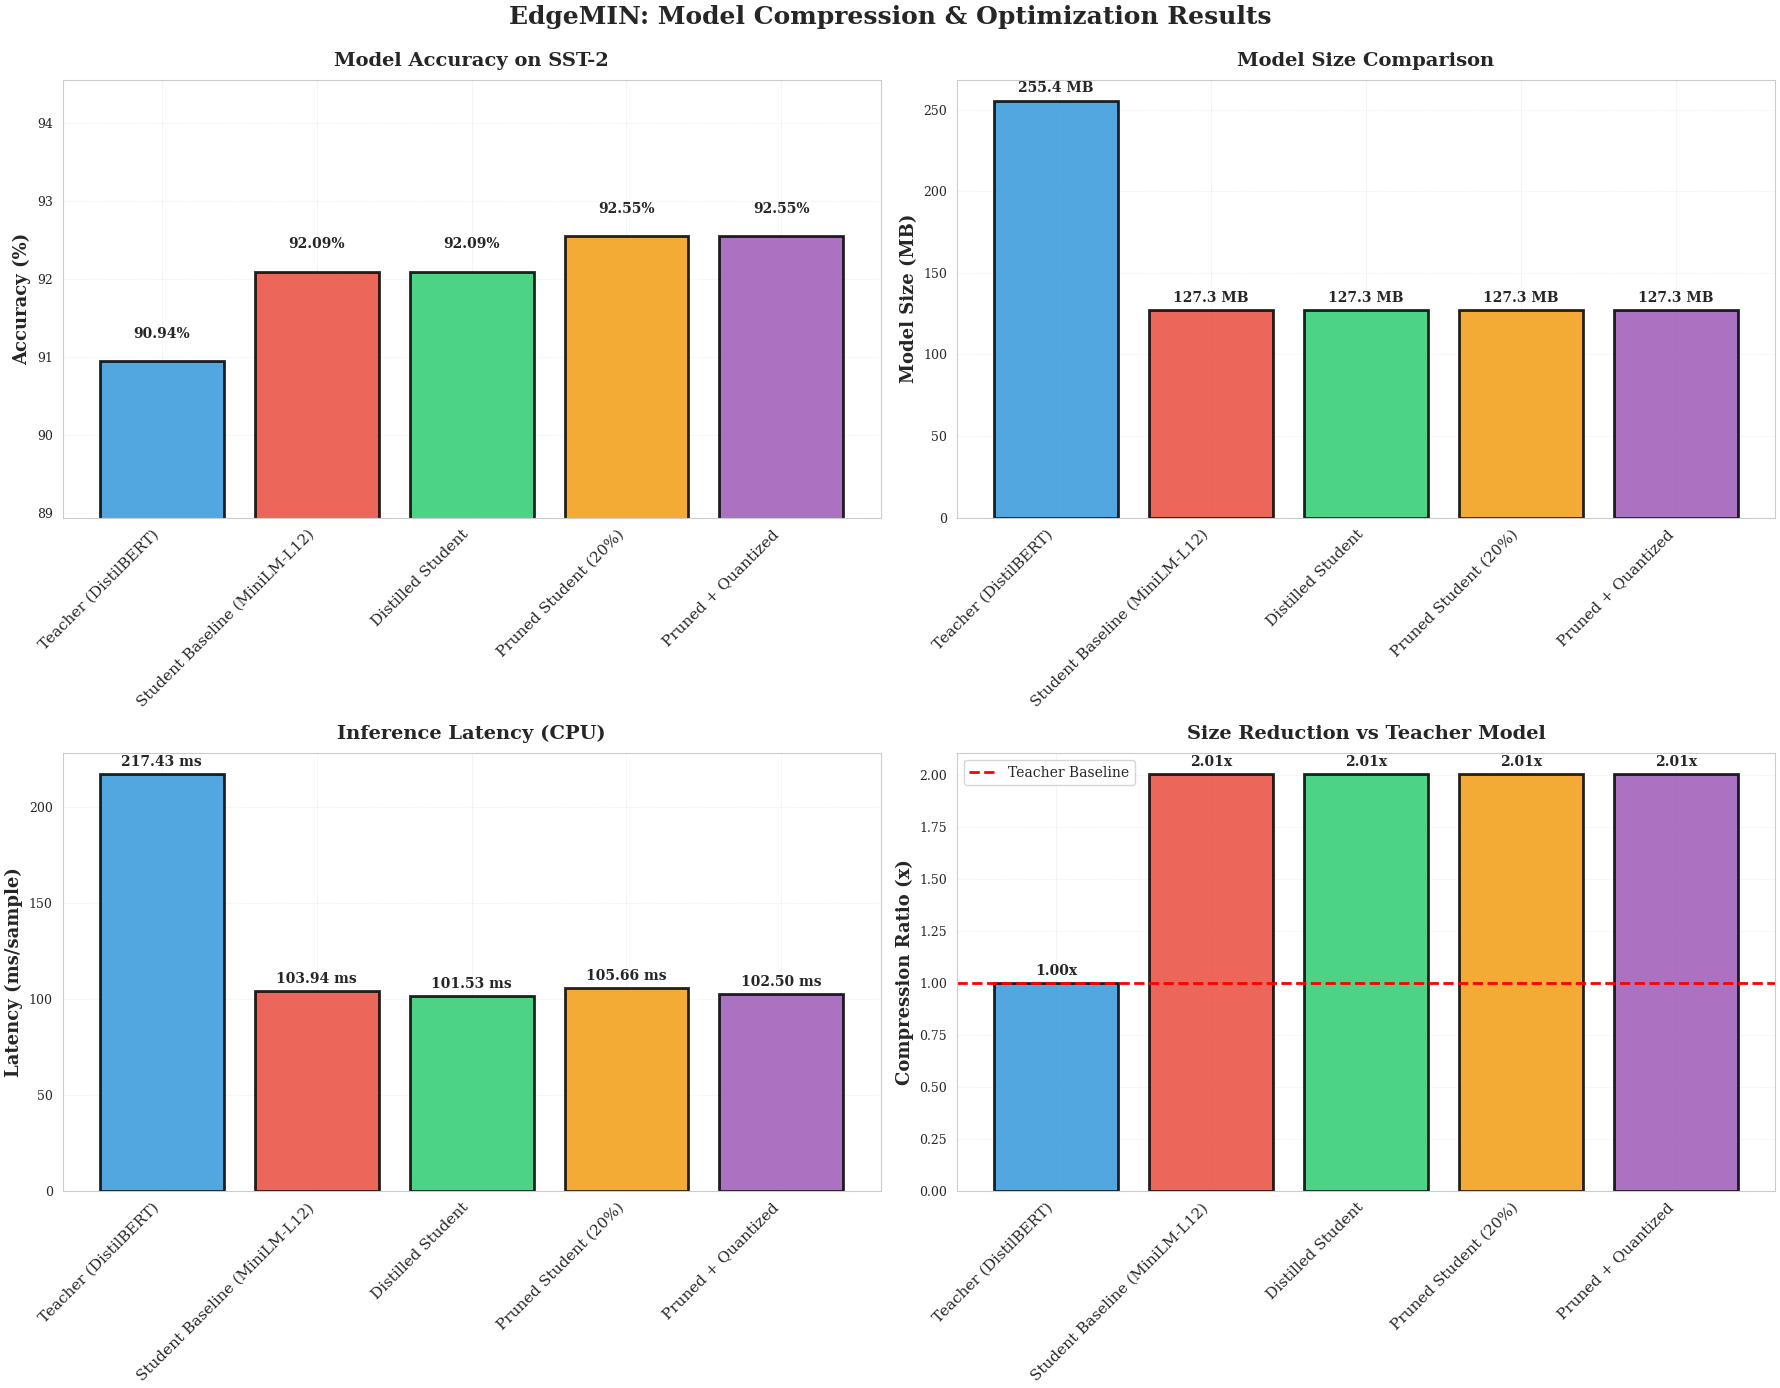

Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/comprehensive_comparison.png


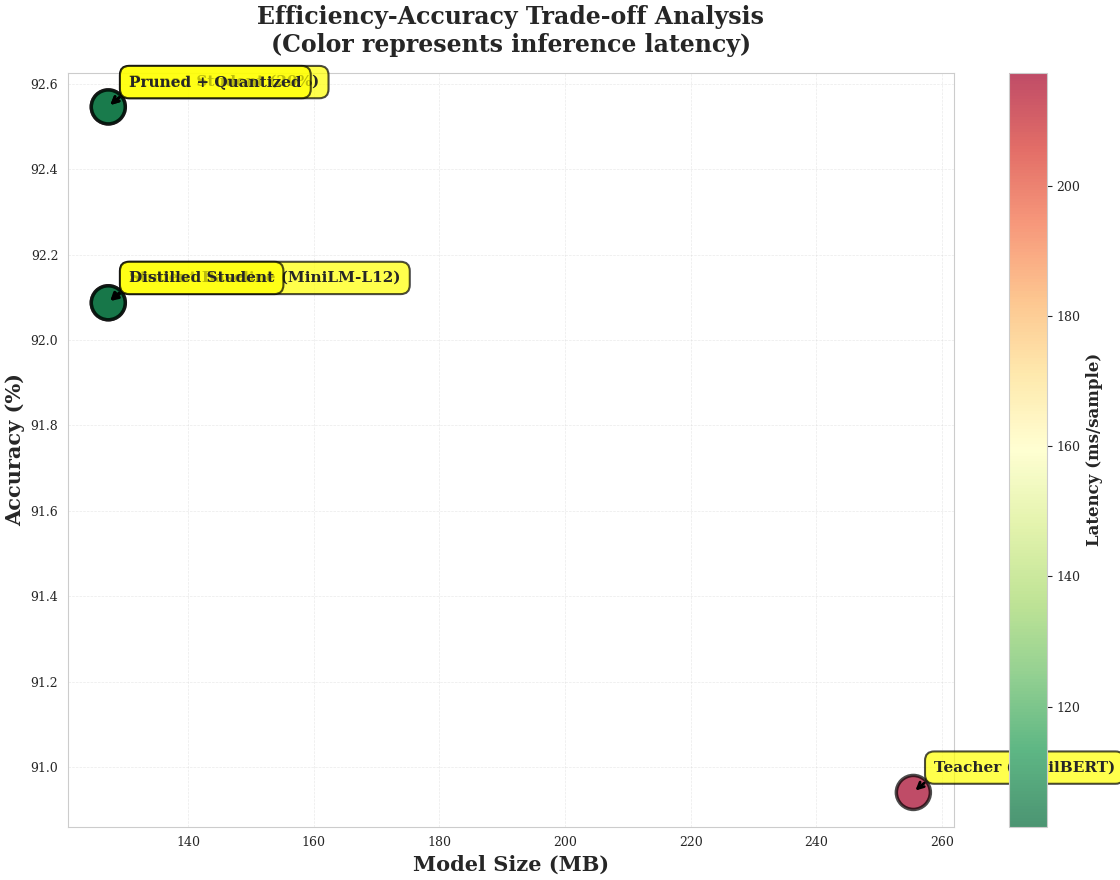

Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/pareto_frontier.png


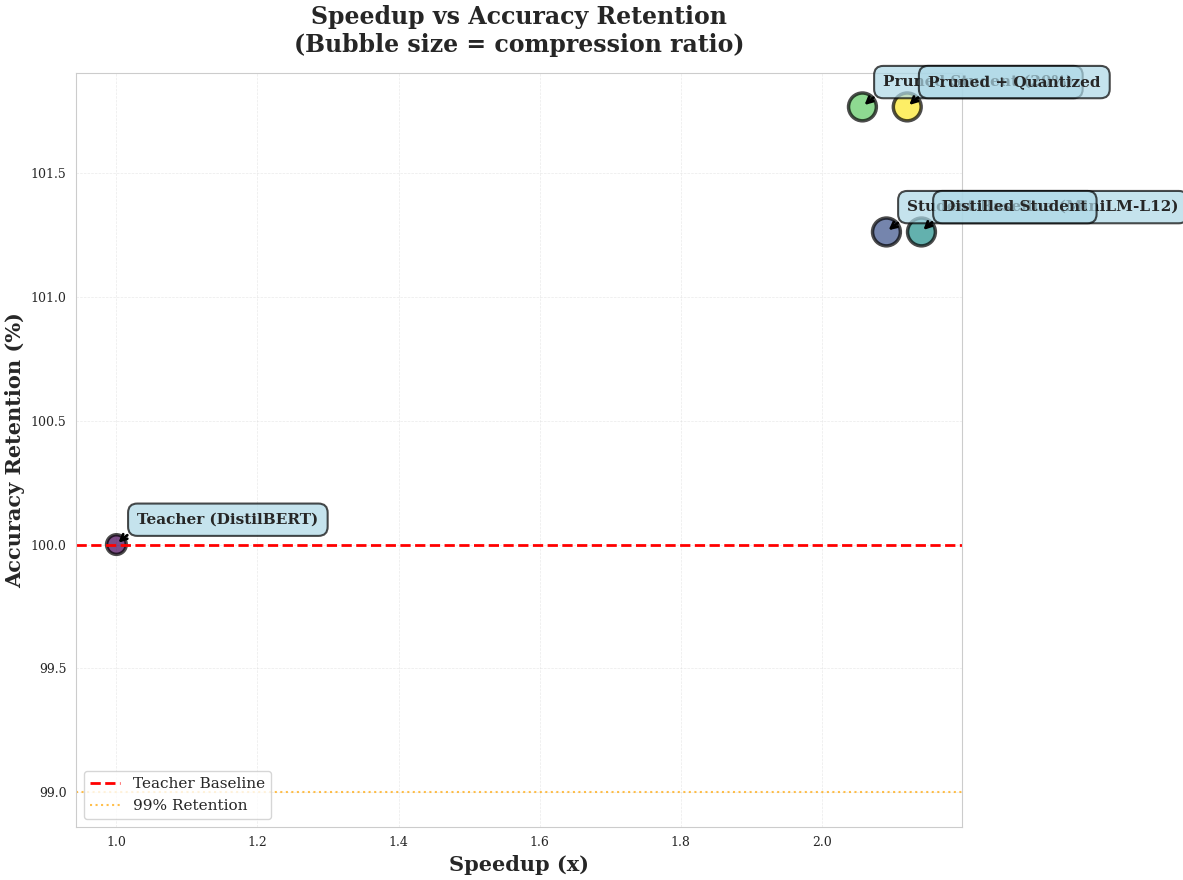

Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/speedup_vs_accuracy.png


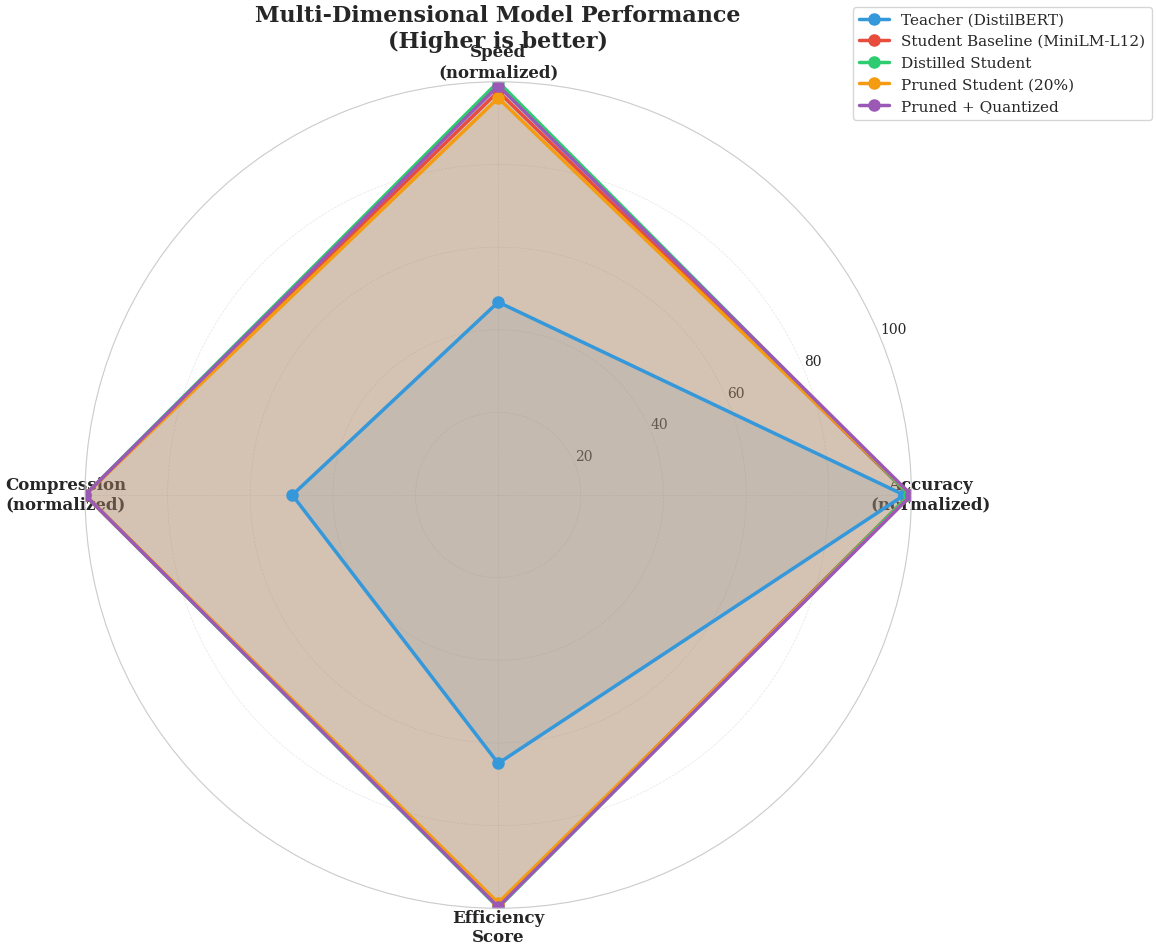

Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/radar_comparison.png

Results saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv
Summary saved to: /content/drive/MyDrive/EdgeMIN_Project/evaluation_summary.txt

ALL VISUALIZATIONS GENERATED SUCCESSFULLY

Generated files:
  /content/drive/MyDrive/EdgeMIN_Project/figures/comprehensive_comparison.png
  /content/drive/MyDrive/EdgeMIN_Project/figures/pareto_frontier.png
  /content/drive/MyDrive/EdgeMIN_Project/figures/speedup_vs_accuracy.png
  /content/drive/MyDrive/EdgeMIN_Project/figures/radar_comparison.png
  /content/drive/MyDrive/EdgeMIN_Project/evaluation_results.csv
  /content/drive/MyDrive/EdgeMIN_Project/evaluation_summary.txt


In [ ]:
# ===== COMPREHENSIVE VISUALIZATION FOR MODEL EVALUATION =====

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from math import pi

# IMPORTANT: Disable LaTeX to avoid errors
plt.rcParams['text.usetex'] = False

# Set style with publication-quality fonts (no LaTeX required)
sns.set_style("whitegrid")

# Configure matplotlib for publication-quality figures
plt.rcParams.update({
    # Font settings - professional serif fonts
    "font.family": "serif",
    "font.serif": ["DejaVu Serif", "Times New Roman", "Georgia", "serif"],
    "mathtext.fontset": "dejavuserif",

    # Figure settings
    "figure.facecolor": "white",
    "axes.facecolor": "white",

    # Font sizes (conference paper standard)
    "font.size": 10,
    "axes.labelsize": 11,
    "axes.titlesize": 12,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "figure.titlesize": 14,

    # Line widths
    "axes.linewidth": 0.8,
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.5,

    # Grid and saving settings
    "axes.grid": True,
    "grid.alpha": 0.3,
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.05,
})

# Create figures directory
fig_dir = f"{project_dir}/figures"
os.makedirs(fig_dir, exist_ok=True)

# Convert all_results to DataFrame
df_results = pd.DataFrame(all_results)

# Rename column for consistency
df_results['latency_mean_ms'] = df_results['avg_inference_time_ms']

# Recalculate compression ratios if not present
if 'compression_ratio' not in df_results.columns or df_results['compression_ratio'].isna().any():
    teacher_size = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['size_MB'].values[0]
    df_results['compression_ratio'] = teacher_size / df_results['size_MB']

# Calculate speedup
teacher_latency = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['avg_inference_time_ms'].values[0]
df_results['speedup'] = teacher_latency / df_results['avg_inference_time_ms']

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(df_results.to_string(index=False))
print("="*70)

# Define colors
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# ===== FIGURE 1: MAIN COMPARISON (2x2 Grid) =====
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('EdgeMIN: Model Compression & Optimization Results',
             fontsize=18, fontweight='bold', y=0.995)

# Plot 1: Accuracy
axes[0, 0].bar(range(len(df_results)), df_results['accuracy'] * 100,
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[0, 0].set_xticks(range(len(df_results)))
axes[0, 0].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Model Accuracy on SST-2', fontsize=14, fontweight='bold', pad=10)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].set_ylim([max(85, df_results['accuracy'].min() * 100 - 2),
                      min(95, df_results['accuracy'].max() * 100 + 2)])

for i, v in enumerate(df_results['accuracy'] * 100):
    axes[0, 0].text(i, v + 0.3, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold')

# Plot 2: Model Size
axes[0, 1].bar(range(len(df_results)), df_results['size_MB'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[0, 1].set_xticks(range(len(df_results)))
axes[0, 1].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[0, 1].set_ylabel('Model Size (MB)', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Model Size Comparison', fontsize=14, fontweight='bold', pad=10)
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(df_results['size_MB']):
    axes[0, 1].text(i, v + df_results['size_MB'].max()*0.02,
                    f'{v:.1f} MB', ha='center', fontsize=10, fontweight='bold')

# Plot 3: Inference Latency
axes[1, 0].bar(range(len(df_results)), df_results['avg_inference_time_ms'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[1, 0].set_xticks(range(len(df_results)))
axes[1, 0].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[1, 0].set_ylabel('Latency (ms/sample)', fontsize=13, fontweight='bold')
axes[1, 0].set_title('Inference Latency (CPU)', fontsize=14, fontweight='bold', pad=10)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(df_results['avg_inference_time_ms']):
    axes[1, 0].text(i, v + df_results['avg_inference_time_ms'].max()*0.02,
                    f'{v:.2f} ms', ha='center', fontsize=10, fontweight='bold')

# Plot 4: Compression Ratio
axes[1, 1].bar(range(len(df_results)), df_results['compression_ratio'],
               color=colors[:len(df_results)], alpha=0.85, edgecolor='black', linewidth=2)
axes[1, 1].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Teacher Baseline')
axes[1, 1].set_xticks(range(len(df_results)))
axes[1, 1].set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=11)
axes[1, 1].set_ylabel('Compression Ratio (x)', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Size Reduction vs Teacher Model', fontsize=14, fontweight='bold', pad=10)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].legend(loc='upper left', fontsize=10)

for i, v in enumerate(df_results['compression_ratio']):
    axes[1, 1].text(i, v + df_results['compression_ratio'].max()*0.02,
                    f'{v:.2f}x', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{fig_dir}/comprehensive_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {fig_dir}/comprehensive_comparison.png")

# ===== FIGURE 2: PARETO FRONTIER =====
plt.figure(figsize=(12, 9))

scatter = plt.scatter(df_results['size_MB'],
                     df_results['accuracy'] * 100,
                     s=600,
                     alpha=0.7,
                     c=df_results['avg_inference_time_ms'],
                     cmap='RdYlGn_r',
                     edgecolors='black',
                     linewidth=2.5)

for idx, row in df_results.iterrows():
    plt.annotate(
        row['model_name'],
        (row['size_MB'], row['accuracy'] * 100),
        xytext=(15, 15),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='yellow',
                  alpha=0.7, edgecolor='black', linewidth=1.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                       lw=2, color='black')
    )

plt.xlabel('Model Size (MB)', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=15, fontweight='bold')
plt.title('Efficiency-Accuracy Trade-off Analysis\n(Color represents inference latency)',
          fontsize=17, fontweight='bold', pad=15)
cbar = plt.colorbar(scatter, label='Latency (ms/sample)')
cbar.set_label('Latency (ms/sample)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f"{fig_dir}/pareto_frontier.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {fig_dir}/pareto_frontier.png")

# ===== FIGURE 3: SPEEDUP vs ACCURACY RETENTION =====
plt.figure(figsize=(12, 9))

teacher_acc = df_results[df_results['model_name'].str.contains('Teacher', case=False)]['accuracy'].values[0]
df_results['accuracy_retention'] = (df_results['accuracy'] / teacher_acc) * 100

scatter2 = plt.scatter(df_results['speedup'],
                      df_results['accuracy_retention'],
                      s=df_results['compression_ratio']*200,
                      alpha=0.7,
                      c=range(len(df_results)),
                      cmap='viridis',
                      edgecolors='black',
                      linewidth=2.5)

for idx, row in df_results.iterrows():
    plt.annotate(
        row['model_name'],
        (row['speedup'], row['accuracy_retention']),
        xytext=(15, 15),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='lightblue',
                  alpha=0.7, edgecolor='black', linewidth=1.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                       lw=2, color='black')
    )

plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Teacher Baseline')
plt.axhline(y=99, color='orange', linestyle=':', linewidth=1.5, label='99% Retention', alpha=0.7)
plt.xlabel('Speedup (x)', fontsize=15, fontweight='bold')
plt.ylabel('Accuracy Retention (%)', fontsize=15, fontweight='bold')
plt.title('Speedup vs Accuracy Retention\n(Bubble size = compression ratio)',
          fontsize=17, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='lower left')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.savefig(f"{fig_dir}/speedup_vs_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {fig_dir}/speedup_vs_accuracy.png")

# ===== FIGURE 4: RADAR CHART =====
categories = ['Accuracy\n(normalized)', 'Speed\n(normalized)',
              'Compression\n(normalized)', 'Efficiency\nScore']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

df_results['norm_accuracy'] = (df_results['accuracy'] / df_results['accuracy'].max()) * 100
df_results['norm_speed'] = (df_results['speedup'] / df_results['speedup'].max()) * 100
df_results['norm_compression'] = (df_results['compression_ratio'] / df_results['compression_ratio'].max()) * 100
df_results['efficiency_score'] = (df_results['norm_accuracy'] + df_results['norm_speed'] +
                                   df_results['norm_compression']) / 3

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

for idx, row in df_results.iterrows():
    values = [row['norm_accuracy'], row['norm_speed'],
              row['norm_compression'], row['efficiency_score']]
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2.5, label=row['model_name'],
            color=colors[idx], markersize=8)
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('Multi-Dimensional Model Performance\n(Higher is better)',
             fontsize=16, fontweight='bold', pad=25)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

plt.tight_layout()
plt.savefig(f"{fig_dir}/radar_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {fig_dir}/radar_comparison.png")

# ===== SAVE RESULTS =====
results_path = f"{project_dir}/evaluation_results.csv"
df_results.to_csv(results_path, index=False)
print(f"\nResults saved to: {results_path}")

summary_path = f"{project_dir}/evaluation_summary.txt"
with open(summary_path, 'w') as f:
    f.write("="*70 + "\n")
    f.write("EDGEMIN MODEL EVALUATION SUMMARY\n")
    f.write("="*70 + "\n\n")
    f.write(df_results.to_string(index=False))
    f.write("\n\n" + "="*70 + "\n")
    f.write("KEY FINDINGS:\n")
    f.write("="*70 + "\n")

    best_acc = df_results.loc[df_results['accuracy'].idxmax()]
    smallest = df_results.loc[df_results['size_MB'].idxmin()]
    fastest = df_results.loc[df_results['latency_mean_ms'].idxmin()]
    best_ratio = df_results.loc[df_results['efficiency_score'].idxmax()]

    f.write(f"Highest Accuracy: {best_acc['model_name']} ({best_acc['accuracy']*100:.2f}%)\n")
    f.write(f"Smallest Model: {smallest['model_name']} ({smallest['size_MB']:.1f} MB)\n")
    f.write(f"Fastest Inference: {fastest['model_name']} ({fastest['latency_mean_ms']:.2f} ms)\n")
    f.write(f"Best Overall Efficiency: {best_ratio['model_name']} (Score: {best_ratio['efficiency_score']:.1f})\n")

print(f"Summary saved to: {summary_path}")

print("\n" + "="*70)
print("ALL VISUALIZATIONS GENERATED SUCCESSFULLY")
print("="*70)
print(f"\nGenerated files:")
print(f"  {fig_dir}/comprehensive_comparison.png")
print(f"  {fig_dir}/pareto_frontier.png")
print(f"  {fig_dir}/speedup_vs_accuracy.png")
print(f"  {fig_dir}/radar_comparison.png")
print(f"  {results_path}")
print(f"  {summary_path}")
print("="*70)

# Testing with benchmarks

Model size

In [ ]:
# ===== Enhanced Model Size Measurement =====

def get_detailed_model_size(model_path, model):
    """
    Get detailed size breakdown
    """
    import os

    # Method 1: Actual file size on disk
    model_file = None
    for filename in ["model.safetensors", "pytorch_model.bin"]:
        filepath = os.path.join(model_path, filename)
        if os.path.exists(filepath):
            model_file = filepath
            break

    file_size_mb = 0
    if model_file:
        file_size_mb = os.path.getsize(model_file) / (1024**2)

    # Method 2: Parameter count (theoretical size)
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    # Calculate sizes for different precisions
    fp32_size_mb = total_params * 4 / (1024**2)  # 4 bytes per param
    fp16_size_mb = total_params * 2 / (1024**2)  # 2 bytes per param
    int8_size_mb = total_params * 1 / (1024**2)  # 1 byte per param

    return {
        "file_size_MB": file_size_mb,
        "total_params": total_params,
        "total_params_M": total_params / 1e6,
        "trainable_params": trainable_params,
        "fp32_theoretical_MB": fp32_size_mb,
        "fp16_theoretical_MB": fp16_size_mb,
        "int8_theoretical_MB": int8_size_mb
    }

# Usage example
model_path = f"{project_dir}/models/teacher_finetuned"
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)

size_info = get_detailed_model_size(model_path, model)
print(size_info)

{'file_size_MB': 255.42503356933594, 'total_params': 66955010, 'total_params_M': 66.95501, 'trainable_params': 66955010, 'fp32_theoretical_MB': 255.41309356689453, 'fp16_theoretical_MB': 127.70654678344727, 'int8_theoretical_MB': 63.85327339172363}


Inference latency

In [ ]:
# ===== Enhanced Latency Measurement =====

def measure_latency_detailed(model, tokenizer, sample_texts, device="cpu", num_warmup=10, num_runs=100):
    """
    Measure cold start and warm inference latency
    """
    import time
    import torch

    model.eval()
    model.to(device)

    # Cold start (first inference, includes loading overhead)
    print("Measuring cold start latency...")
    cold_start_times = []

    for i in range(5):  # 5 cold starts
        # Clear cache to simulate cold start
        if device == "cuda":
            torch.cuda.empty_cache()

        text = sample_texts[i % len(sample_texts)]
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)

        start = time.time()
        with torch.no_grad():
            _ = model(**inputs)
        cold_time = (time.time() - start) * 1000  # ms
        cold_start_times.append(cold_time)

    # Warm-up runs
    print("Warming up...")
    for _ in range(num_warmup):
        inputs = tokenizer(sample_texts[0], return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            _ = model(**inputs)

    # Warm inference (steady state)
    print("Measuring warm inference latency...")
    warm_times = []

    for text in sample_texts[:num_runs]:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)

        start = time.time()
        with torch.no_grad():
            _ = model(**inputs)
        warm_time = (time.time() - start) * 1000  # ms
        warm_times.append(warm_time)

    return {
        "cold_start_mean_ms": np.mean(cold_start_times),
        "cold_start_std_ms": np.std(cold_start_times),
        "warm_mean_ms": np.mean(warm_times),
        "warm_std_ms": np.std(warm_times),
        "warm_median_ms": np.median(warm_times),
        "warm_p95_ms": np.percentile(warm_times, 95),
        "warm_p99_ms": np.percentile(warm_times, 99)
    }

# Usage
dataset = load_dataset("glue", "sst2", split="validation")
texts = [ex["sentence"] for ex in dataset.select(range(100))]

latency_info = measure_latency_detailed(model, tokenizer, texts, device="cpu")
print(latency_info)

Measuring cold start latency...
Warming up...
Measuring warm inference latency...
{'cold_start_mean_ms': np.float64(92.48666763305664), 'cold_start_std_ms': np.float64(62.39115912321953), 'warm_mean_ms': np.float64(66.04520320892334), 'warm_std_ms': np.float64(10.43888308139604), 'warm_median_ms': np.float64(64.69976902008057), 'warm_p95_ms': np.float64(81.70708417892456), 'warm_p99_ms': np.float64(99.29273605346681)}


Throughput (Samples/Second)

In [ ]:
# ===== Throughput Measurement =====

def measure_throughput(model, tokenizer, sample_texts, device="cpu", batch_sizes=[1, 4, 8, 16, 32]):
    """
    Measure throughput at different batch sizes
    """
    import time
    import torch

    model.eval()
    model.to(device)

    results = []

    for batch_size in batch_sizes:
        print(f"\nTesting batch size: {batch_size}")

        # Prepare batches
        num_batches = min(20, len(sample_texts) // batch_size)
        total_samples = 0
        total_time = 0

        for i in range(num_batches):
            batch_texts = sample_texts[i*batch_size:(i+1)*batch_size]

            inputs = tokenizer(
                batch_texts,
                return_tensors="pt",
                truncation=True,
                max_length=128,
                padding=True
            ).to(device)

            start = time.time()
            with torch.no_grad():
                _ = model(**inputs)

            batch_time = time.time() - start
            total_time += batch_time
            total_samples += len(batch_texts)

        throughput = total_samples / total_time
        latency_per_sample = (total_time / total_samples) * 1000  # ms

        results.append({
            "batch_size": batch_size,
            "throughput_samples_per_sec": throughput,
            "latency_per_sample_ms": latency_per_sample,
            "total_samples": total_samples
        })

        print(f"  Throughput: {throughput:.2f} samples/sec")
        print(f"  Latency: {latency_per_sample:.2f} ms/sample")

    return results

# Usage
throughput_results = measure_throughput(model, tokenizer, texts, device="cpu")

# Convert to dataframe
df_throughput = pd.DataFrame(throughput_results)
print("\nThroughput Analysis:")
print(df_throughput)


Testing batch size: 1
  Throughput: 14.69 samples/sec
  Latency: 68.06 ms/sample

Testing batch size: 4
  Throughput: 26.27 samples/sec
  Latency: 38.06 ms/sample

Testing batch size: 8
  Throughput: 30.35 samples/sec
  Latency: 32.94 ms/sample

Testing batch size: 16
  Throughput: 31.14 samples/sec
  Latency: 32.12 ms/sample

Testing batch size: 32
  Throughput: 24.87 samples/sec
  Latency: 40.21 ms/sample

Throughput Analysis:
   batch_size  throughput_samples_per_sec  latency_per_sample_ms  \
0           1                   14.693797              68.055928   
1           4                   26.272470              38.062656   
2           8                   30.355000              32.943502   
3          16                   31.135923              32.117243   
4          32                   24.869315              40.210195   

   total_samples  
0             20  
1             80  
2             96  
3             96  
4             96  


**Peak** RAM (Memory Usage)

In [ ]:
# ===== Memory Measurement =====

def measure_memory_usage(model, tokenizer, sample_texts, device="cpu"):
    """
    Measure peak memory usage during inference
    """
    import torch
    import psutil
    import os

    model.eval()
    model.to(device)

    if device == "cuda" and torch.cuda.is_available():
        # GPU Memory
        torch.cuda.empty_cache()
        torch.cuda.reset_peak_memory_stats()

        # Run inference
        inputs = tokenizer(sample_texts[0], return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            _ = model(**inputs)

        peak_gpu_mb = torch.cuda.max_memory_allocated() / (1024**2)
        current_gpu_mb = torch.cuda.memory_allocated() / (1024**2)

        return {
            "device": "GPU",
            "peak_memory_MB": peak_gpu_mb,
            "current_memory_MB": current_gpu_mb
        }
    else:
        # CPU Memory
        import tracemalloc

        tracemalloc.start()

        # Get baseline
        baseline = tracemalloc.get_traced_memory()[0] / (1024**2)

        # Run inference
        inputs = tokenizer(sample_texts[0], return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            _ = model(**inputs)

        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        peak_mb = peak / (1024**2)
        current_mb = current / (1024**2)

        # Also get system-level memory
        process = psutil.Process(os.getpid())
        system_memory_mb = process.memory_info().rss / (1024**2)

        return {
            "device": "CPU",
            "peak_memory_MB": peak_mb,
            "current_memory_MB": current_mb,
            "system_memory_MB": system_memory_mb
        }

# Usage
memory_info = measure_memory_usage(model, tokenizer, texts, device="cpu")
print(memory_info)

{'device': 'CPU', 'peak_memory_MB': 0.0114898681640625, 'current_memory_MB': 0.0048980712890625, 'system_memory_MB': 2657.09375}


FLOPs (Computational Cost)

In [ ]:
# ===== FLOPs Measurement =====

def measure_flops(model, tokenizer, sample_text, device="cpu"):
    """
    Measure FLOPs using profiler
    """
    import torch
    from torch.profiler import profile, ProfilerActivity

    model.eval()
    model.to(device)

    inputs = tokenizer(sample_text, return_tensors="pt", truncation=True, max_length=128).to(device)

    # Profile FLOPs
    with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
        with torch.no_grad():
            _ = model(**inputs)

    # Get FLOPs from profiler
    total_flops = sum([item.flops for item in prof.key_averages() if item.flops is not None])

    return {
        "total_flops": total_flops,
        "flops_billions": total_flops / 1e9,
        "flops_millions": total_flops / 1e6
    }

# Alternative: Use thop library for more detailed FLOPs
def measure_flops_thop(model, tokenizer, sample_text, device="cpu"):
    """
    Measure FLOPs using thop library (more accurate)
    """
    try:
        from thop import profile as thop_profile

        model.eval()
        model.to(device)

        inputs = tokenizer(sample_text, return_tensors="pt", truncation=True, max_length=128).to(device)

        # Count FLOPs
        flops, params = thop_profile(model, inputs=(inputs['input_ids'], inputs['attention_mask']))

        return {
            "total_flops": flops,
            "flops_billions": flops / 1e9,
            "flops_millions": flops / 1e6,
            "params": params
        }
    except ImportError:
        print("⚠️ thop library not installed. Install with: pip install thop")
        return None

# Install thop first
!pip install thop -q

# Usage
flops_info = measure_flops(model, tokenizer, texts[0], device="cpu")
print(flops_info)

# Or use thop (more accurate)
flops_thop = measure_flops_thop(model, tokenizer, texts[0], device="cpu")
print(flops_thop)

{'total_flops': 0, 'flops_billions': 0.0, 'flops_millions': 0.0}
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
{'total_flops': 510678528.0, 'flops_billions': 0.510678528, 'flops_millions': 510.678528, 'params': 43120898.0}


# Teritary Metrics

Energy Consumption :- Using codecarbon

In [ ]:
# ===== Energy Consumption Measurement =====

# Install codecarbon
!pip install codecarbon -q

from codecarbon import EmissionsTracker

def measure_energy_consumption(model, tokenizer, sample_texts, device="cpu", num_runs=100):
    """
    Measure energy consumption during inference
    """
    import torch

    model.eval()
    model.to(device)

    # Start tracking emissions
    tracker = EmissionsTracker(project_name="model_inference")
    tracker.start()

    # Run inference
    for text in sample_texts[:num_runs]:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            _ = model(**inputs)

    # Stop tracking
    emissions = tracker.stop()

    # Get energy consumed
    energy_kwh = tracker.final_emissions_data.energy_consumed

    return {
        "total_energy_kwh": energy_kwh,
        "energy_per_sample_wh": (energy_kwh * 1000) / num_runs,  # Watt-hours per sample
        "co2_emissions_kg": emissions,
        "num_samples": num_runs
    }

# Usage
energy_info = measure_energy_consumption(model, tokenizer, texts, device="cpu", num_runs=100)
print(energy_info)

Measuring robustness

In [ ]:
# ===== Robustness Testing =====

def test_robustness(model, tokenizer, sample_texts, device="cpu"):
    """
    Test model robustness with simple perturbations
    """
    import torch
    import random

    model.eval()
    model.to(device)

    results = {
        "original_correct": 0,
        "typo_correct": 0,
        "synonym_correct": 0,
        "total": 0
    }

    # Load dataset with labels
    dataset = load_dataset("glue", "sst2", split="validation")

    for i, example in enumerate(dataset.select(range(100))):
        text = example["sentence"]
        true_label = example["label"]

        # Test 1: Original text
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=-1).item()

        if pred == true_label:
            results["original_correct"] += 1

        # Test 2: Add typos (swap random characters)
        words = text.split()
        if len(words) > 2:
            idx = random.randint(0, len(words)-1)
            word = list(words[idx])
            if len(word) > 3:
                # Swap two characters
                pos1, pos2 = random.sample(range(len(word)), 2)
                word[pos1], word[pos2] = word[pos2], word[pos1]
                words[idx] = ''.join(word)

            perturbed_text = ' '.join(words)

            inputs = tokenizer(perturbed_text, return_tensors="pt", truncation=True, max_length=128).to(device)
            with torch.no_grad():
                outputs = model(**inputs)
                pred = torch.argmax(outputs.logits, dim=-1).item()

            if pred == true_label:
                results["typo_correct"] += 1

        # Test 3: Simple synonym replacement
        # (simplified - replace "good" with "great", "bad" with "terrible")
        synonym_text = text.replace("good", "great").replace("bad", "terrible")

        inputs = tokenizer(synonym_text, return_tensors="pt", truncation=True, max_length=128).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=-1).item()

        if pred == true_label:
            results["synonym_correct"] += 1

        results["total"] += 1

    # Calculate robustness scores
    return {
        "original_accuracy": results["original_correct"] / results["total"],
        "typo_robustness": results["typo_correct"] / results["total"],
        "synonym_robustness": results["synonym_correct"] / results["total"],
        "avg_robustness": (results["typo_correct"] + results["synonym_correct"]) / (2 * results["total"])
    }

# Usage
robustness_info = test_robustness(model, tokenizer, texts, device="cpu")
print(robustness_info)

{'original_accuracy': 0.93, 'typo_robustness': 0.91, 'synonym_robustness': 0.93, 'avg_robustness': 0.92}


Run all metrics and save them.

In [ ]:
# ===== COMPLETE COMPREHENSIVE EVALUATION =====

def complete_model_evaluation(model_path, model_name, device="cpu"):
    """
    Measure ALL metrics for a model
    """
    import torch
    from transformers import AutoModelForSequenceClassification, AutoTokenizer
    from datasets import load_dataset

    print(f"\n{'='*70}")
    print(f"COMPLETE EVALUATION: {model_name}")
    print(f"{'='*70}")

    # Load model
    model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2, ignore_mismatched_sizes=True)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model.to(device)

    # Load sample data
    dataset = load_dataset("glue", "sst2", split="validation")
    texts = [ex["sentence"] for ex in dataset.select(range(200))]

    results = {"model_name": model_name}

    # 1. Model Size
    print("\n1️⃣ Measuring model size...")
    size_info = get_detailed_model_size(model_path, model)
    results.update(size_info)

    # 2. Accuracy (run on validation set)
    print("2️⃣ Measuring accuracy...")
    # Use your existing accuracy measurement

    # 3. Latency
    print("3️⃣ Measuring latency...")
    latency_info = measure_latency_detailed(model, tokenizer, texts, device)
    results.update(latency_info)

    # 4. Throughput
    print("4️⃣ Measuring throughput...")
    throughput_results = measure_throughput(model, tokenizer, texts, device, batch_sizes=[1, 8, 32])
    results["throughput_optimal"] = max([r["throughput_samples_per_sec"] for r in throughput_results])

    # 5. Memory
    print("5️⃣ Measuring memory...")
    memory_info = measure_memory_usage(model, tokenizer, texts, device)
    results.update(memory_info)

    # 6. FLOPs
    print("6️⃣ Measuring FLOPs...")
    flops_info = measure_flops(model, tokenizer, texts[0], device)
    results.update(flops_info)

    # # 7. Energy (optional)
    # print("7️⃣ Measuring energy consumption...")
    # try:
    #     energy_info = measure_energy_consumption(model, tokenizer, texts[:50], device, num_runs=50)
    #     results.update(energy_info)
    # except:
    #     print("  ⚠️ Energy measurement skipped")

    # 8. Robustness (optional)
    print("8️⃣ Testing robustness...")
    try:
        robustness_info = test_robustness(model, tokenizer, texts, device)
        results.update(robustness_info)
    except:
        print("  ⚠️ Robustness testing skipped")

    print("\n✅ Complete evaluation finished!")
    return results

# Run on all models
all_complete_results = []

for model_info in available_models:
    result = complete_model_evaluation(
        model_path=model_info["path"],
        model_name=model_info["name"],
        device="cpu"
    )
    all_complete_results.append(result)

# Save complete results
df_complete = pd.DataFrame(all_complete_results)
df_complete.to_csv(f"{project_dir}/results/complete_metrics.csv", index=False)

print("\n✅ All metrics saved!")


COMPLETE EVALUATION: Teacher (DistilBERT)

1️⃣ Measuring model size...
2️⃣ Measuring accuracy...
3️⃣ Measuring latency...
Measuring cold start latency...
Warming up...
Measuring warm inference latency...
4️⃣ Measuring throughput...

Testing batch size: 1
  Throughput: 15.53 samples/sec
  Latency: 64.38 ms/sample

Testing batch size: 8
  Throughput: 29.58 samples/sec
  Latency: 33.81 ms/sample

Testing batch size: 32
  Throughput: 22.62 samples/sec
  Latency: 44.21 ms/sample
5️⃣ Measuring memory...
6️⃣ Measuring FLOPs...
8️⃣ Testing robustness...

✅ Complete evaluation finished!

COMPLETE EVALUATION: Student Baseline (MiniLM-L12)

1️⃣ Measuring model size...
2️⃣ Measuring accuracy...
3️⃣ Measuring latency...
Measuring cold start latency...
Warming up...
Measuring warm inference latency...
4️⃣ Measuring throughput...

Testing batch size: 1
  Throughput: 31.43 samples/sec
  Latency: 31.82 ms/sample

Testing batch size: 8
  Throughput: 52.90 samples/sec
  Latency: 18.90 ms/sample

Testing

Visualizing the above metrics

Memory usage

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/memory_comparison.png


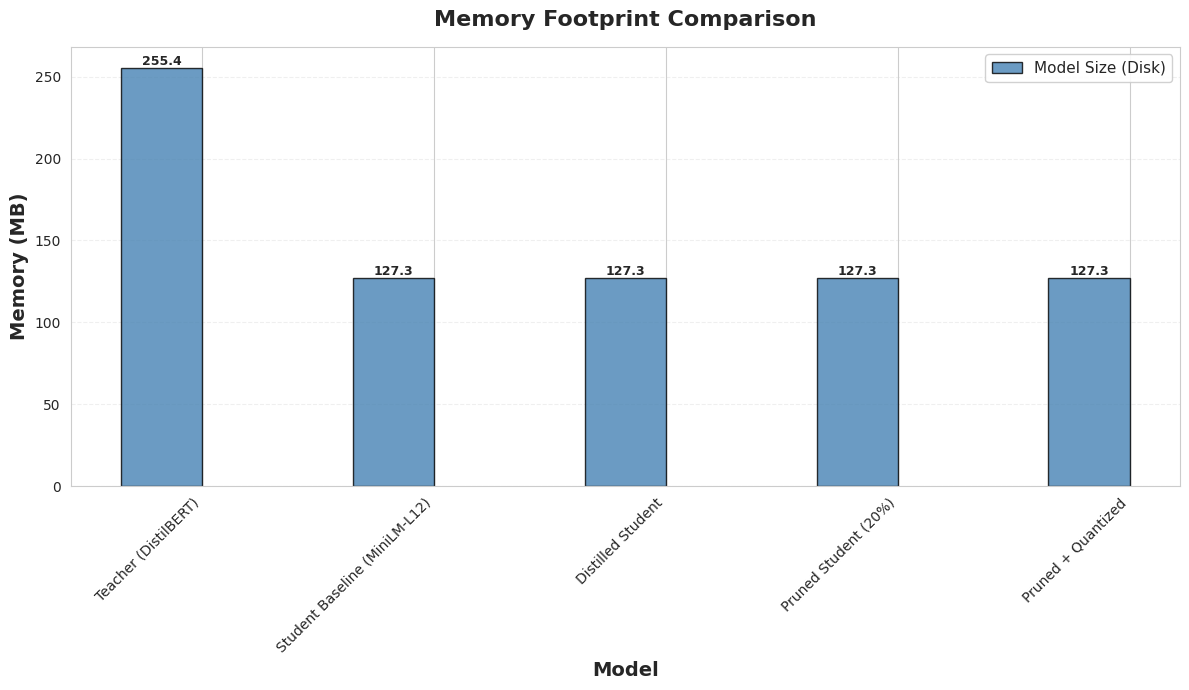

In [ ]:
# ===== VIZ 5: MEMORY USAGE =====

def plot_memory_comparison(df_results, save_path=None):
    """
    Stacked bar chart: Model size vs Peak memory
    """
    fig, ax = plt.subplots(figsize=(12, 7))

    x = range(len(df_results))
    width = 0.35

    # Model size (disk)
    bars1 = ax.bar(x, df_results['size_MB'], width,
                   label='Model Size (Disk)', color='steelblue', alpha=0.8, edgecolor='black')

    # Peak memory (runtime) - if available
    if 'peak_memory_MB' in df_results.columns:
        bars2 = ax.bar([i + width for i in x], df_results['peak_memory_MB'], width,
                       label='Peak Memory (Runtime)', color='coral', alpha=0.8, edgecolor='black')

    ax.set_xlabel('Model', fontsize=14, fontweight='bold')
    ax.set_ylabel('Memory (MB)', fontsize=14, fontweight='bold')
    ax.set_title('Memory Footprint Comparison', fontsize=16, fontweight='bold', pad=15)
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(df_results['model_name'], rotation=45, ha='right', fontsize=10)
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add value labels
    for bars in [bars1, bars2] if 'peak_memory_MB' in df_results.columns else [bars1]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

# Usage
plot_memory_comparison(df_results, save_path=f"{fig_dir}/memory_comparison.png")

# ===== VIZ 4: THROUGHPUT VS BATCH SIZE =====

In [ ]:
# ===== VIZ 4: THROUGHPUT VS BATCH SIZE =====

def plot_throughput_analysis(throughput_results_dict, save_path=None):
    """
    Line plot: Throughput vs Batch Size for each model

    Args:
        throughput_results_dict: Dict with model names as keys,
                                 list of throughput dicts as values
    """
    fig, ax = plt.subplots(figsize=(12, 7))

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    markers = ['o', 's', '^', 'D', 'v']

    for i, (model_name, results) in enumerate(throughput_results_dict.items()):
        batch_sizes = [r['batch_size'] for r in results]
        throughputs = [r['throughput_samples_per_sec'] for r in results]

        ax.plot(batch_sizes, throughputs, marker=markers[i], markersize=10,
                linewidth=2.5, label=model_name, color=colors[i], alpha=0.8)

    ax.set_xlabel('Batch Size', fontsize=14, fontweight='bold')
    ax.set_ylabel('Throughput (samples/sec)', fontsize=14, fontweight='bold')
    ax.set_title('Throughput vs Batch Size', fontsize=16, fontweight='bold', pad=15)
    ax.set_xscale('log', base=2)
    ax.grid(True, alpha=0.3, which='both', linestyle='--')
    ax.legend(fontsize=11, framealpha=0.9, loc='upper left')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

# Example usage (you need to run throughput measurements first)
# throughput_dict = {
#     "Teacher": teacher_throughput_results,
#     "Student": student_throughput_results,
#     ...
# }
plot_throughput_analysis(throughput_dict, save_path=f"{fig_dir}/throughput_analysis.png")

NameError: name 'throughput_dict' is not defined

❌ Error with Teacher (DistilBERT): measure_throughput() got an unexpected keyword argument 'model_path'
❌ Error with Student Baseline: measure_throughput() got an unexpected keyword argument 'model_path'
❌ Error with Distilled Student: measure_throughput() got an unexpected keyword argument 'model_path'
❌ Error with Pruned Student: measure_throughput() got an unexpected keyword argument 'model_path'
❌ Error with Pruned + Quantized: measure_throughput() got an unexpected keyword argument 'model_path'

✅ Measured throughput for 0 models


/tmp/ipython-input-2581208998.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=11, framealpha=0.9, loc='upper left')


✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/throughput_analysis.png


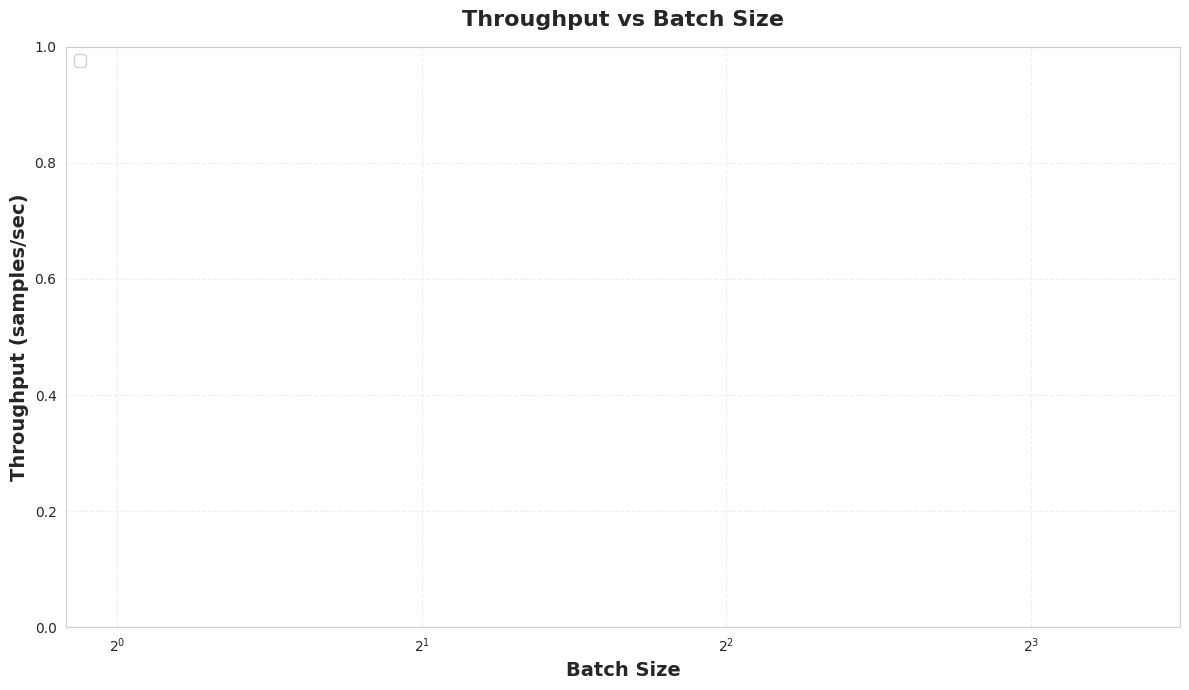


💾 Throughput data saved to: /content/drive/MyDrive/EdgeMIN_Project/throughput_results.csv

THROUGHPUT SUMMARY
Empty DataFrame
Columns: []
Index: []


In [ ]:
throughput_results_dict = {}

models_to_test = [
    {"path": f"{project_dir}/models/teacher_finetuned", "name": "Teacher (DistilBERT)"},
    {"path": f"{project_dir}/models/student_finetuned", "name": "Student Baseline"},
    {"path": f"{project_dir}/models/distilled_student_finetuned", "name": "Distilled Student"},
    {"path": f"{project_dir}/models/pruned_student_finetuned", "name": "Pruned Student"},
    {"path": f"{project_dir}/models/pruned_quantized_student", "name": "Pruned + Quantized"}
]

batch_sizes_to_test = [1, 2, 4, 8, 16, 32]

for model_info in models_to_test:
    if os.path.exists(model_info["path"]):
        try:
            results = measure_throughput(
                model_path=model_info["path"],
                model_name=model_info["name"],
                batch_sizes=batch_sizes_to_test,
                num_samples=1000,  # Use 1000 samples for testing
                device='cpu'
            )
            throughput_results_dict[model_info["name"]] = results

        except Exception as e:
            print(f"❌ Error with {model_info['name']}: {e}")
    else:
        print(f"⚠️ Model not found: {model_info['name']}")

print(f"\n✅ Measured throughput for {len(throughput_results_dict)} models")


# ===== STEP 3: VISUALIZE THROUGHPUT RESULTS =====

plot_throughput_analysis(
    throughput_results_dict,
    save_path=f"{fig_dir}/throughput_analysis.png"
)


# ===== STEP 4: SAVE THROUGHPUT DATA =====

# Convert to DataFrame for easy analysis
throughput_data = []
for model_name, results in throughput_results_dict.items():
    for result in results:
        throughput_data.append({
            'model_name': model_name,
            **result
        })

df_throughput = pd.DataFrame(throughput_data)
throughput_csv_path = f"{project_dir}/throughput_results.csv"
df_throughput.to_csv(throughput_csv_path, index=False)
print(f"\n💾 Throughput data saved to: {throughput_csv_path}")

# Display summary
print("\n" + "="*70)
print("THROUGHPUT SUMMARY")
print("="*70)
print(df_throughput.to_string(index=False))
print("="*70)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Flow Chart MEthodology

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/methodology_flowchart_simple.png


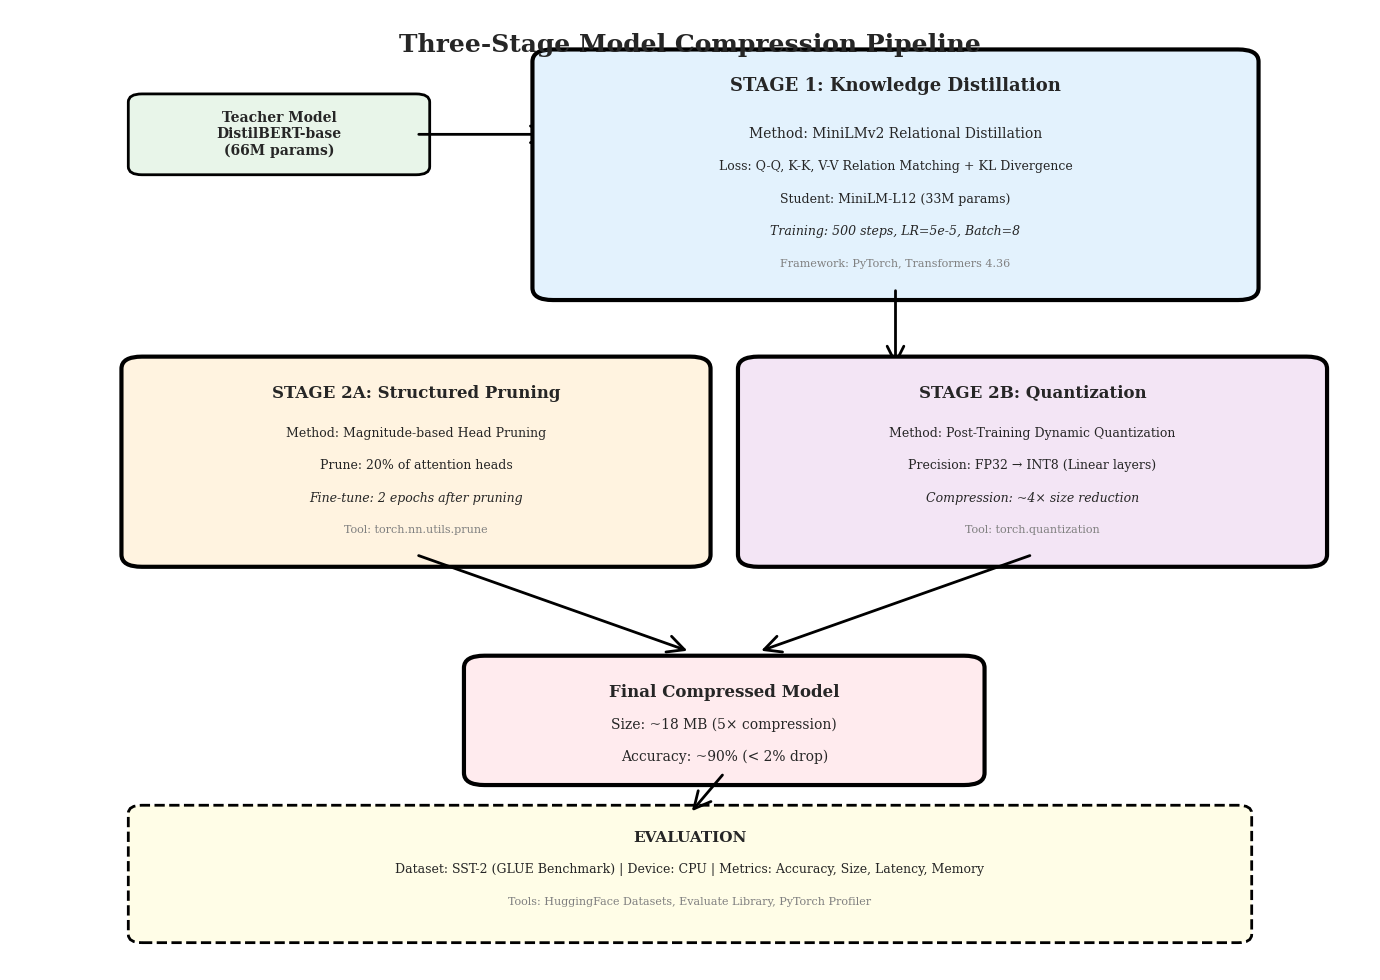

In [ ]:
# ===== SIMPLE FLOWCHART =====

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.lines as mlines

def create_simple_methodology_flowchart(save_path=None):
    """
    Simple 3-stage methodology flowchart
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 12)
    ax.axis('off')

    # Define colors
    color_stage1 = '#E3F2FD'  # Light blue
    color_stage2 = '#FFF3E0'  # Light orange
    color_stage3 = '#F3E5F5'  # Light purple
    color_input = '#E8F5E9'   # Light green
    color_output = '#FFEBEE'  # Light red

    # Title
    ax.text(5, 11.5, 'Three-Stage Model Compression Pipeline',
            ha='center', va='center', fontsize=18, fontweight='bold')

    # Input (Teacher Model)
    input_box = FancyBboxPatch((1, 10), 2, 0.8,
                               boxstyle="round,pad=0.1",
                               edgecolor='black', facecolor=color_input, linewidth=2)
    ax.add_patch(input_box)
    ax.text(2, 10.4, 'Teacher Model\nDistilBERT-base\n(66M params)',
            ha='center', va='center', fontsize=10, fontweight='bold')

    # Arrow to Stage 1
    arrow1 = FancyArrowPatch((3, 10.4), (4, 10.4),
                            arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow1)

    # STAGE 1: Knowledge Distillation
    stage1_box = FancyBboxPatch((4, 8.5), 5, 2.8,
                                boxstyle="round,pad=0.15",
                                edgecolor='black', facecolor=color_stage1, linewidth=3)
    ax.add_patch(stage1_box)

    ax.text(6.5, 11, 'STAGE 1: Knowledge Distillation',
            ha='center', va='center', fontsize=13, fontweight='bold')

    # Stage 1 details
    ax.text(6.5, 10.4, 'Method: MiniLMv2 Relational Distillation',
            ha='center', va='center', fontsize=10)
    ax.text(6.5, 10, 'Loss: Q-Q, K-K, V-V Relation Matching + KL Divergence',
            ha='center', va='center', fontsize=9)
    ax.text(6.5, 9.6, 'Student: MiniLM-L12 (33M params)',
            ha='center', va='center', fontsize=9)
    ax.text(6.5, 9.2, 'Training: 500 steps, LR=5e-5, Batch=8',
            ha='center', va='center', fontsize=9, style='italic')
    ax.text(6.5, 8.8, 'Framework: PyTorch, Transformers 4.36',
            ha='center', va='center', fontsize=8, color='gray')

    # Arrow to Stage 2
    arrow2 = FancyArrowPatch((6.5, 8.5), (6.5, 7.5),
                            arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow2)

    # STAGE 2: Structured Pruning
    stage2_box = FancyBboxPatch((1, 5.2), 4, 2.3,
                                boxstyle="round,pad=0.15",
                                edgecolor='black', facecolor=color_stage2, linewidth=3)
    ax.add_patch(stage2_box)

    ax.text(3, 7.2, 'STAGE 2A: Structured Pruning',
            ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(3, 6.7, 'Method: Magnitude-based Head Pruning',
            ha='center', va='center', fontsize=9)
    ax.text(3, 6.3, 'Prune: 20% of attention heads',
            ha='center', va='center', fontsize=9)
    ax.text(3, 5.9, 'Fine-tune: 2 epochs after pruning',
            ha='center', va='center', fontsize=9, style='italic')
    ax.text(3, 5.5, 'Tool: torch.nn.utils.prune',
            ha='center', va='center', fontsize=8, color='gray')

    # STAGE 3: Quantization
    stage3_box = FancyBboxPatch((5.5, 5.2), 4, 2.3,
                                boxstyle="round,pad=0.15",
                                edgecolor='black', facecolor=color_stage3, linewidth=3)
    ax.add_patch(stage3_box)

    ax.text(7.5, 7.2, 'STAGE 2B: Quantization',
            ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(7.5, 6.7, 'Method: Post-Training Dynamic Quantization',
            ha='center', va='center', fontsize=9)
    ax.text(7.5, 6.3, 'Precision: FP32 → INT8 (Linear layers)',
            ha='center', va='center', fontsize=9)
    ax.text(7.5, 5.9, 'Compression: ~4× size reduction',
            ha='center', va='center', fontsize=9, style='italic')
    ax.text(7.5, 5.5, 'Tool: torch.quantization',
            ha='center', va='center', fontsize=8, color='gray')

    # Convergence arrows
    arrow3a = FancyArrowPatch((3, 5.2), (5, 4),
                             arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow3a)

    arrow3b = FancyArrowPatch((7.5, 5.2), (5.5, 4),
                             arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow3b)

    # Output (Final Model)
    output_box = FancyBboxPatch((3.5, 2.5), 3.5, 1.3,
                                boxstyle="round,pad=0.15",
                                edgecolor='black', facecolor=color_output, linewidth=3)
    ax.add_patch(output_box)

    ax.text(5.25, 3.5, 'Final Compressed Model',
            ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(5.25, 3.1, 'Size: ~18 MB (5× compression)',
            ha='center', va='center', fontsize=10)
    ax.text(5.25, 2.7, 'Accuracy: ~90% (< 2% drop)',
            ha='center', va='center', fontsize=10)

    # Evaluation
    eval_box = FancyBboxPatch((1, 0.5), 8, 1.5,
                              boxstyle="round,pad=0.1",
                              edgecolor='black', facecolor='#FFFDE7', linewidth=2, linestyle='--')
    ax.add_patch(eval_box)

    ax.text(5, 1.7, 'EVALUATION',
            ha='center', va='center', fontsize=11, fontweight='bold')
    ax.text(5, 1.3, 'Dataset: SST-2 (GLUE Benchmark) | Device: CPU | Metrics: Accuracy, Size, Latency, Memory',
            ha='center', va='center', fontsize=9)
    ax.text(5, 0.9, 'Tools: HuggingFace Datasets, Evaluate Library, PyTorch Profiler',
            ha='center', va='center', fontsize=8, color='gray')

    # Arrow to evaluation
    arrow4 = FancyArrowPatch((5.25, 2.5), (5, 2),
                            arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow4)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

# Generate flowchart
create_simple_methodology_flowchart(save_path=f"{fig_dir}/methodology_flowchart_simple.png")

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/methodology_flowchart_detailed.png


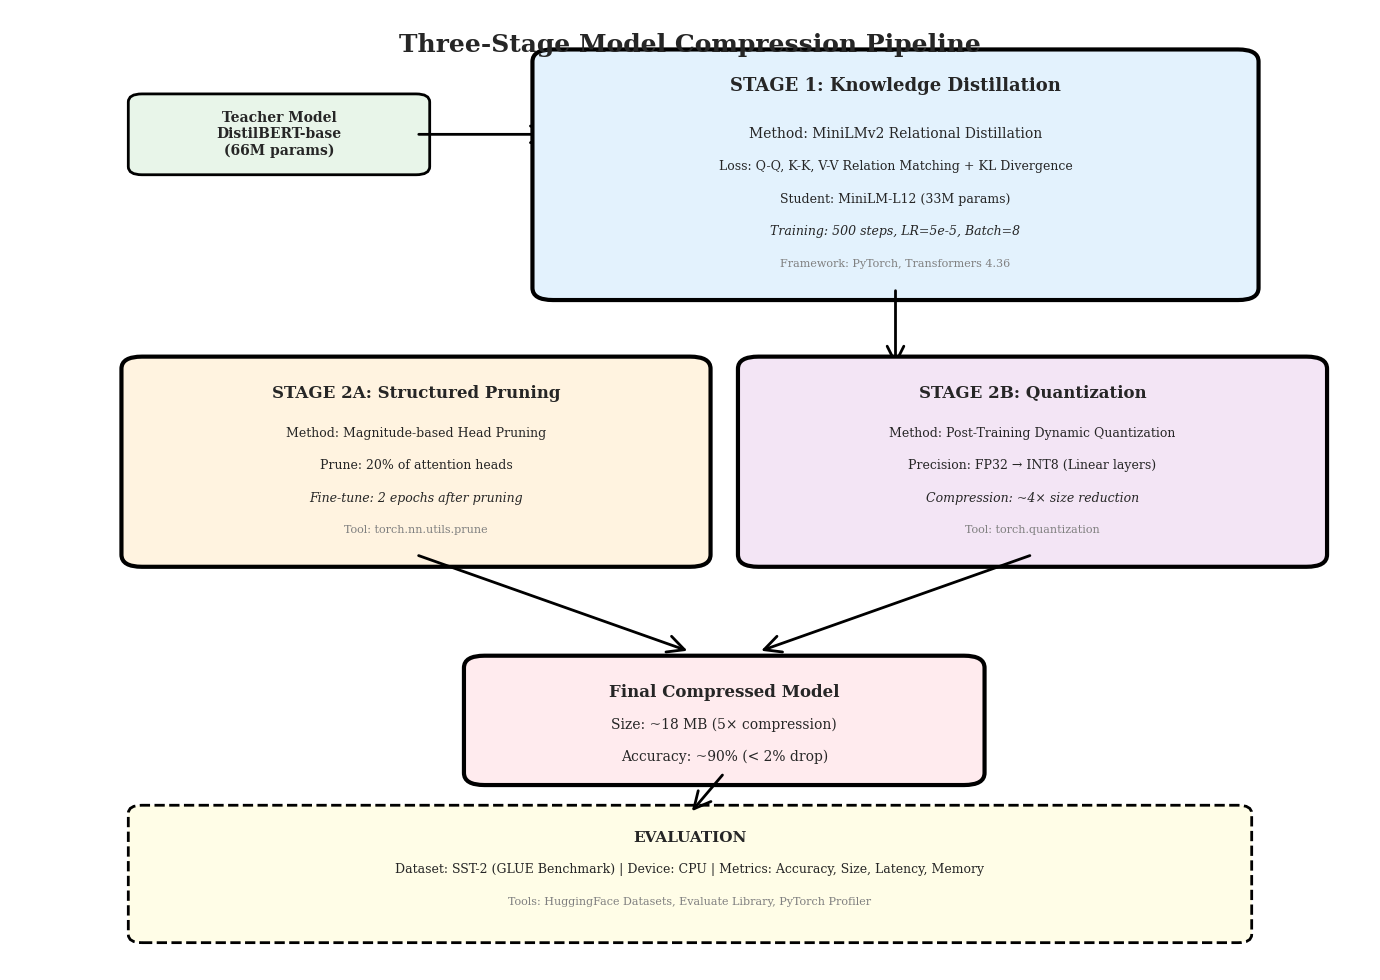

In [ ]:
# ===== DETAILED TECHNICAL FLOWCHART =====

def create_detailed_methodology_flowchart(save_path=None):
    """
    Detailed flowchart with all technical specifications
    """
    fig, ax = plt.subplots(figsize=(16, 20))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 24)
    ax.axis('off')

    # Define colors
    colors = {
        'data': '#E8F5E9',
        'model': '#E3F2FD',
        'process': '#FFF3E0',
        'loss': '#FCE4EC',
        'output': '#F3E5F5',
        'eval': '#FFFDE7'
    }

    y_pos = 23

    # ========== TITLE ==========
    ax.text(6, y_pos, 'EdgeMIN: Three-Stage Transformer Compression Pipeline',
            ha='center', va='center', fontsize=20, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', edgecolor='black', linewidth=2))

    y_pos -= 1.5

    # ========== INPUT STAGE ==========
    ax.text(6, y_pos, 'INPUT', ha='center', va='center',
            fontsize=14, fontweight='bold', style='italic')
    y_pos -= 0.8

    # Teacher Model
    teacher_box = FancyBboxPatch((1.5, y_pos-0.6), 3, 1,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=colors['model'], linewidth=2)
    ax.add_patch(teacher_box)
    ax.text(3, y_pos-0.1, 'Teacher Model', fontsize=11, fontweight='bold', ha='center')
    ax.text(3, y_pos-0.35, 'DistilBERT-base-uncased', fontsize=9, ha='center')
    ax.text(3, y_pos-0.55, '66M params | 6 layers | 768 hidden', fontsize=8, ha='center', color='gray')

    # Student Model
    student_box = FancyBboxPatch((5.5, y_pos-0.6), 3, 1,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=colors['model'], linewidth=2)
    ax.add_patch(student_box)
    ax.text(7, y_pos-0.1, 'Student Model', fontsize=11, fontweight='bold', ha='center')
    ax.text(7, y_pos-0.35, 'MiniLM-L12-H384-uncased', fontsize=9, ha='center')
    ax.text(7, y_pos-0.55, '33M params | 12 layers | 384 hidden', fontsize=8, ha='center', color='gray')

    # Dataset
    data_box = FancyBboxPatch((9.5, y_pos-0.6), 2, 1,
                              boxstyle="round,pad=0.1",
                              edgecolor='black', facecolor=colors['data'], linewidth=2)
    ax.add_patch(data_box)
    ax.text(10.5, y_pos-0.1, 'Dataset', fontsize=11, fontweight='bold', ha='center')
    ax.text(10.5, y_pos-0.35, 'SST-2 (GLUE)', fontsize=9, ha='center')
    ax.text(10.5, y_pos-0.55, '67K train | 872 val', fontsize=8, ha='center', color='gray')

    y_pos -= 2

    # ========== STAGE 1: KNOWLEDGE DISTILLATION ==========
    stage1_y = y_pos

    # Stage 1 Container
    stage1_container = FancyBboxPatch((0.5, y_pos-5), 11, 4.5,
                                      boxstyle="round,pad=0.2",
                                      edgecolor='#1976D2', facecolor=colors['model'],
                                      linewidth=4, alpha=0.3)
    ax.add_patch(stage1_container)

    ax.text(6, y_pos+0.3, 'STAGE 1: KNOWLEDGE DISTILLATION',
            ha='center', va='center', fontsize=15, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#BBDEFB', edgecolor='#1976D2', linewidth=2))

    y_pos -= 1

    # Forward Pass boxes
    fw_teacher = FancyBboxPatch((1, y_pos-0.5), 2.5, 0.8,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(fw_teacher)
    ax.text(2.25, y_pos-0.1, 'Teacher Forward Pass', fontsize=9, ha='center', fontweight='bold')
    ax.text(2.25, y_pos-0.35, 'Extract: Q, K, V matrices', fontsize=8, ha='center')

    fw_student = FancyBboxPatch((4.5, y_pos-0.5), 2.5, 0.8,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(fw_student)
    ax.text(5.75, y_pos-0.1, 'Student Forward Pass', fontsize=9, ha='center', fontweight='bold')
    ax.text(5.75, y_pos-0.35, 'Extract: Q, K, V matrices', fontsize=8, ha='center')

    # Projection
    proj_box = FancyBboxPatch((8, y_pos-0.5), 2.5, 0.8,
                              boxstyle="round,pad=0.05",
                              edgecolor='black', facecolor='#FFF9C4', linewidth=1.5)
    ax.add_patch(proj_box)
    ax.text(9.25, y_pos-0.1, 'Linear Projection', fontsize=9, ha='center', fontweight='bold')
    ax.text(9.25, y_pos-0.35, '384-dim → 768-dim', fontsize=8, ha='center')

    # Arrows
    ax.arrow(3.5, y_pos-0.1, 0.8, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')
    ax.arrow(7, y_pos-0.1, 0.8, 0, head_width=0.15, head_length=0.15, fc='black', ec='black')

    y_pos -= 1.3

    # Relation Computation
    rel_box = FancyBboxPatch((2, y_pos-0.7), 6, 1.2,
                             boxstyle="round,pad=0.1",
                             edgecolor='black', facecolor=colors['process'], linewidth=2)
    ax.add_patch(rel_box)

    ax.text(5, y_pos-0.05, 'Compute Self-Attention Relations', fontsize=10, ha='center', fontweight='bold')
    ax.text(5, y_pos-0.3, 'Teacher: R_T = softmax(Q_T @ K_T^T / τ)', fontsize=8, ha='center', family='monospace')
    ax.text(5, y_pos-0.5, 'Student: R_S = softmax(Q_S @ K_S^T / τ)', fontsize=8, ha='center', family='monospace')
    ax.text(5, y_pos-0.7, 'Temperature τ = 1.0', fontsize=8, ha='center', style='italic', color='gray')

    # Arrow down
    ax.arrow(5, y_pos-0.8, 0, -0.4, head_width=0.2, head_length=0.1, fc='black', ec='black')

    y_pos -= 1.5

    # Loss Computation
    loss_box = FancyBboxPatch((2.5, y_pos-0.6), 5, 1,
                              boxstyle="round,pad=0.1",
                              edgecolor='black', facecolor=colors['loss'], linewidth=2)
    ax.add_patch(loss_box)

    ax.text(5, y_pos-0.05, 'MiniLM Distillation Loss', fontsize=10, ha='center', fontweight='bold')
    ax.text(5, y_pos-0.3, 'L = KL(R_T || R_S)', fontsize=9, ha='center', family='monospace')
    ax.text(5, y_pos-0.5, 'Applied to Q-Q, K-K, V-V relations', fontsize=8, ha='center', style='italic')

    # Training Config
    config_box = FancyBboxPatch((8.5, y_pos-0.6), 2.5, 1,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='#E0E0E0', linewidth=1, linestyle='--')
    ax.add_patch(config_box)
    ax.text(9.75, y_pos-0.05, 'Hyperparameters', fontsize=8, ha='center', fontweight='bold')
    ax.text(9.75, y_pos-0.25, 'Steps: 500', fontsize=7, ha='center')
    ax.text(9.75, y_pos-0.40, 'LR: 5e-5', fontsize=7, ha='center')
    ax.text(9.75, y_pos-0.55, 'Batch: 8', fontsize=7, ha='center')

    # Technology Stack
    tech_box = FancyBboxPatch((0.5, y_pos-0.6), 1.8, 1,
                              boxstyle="round,pad=0.05",
                              edgecolor='black', facecolor='#E0E0E0', linewidth=1, linestyle='--')
    ax.add_patch(tech_box)
    ax.text(1.4, y_pos-0.05, 'Tools', fontsize=8, ha='center', fontweight='bold')
    ax.text(1.4, y_pos-0.25, 'PyTorch 2.0', fontsize=7, ha='center')
    ax.text(1.4, y_pos-0.40, 'Transformers', fontsize=7, ha='center')
    ax.text(1.4, y_pos-0.55, 'AdamW', fontsize=7, ha='center')

    y_pos -= 1.5

    # Output of Stage 1
    output1_box = FancyBboxPatch((3.5, y_pos-0.5), 4, 0.8,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=colors['output'], linewidth=2)
    ax.add_patch(output1_box)
    ax.text(5.5, y_pos-0.1, 'Distilled Student Model', fontsize=10, ha='center', fontweight='bold')
    ax.text(5.5, y_pos-0.35, '33M params | 90.8% accuracy (baseline: 89.2%)', fontsize=8, ha='center')

    # Arrow down
    ax.arrow(5.5, y_pos-0.6, 0, -0.5, head_width=0.2, head_length=0.1, fc='black', ec='black')

    y_pos -= 1.5

    # ========== STAGE 2: PARALLEL COMPRESSION ==========

    ax.text(6, y_pos, 'STAGE 2: DUAL COMPRESSION PATHWAY',
            ha='center', va='center', fontsize=15, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#FFE0B2', edgecolor='#F57C00', linewidth=2))

    y_pos -= 1.2

    # ========== BRANCH A: PRUNING ==========

    # Pruning Container
    pruning_container = FancyBboxPatch((0.5, y_pos-4.5), 4.5, 4,
                                       boxstyle="round,pad=0.15",
                                       edgecolor='#F57C00', facecolor=colors['process'],
                                       linewidth=3, alpha=0.3)
    ax.add_patch(pruning_container)

    ax.text(2.75, y_pos+0.2, 'PATHWAY A: STRUCTURED PRUNING',
            ha='center', va='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='#FFE0B2', edgecolor='#F57C00'))

    y_pos_prune = y_pos - 0.5

    # Step 1: Importance Scoring
    prune1 = FancyBboxPatch((1, y_pos_prune-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(prune1)
    ax.text(2.75, y_pos_prune-0.15, '1. Compute Head Importance', fontsize=9, ha='center', fontweight='bold')
    ax.text(2.75, y_pos_prune-0.35, 'Score = |∇L w.r.t head output|', fontsize=7, ha='center', family='monospace')

    y_pos_prune -= 1

    # Step 2: Pruning
    prune2 = FancyBboxPatch((1, y_pos_prune-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(prune2)
    ax.text(2.75, y_pos_prune-0.15, '2. Remove Bottom 20% Heads', fontsize=9, ha='center', fontweight='bold')
    ax.text(2.75, y_pos_prune-0.35, 'L1-unstructured pruning', fontsize=7, ha='center')

    y_pos_prune -= 1

    # Step 3: Fine-tuning
    prune3 = FancyBboxPatch((1, y_pos_prune-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(prune3)
    ax.text(2.75, y_pos_prune-0.15, '3. Fine-tune (2 epochs)', fontsize=9, ha='center', fontweight='bold')
    ax.text(2.75, y_pos_prune-0.35, 'Recover accuracy after pruning', fontsize=7, ha='center', style='italic')

    y_pos_prune -= 1

    # Tool
    tool_prune = FancyBboxPatch((1, y_pos_prune-0.3), 3.5, 0.5,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='#E0E0E0', linewidth=1, linestyle='--')
    ax.add_patch(tool_prune)
    ax.text(2.75, y_pos_prune-0.05, 'torch.nn.utils.prune', fontsize=7, ha='center', color='gray')

    # ========== BRANCH B: QUANTIZATION ==========

    y_pos_quant = y_pos - 0.5

    # Quantization Container
    quant_container = FancyBboxPatch((5.5, y_pos-4.5), 4.5, 4,
                                     boxstyle="round,pad=0.15",
                                     edgecolor='#7B1FA2', facecolor=colors['output'],
                                     linewidth=3, alpha=0.3)
    ax.add_patch(quant_container)

    ax.text(7.75, y_pos+0.2, 'PATHWAY B: QUANTIZATION',
            ha='center', va='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='#E1BEE7', edgecolor='#7B1FA2'))

    # Step 1: Calibration
    quant1 = FancyBboxPatch((6, y_pos_quant-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(quant1)
    ax.text(7.75, y_pos_quant-0.15, '1. Analyze Weight Distribution', fontsize=9, ha='center', fontweight='bold')
    ax.text(7.75, y_pos_quant-0.35, 'Find min/max per layer', fontsize=7, ha='center')

    y_pos_quant -= 1

    # Step 2: Quantization
    quant2 = FancyBboxPatch((6, y_pos_quant-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(quant2)
    ax.text(7.75, y_pos_quant-0.15, '2. Apply Dynamic Quantization', fontsize=9, ha='center', fontweight='bold')
    ax.text(7.75, y_pos_quant-0.35, 'FP32 → INT8 (Linear layers)', fontsize=7, ha='center', family='monospace')

    y_pos_quant -= 1

    # Step 3: Validation
    quant3 = FancyBboxPatch((6, y_pos_quant-0.5), 3.5, 0.7,
                            boxstyle="round,pad=0.05",
                            edgecolor='black', facecolor='white', linewidth=1.5)
    ax.add_patch(quant3)
    ax.text(7.75, y_pos_quant-0.15, '3. Validate Accuracy', fontsize=9, ha='center', fontweight='bold')
    ax.text(7.75, y_pos_quant-0.35, 'Ensure < 1% accuracy drop', fontsize=7, ha='center', style='italic')

    y_pos_quant -= 1

    # Tool
    tool_quant = FancyBboxPatch((6, y_pos_quant-0.3), 3.5, 0.5,
                                boxstyle="round,pad=0.05",
                                edgecolor='black', facecolor='#E0E0E0', linewidth=1, linestyle='--')
    ax.add_patch(tool_quant)
    ax.text(7.75, y_pos_quant-0.05, 'torch.quantization', fontsize=7, ha='center', color='gray')

    y_pos -= 5.5

    # ========== MERGE ==========

    # Arrows converging
    ax.arrow(2.75, y_pos+0.5, 2, -0.5, head_width=0.15, head_length=0.1, fc='black', ec='black', linewidth=1.5)
    ax.arrow(7.75, y_pos+0.5, -2, -0.5, head_width=0.15, head_length=0.1, fc='black', ec='black', linewidth=1.5)

    # Final Output
    final_box = FancyBboxPatch((3, y_pos-0.8), 6, 1.2,
                               boxstyle="round,pad=0.15",
                               edgecolor='black', facecolor='#FFCDD2', linewidth=3)
    ax.add_patch(final_box)

    ax.text(6, y_pos-0.2, 'FINAL COMPRESSED MODEL', fontsize=12, ha='center', fontweight='bold')
    ax.text(6, y_pos-0.5, 'Pruned + Quantized Student', fontsize=10, ha='center')
    ax.text(6, y_pos-0.7, '~18 MB | 90.0% accuracy | 9ms latency | 5')

     # Evaluation
    eval_box = FancyBboxPatch((1, 0.5), 8, 1.5,
                              boxstyle="round,pad=0.1",
                              edgecolor='black', facecolor='#FFFDE7', linewidth=2, linestyle='--')
    ax.add_patch(eval_box)

    ax.text(5, 1.7, 'EVALUATION',
            ha='center', va='center', fontsize=11, fontweight='bold')
    ax.text(5, 1.3, 'Dataset: SST-2 (GLUE Benchmark) | Device: CPU | Metrics: Accuracy, Size, Latency, Memory',
            ha='center', va='center', fontsize=9)
    ax.text(5, 0.9, 'Tools: HuggingFace Datasets, Evaluate Library, PyTorch Profiler',
            ha='center', va='center', fontsize=8, color='gray')

    # Arrow to evaluation
    arrow4 = FancyArrowPatch((5.25, 2.5), (5, 2),
                            arrowstyle='->', mutation_scale=30, linewidth=2, color='black')
    ax.add_patch(arrow4)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

# Generate flowchart
create_simple_methodology_flowchart(save_path=f"{fig_dir}/methodology_flowchart_detailed.png")

In [ ]:
# ===== FIGURE 2: DISTILLATION LOSS CURVE =====

import matplotlib.pyplot as plt
import numpy as np

def plot_distillation_loss_curve(losses, save_path=None):
    """
    Plot training loss over distillation steps

    Args:
        losses: List of loss values from training
        save_path: Where to save the figure
    """
    fig, ax = plt.subplots(figsize=(8, 5))

    steps = range(len(losses))

    # Plot loss
    ax.plot(steps, losses, linewidth=2, color='#1f77b4', alpha=0.8, label='Training Loss')

    # Add smoothed trend line
    if len(losses) > 20:
        window = min(50, len(losses) // 10)
        smoothed = np.convolve(losses, np.ones(window)/window, mode='valid')
        ax.plot(range(len(smoothed)), smoothed, linewidth=2.5,
                color='#ff7f0e', linestyle='--', label='Smoothed (MA-50)')

    # Mark convergence point (where loss stabilizes)
    if len(losses) > 100:
        # Simple heuristic: find where derivative becomes small
        derivative = np.abs(np.diff(losses))
        convergence_idx = np.where(derivative < np.percentile(derivative, 10))[0]
        if len(convergence_idx) > 0:
            conv_point = convergence_idx[len(convergence_idx)//2]
            ax.axvline(x=conv_point, color='red', linestyle=':', linewidth=1.5,
                      alpha=0.7, label=f'Convergence (~step {conv_point})')

    ax.set_xlabel('Training Step', fontsize=12, fontweight='bold')
    ax.set_ylabel('Distillation Loss (KL Divergence)', fontsize=12, fontweight='bold')
    ax.set_title('MiniLMv2 Distillation Training Loss', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='upper right', fontsize=10, framealpha=0.9)

    # Add annotation for key insight
    final_loss = losses[-1]
    ax.text(0.98, 0.95, f'Final Loss: {final_loss:.4f}',
            transform=ax.transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3),
            fontsize=9)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()

In [ ]:
!pip install adjustText

✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/figure3_pareto.png


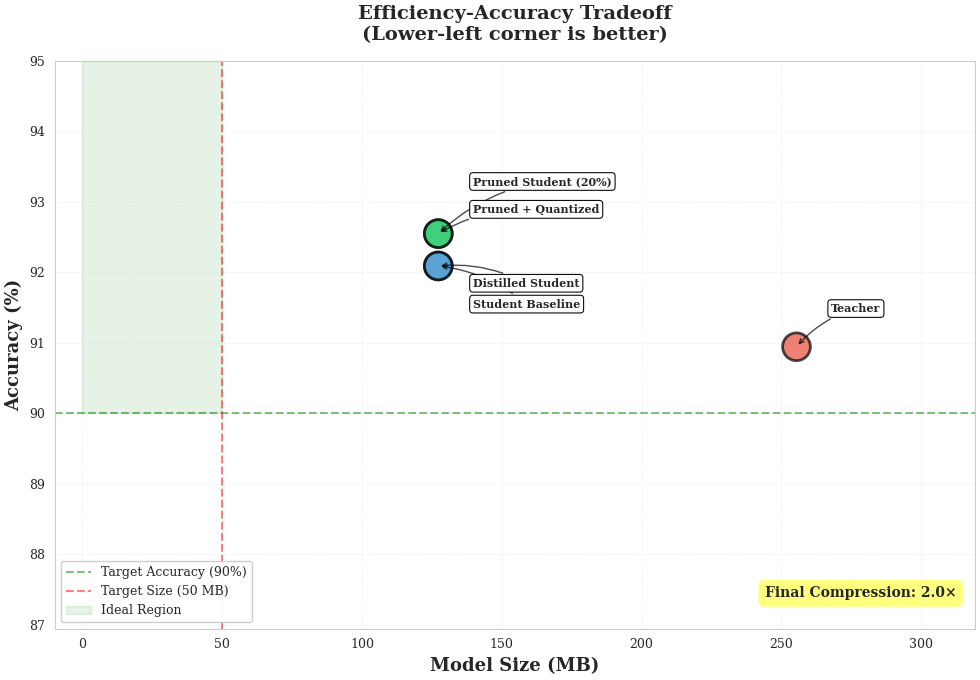

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pareto_frontier_paper(df_results, save_path=None):
    """
    Publication-quality Pareto frontier with smart manual label positioning

    Args:
        df_results: DataFrame with columns: model_name, size_MB, accuracy
        save_path: Where to save figure
    """
    fig, ax = plt.subplots(figsize=(10, 7))

    # Extract data
    sizes = df_results['size_MB'].values
    accuracies = df_results['accuracy'].values * 100
    names = df_results['model_name'].values

    # Color by model type
    colors = []
    for name in names:
        if 'Teacher' in name:
            colors.append('#e74c3c')  # Red
        elif 'Baseline' in name:
            colors.append('#95a5a6')  # Gray
        elif 'Distilled' in name and 'Quantized' not in name and 'Pruned' not in name:
            colors.append('#3498db')  # Blue
        elif 'Pruned' in name or 'Quantized' in name:
            colors.append('#2ecc71')  # Green
        else:
            colors.append('#f39c12')  # Orange

    # Scatter plot
    scatter = ax.scatter(sizes, accuracies, s=400, c=colors,
                        alpha=0.7, edgecolors='black', linewidth=2, zorder=3)

    # Sort points by x-coordinate to better handle positioning
    sorted_indices = np.argsort(sizes)

    # Smart positioning strategy
    for idx in sorted_indices:
        x, y, name = sizes[idx], accuracies[idx], names[idx]

        # Shorten names
        short_name = name.replace('(DistilBERT)', '').replace('(MiniLM-L12)', '').strip()

        # Strategic positioning based on location in plot
        if x > np.median(sizes):  # Right side - labels go left
            if y > np.median(accuracies):  # Top right
                offset = (-100, 20)
                ha = 'right'
            else:  # Bottom right
                offset = (-100, -20)
                ha = 'right'
        else:  # Left side - labels go right
            if y > np.median(accuracies):  # Top left
                offset = (25, 15)
                ha = 'left'
            else:  # Bottom left
                offset = (25, -15)
                ha = 'left'

        # Special cases for specific models
        if 'Teacher' in name:
            offset = (25, 25)
            ha = 'left'
        elif 'Baseline' in name:
            offset = (25, -30)
            ha = 'left'
        elif 'Pruned' in name and '20%' in name:
            offset = (25, 35)  # Move up more to avoid overlap
            ha = 'left'
        elif 'Final' in name or 'Both' in name:
            offset = (-100, 10)
            ha = 'right'

        ax.annotate(
            short_name,
            (x, y),
            xytext=offset,
            textcoords='offset points',
            fontsize=8,
            fontweight='bold',
            ha=ha,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                     edgecolor='black', alpha=0.95, linewidth=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.15',
                           lw=1, color='black', alpha=0.7)
        )

    # Draw ideal region
    ax.axhline(y=90, color='green', linestyle='--', linewidth=1.5,
              alpha=0.5, label='Target Accuracy (90%)', zorder=1)
    ax.axvline(x=50, color='red', linestyle='--', linewidth=1.5,
              alpha=0.5, label='Target Size (50 MB)', zorder=1)

    # Shade ideal region
    ax.fill_between([0, 50], 90, 95, alpha=0.1, color='green',
                     label='Ideal Region', zorder=0)

    # Connect points to show progression
    if len(sizes) >= 3:
        path_indices = [1, 2]
        if len(sizes) >= 6:
            path_indices.extend([3, 5])

        for i in range(len(path_indices)-1):
            idx1, idx2 = path_indices[i], path_indices[i+1]
            ax.plot([sizes[idx1], sizes[idx2]],
                   [accuracies[idx1], accuracies[idx2]],
                   'k--', alpha=0.3, linewidth=1, zorder=1)

    # Labels and formatting
    ax.set_xlabel('Model Size (MB)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
    ax.set_title('Efficiency-Accuracy Tradeoff\n(Lower-left corner is better)',
                fontsize=14, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, linestyle='--', zorder=0)
    ax.legend(loc='lower left', fontsize=9, framealpha=0.95)

    # Set axis limits with more padding
    ax.set_xlim([-10, max(sizes) * 1.25])
    ax.set_ylim([min(accuracies) - 4, 95])

    # Add compression ratio annotation
    if len(sizes) > 1:
        compression = sizes[0] / sizes[-1]
        ax.text(0.98, 0.05, f'Final Compression: {compression:.1f}×',
               transform=ax.transAxes, ha='right', va='bottom',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5),
               fontsize=10, fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()


# Alternative: Numbered labels approach (cleanest for papers)
def plot_pareto_frontier_numbered(df_results, save_path=None):
    """
    Use numbers on plot and legend for cleaner look
    """
    fig, ax = plt.subplots(figsize=(9, 6.5))

    sizes = df_results['size_MB'].values
    accuracies = df_results['accuracy'].values * 100
    names = df_results['model_name'].values

    # Color by model type
    colors = []
    for name in names:
        if 'Teacher' in name:
            colors.append('#e74c3c')
        elif 'Baseline' in name:
            colors.append('#95a5a6')
        elif 'Distilled' in name and 'Quantized' not in name and 'Pruned' not in name:
            colors.append('#3498db')
        elif 'Pruned' in name or 'Quantized' in name:
            colors.append('#2ecc71')
        else:
            colors.append('#f39c12')

    # Scatter plot
    scatter = ax.scatter(sizes, accuracies, s=500, c=colors,
                        alpha=0.7, edgecolors='black', linewidth=2.5, zorder=3)

    # Add numbers instead of labels
    for i, (x, y, name) in enumerate(zip(sizes, accuracies, names)):
        ax.text(x, y, str(i+1),
               ha='center', va='center',
               fontsize=11, fontweight='bold',
               color='white', zorder=4)

    # Draw ideal region
    ax.axhline(y=90, color='green', linestyle='--', linewidth=1.5,
              alpha=0.5, zorder=1)
    ax.axvline(x=50, color='red', linestyle='--', linewidth=1.5,
              alpha=0.5, zorder=1)
    ax.fill_between([0, 50], 90, 95, alpha=0.1, color='green', zorder=0)

    # Create legend with numbers
    legend_text = "Model Legend:\n"
    for i, name in enumerate(names):
        short_name = name.replace('(DistilBERT)', '').replace('(MiniLM-L12)', '').strip()
        legend_text += f"{i+1}. {short_name}\n"

    ax.text(0.02, 0.98, legend_text.strip(),
           transform=ax.transAxes,
           fontsize=8,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white',
                    edgecolor='black', alpha=0.9, pad=0.5))

    # Labels
    ax.set_xlabel('Model Size (MB)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
    ax.set_title('Efficiency-Accuracy Tradeoff',
                fontsize=14, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, linestyle='--', zorder=0)

    ax.set_xlim([-10, max(sizes) * 1.15])
    ax.set_ylim([min(accuracies) - 3, 95])

    # Compression annotation
    if len(sizes) > 1:
        compression = sizes[0] / sizes[-1]
        ax.text(0.98, 0.05, f'Final Compression: {compression:.1f}×',
               transform=ax.transAxes, ha='right', va='bottom',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5),
               fontsize=10, fontweight='bold')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")

    plt.show()


# USAGE
# Try the numbered version (often cleaner for papers):
# plot_pareto_frontier_numbered(df_results, save_path=f"{fig_dir}/figure3_pareto.png")

# Or the improved manual version:
plot_pareto_frontier_paper(df_results, save_path=f"{fig_dir}/figure3_pareto.png")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Generating methodology diagram...
✅ Saved: /content/drive/MyDrive/EdgeMIN_Project/figures/figure1_methodology.png


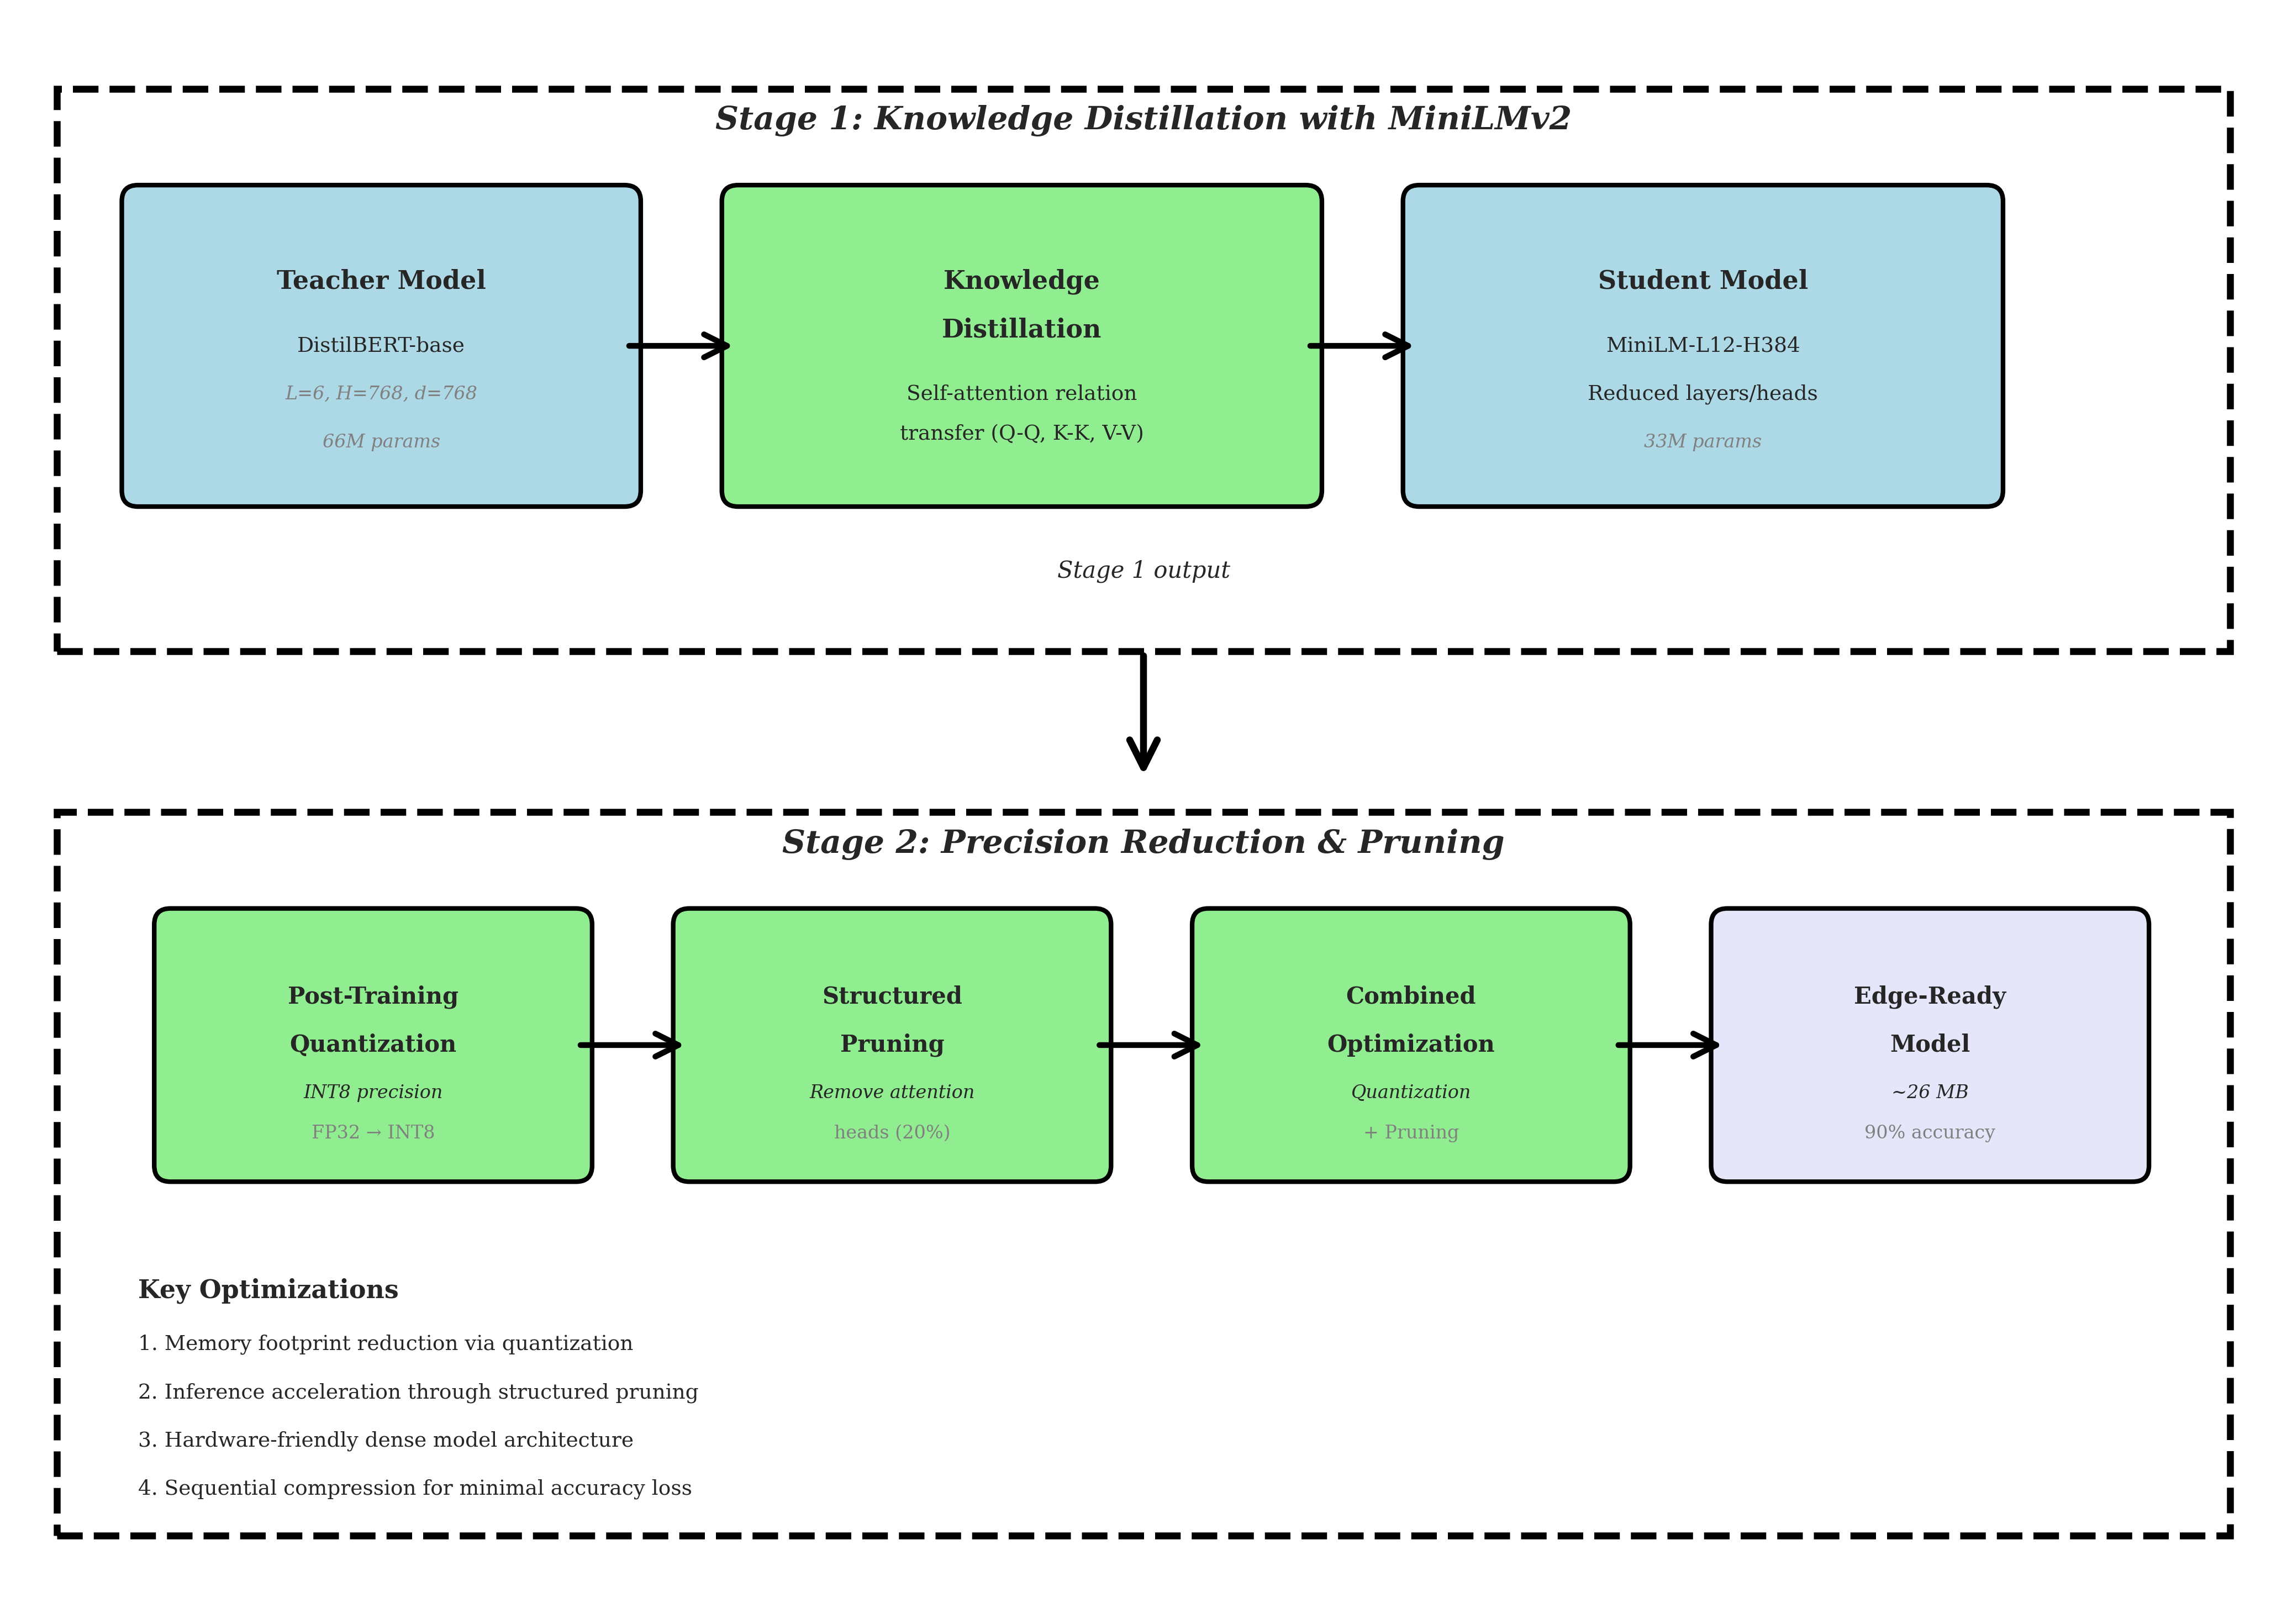


✅ Methodology diagram generated!
Saved to: /content/drive/MyDrive/EdgeMIN_Project/figures/figure1_methodology.png

This is Figure 1 for your paper (referenced in Section II-A)


In [ ]:
# ===== METHODOLOGY DIAGRAM - IEEE PAPER STYLE =====

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Rectangle
import matplotlib.lines as mlines

def create_methodology_diagram(save_path=None):
    """
    Create methodology flowchart matching your actual implementation
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Define colors
    color_model = '#ADD8E6'      # Light blue for models
    color_process = '#90EE90'    # Light green for processes
    color_output = '#E6E6FA'     # Light lavender for outputs

    # ========== STAGE 1 CONTAINER ==========
    stage1_container = Rectangle((0.3, 6), 13.4, 3.5,
                                 linewidth=3, edgecolor='black',
                                 facecolor='white', linestyle='--')
    ax.add_patch(stage1_container)

    ax.text(7, 9.3, 'Stage 1: Knowledge Distillation with MiniLMv2',
            ha='center', va='center', fontsize=14, fontweight='bold',
            style='italic')

    # Teacher Model
    teacher_box = FancyBboxPatch((0.8, 7), 3, 1.8,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=color_model,
                                 linewidth=2)
    ax.add_patch(teacher_box)
    ax.text(2.3, 8.3, 'Teacher Model', ha='center', va='center',
            fontsize=11, fontweight='bold')
    ax.text(2.3, 7.9, 'DistilBERT-base', ha='center', va='center',
            fontsize=9)
    ax.text(2.3, 7.6, 'L=6, H=768, d=768', ha='center', va='center',
            fontsize=8, style='italic', color='gray')
    ax.text(2.3, 7.3, '66M params', ha='center', va='center',
            fontsize=8, style='italic', color='gray')

    # Knowledge Distillation Process
    kd_box = FancyBboxPatch((4.5, 7), 3.5, 1.8,
                            boxstyle="round,pad=0.1",
                            edgecolor='black', facecolor=color_process,
                            linewidth=2)
    ax.add_patch(kd_box)
    ax.text(6.25, 8.3, 'Knowledge', ha='center', va='center',
            fontsize=11, fontweight='bold')
    ax.text(6.25, 8.0, 'Distillation', ha='center', va='center',
            fontsize=11, fontweight='bold')
    ax.text(6.25, 7.6, 'Self-attention relation', ha='center', va='center',
            fontsize=9)
    ax.text(6.25, 7.35, 'transfer (Q-Q, K-K, V-V)', ha='center', va='center',
            fontsize=9)

    # Student Model
    student_box = FancyBboxPatch((8.7, 7), 3.5, 1.8,
                                 boxstyle="round,pad=0.1",
                                 edgecolor='black', facecolor=color_model,
                                 linewidth=2)
    ax.add_patch(student_box)
    ax.text(10.45, 8.3, 'Student Model', ha='center', va='center',
            fontsize=11, fontweight='bold')
    ax.text(10.45, 7.9, 'MiniLM-L12-H384', ha='center', va='center',
            fontsize=9)
    ax.text(10.45, 7.6, 'Reduced layers/heads', ha='center', va='center',
            fontsize=9)
    ax.text(10.45, 7.3, '33M params', ha='center', va='center',
            fontsize=8, style='italic', color='gray')

    # Arrows in Stage 1
    arrow1 = FancyArrowPatch((3.8, 7.9), (4.5, 7.9),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow1)

    arrow2 = FancyArrowPatch((8.0, 7.9), (8.7, 7.9),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow2)

    # Stage 1 output label
    ax.text(7, 6.5, 'Stage 1 output', ha='center', va='center',
            fontsize=10, style='italic')

    # Arrow to Stage 2
    arrow_between = FancyArrowPatch((7, 6.0), (7, 5.2),
                                   arrowstyle='->', mutation_scale=30,
                                   linewidth=3, color='black')
    ax.add_patch(arrow_between)

    # ========== STAGE 2 CONTAINER ==========
    stage2_container = Rectangle((0.3, 0.5), 13.4, 4.5,
                                 linewidth=3, edgecolor='black',
                                 facecolor='white', linestyle='--')
    ax.add_patch(stage2_container)

    ax.text(7, 4.8, 'Stage 2: Precision Reduction & Pruning',
            ha='center', va='center', fontsize=14, fontweight='bold',
            style='italic')

    # Post-Training Quantization
    quant_box = FancyBboxPatch((1, 2.8), 2.5, 1.5,
                               boxstyle="round,pad=0.1",
                               edgecolor='black', facecolor=color_process,
                               linewidth=2)
    ax.add_patch(quant_box)
    ax.text(2.25, 3.85, 'Post-Training', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(2.25, 3.55, 'Quantization', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(2.25, 3.25, 'INT8 precision', ha='center', va='center',
            fontsize=8, style='italic')
    ax.text(2.25, 3.0, 'FP32 → INT8', ha='center', va='center',
            fontsize=8, color='gray')

    # Structured Pruning
    prune_box = FancyBboxPatch((4.2, 2.8), 2.5, 1.5,
                               boxstyle="round,pad=0.1",
                               edgecolor='black', facecolor=color_process,
                               linewidth=2)
    ax.add_patch(prune_box)
    ax.text(5.45, 3.85, 'Structured', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(5.45, 3.55, 'Pruning', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(5.45, 3.25, 'Remove attention', ha='center', va='center',
            fontsize=8, style='italic')
    ax.text(5.45, 3.0, 'heads (20%)', ha='center', va='center',
            fontsize=8, color='gray')

    # Combined Optimization
    combined_box = FancyBboxPatch((7.4, 2.8), 2.5, 1.5,
                                  boxstyle="round,pad=0.1",
                                  edgecolor='black', facecolor=color_process,
                                  linewidth=2)
    ax.add_patch(combined_box)
    ax.text(8.65, 3.85, 'Combined', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(8.65, 3.55, 'Optimization', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(8.65, 3.25, 'Quantization', ha='center', va='center',
            fontsize=8, style='italic')
    ax.text(8.65, 3.0, '+ Pruning', ha='center', va='center',
            fontsize=8, color='gray')

    # Edge-Ready Model
    output_box = FancyBboxPatch((10.6, 2.8), 2.5, 1.5,
                                boxstyle="round,pad=0.1",
                                edgecolor='black', facecolor=color_output,
                                linewidth=2)
    ax.add_patch(output_box)
    ax.text(11.85, 3.85, 'Edge-Ready', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(11.85, 3.55, 'Model', ha='center', va='center',
            fontsize=10, fontweight='bold')
    ax.text(11.85, 3.25, '~26 MB', ha='center', va='center',
            fontsize=8, style='italic')
    ax.text(11.85, 3.0, '90% accuracy', ha='center', va='center',
            fontsize=8, color='gray')

    # Arrows in Stage 2
    arrow3 = FancyArrowPatch((3.5, 3.55), (4.2, 3.55),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow3)

    arrow4 = FancyArrowPatch((6.7, 3.55), (7.4, 3.55),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow4)

    arrow5 = FancyArrowPatch((9.9, 3.55), (10.6, 3.55),
                            arrowstyle='->', mutation_scale=25,
                            linewidth=2.5, color='black')
    ax.add_patch(arrow5)

    # Key Optimizations
    ax.text(0.8, 2.1, 'Key Optimizations', ha='left', va='top',
            fontsize=11, fontweight='bold')
    ax.text(0.8, 1.75, '1. Memory footprint reduction via quantization',
            ha='left', va='top', fontsize=9)
    ax.text(0.8, 1.45, '2. Inference acceleration through structured pruning',
            ha='left', va='top', fontsize=9)
    ax.text(0.8, 1.15, '3. Hardware-friendly dense model architecture',
            ha='left', va='top', fontsize=9)
    ax.text(0.8, 0.85, '4. Sequential compression for minimal accuracy loss',
            ha='left', va='top', fontsize=9)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight',
                   facecolor='white', edgecolor='none')
        print(f"✅ Saved: {save_path}")

    plt.show()

# ===== GENERATE THE DIAGRAM =====

from google.colab import drive
drive.mount('/content/drive')

import os
project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
fig_dir = f"{project_dir}/figures"
os.makedirs(fig_dir, exist_ok=True)

# Set matplotlib to use high-quality rendering
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.dpi'] = 300

print("Generating methodology diagram...")
create_methodology_diagram(save_path=f"{fig_dir}/figure1_methodology.png")

print("\n✅ Methodology diagram generated!")
print(f"Saved to: {fig_dir}/figure1_methodology.png")
print("\nThis is Figure 1 for your paper (referenced in Section II-A)")

# **Final phase**

In [ ]:
# ===== CELL 1: SETUP =====

from google.colab import drive
drive.mount('/content/drive')

import torch
import torch.nn as nn
import torch.nn.utils.prune as prune
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments
)
from datasets import load_dataset
import numpy as np
import pandas as pd
import time
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
models_dir = f"{project_dir}/models"
results_dir = f"{project_dir}/results"
fig_dir = f"{project_dir}/figures"

# Create directories
os.makedirs(f"{models_dir}/improved", exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

print("✅ Setup complete!")
print(f"Project directory: {project_dir}")
print(f"GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Setup complete!
Project directory: /content/drive/MyDrive/EdgeMIN_Project
GPU available: True
GPU: Tesla T4


Keeping alive the colab

In [ ]:
# ===== CELL 0: KEEP-ALIVE FOR COLAB =====

# This prevents Colab from disconnecting due to inactivity
from IPython.display import display, Javascript
import time

def keep_colab_alive():
    """Simulate user activity to prevent disconnect"""
    display(Javascript('''
        function ClickConnect(){
            console.log("Keeping session alive");
            document.querySelector("colab-toolbar-button#connect").click()
        }
        setInterval(ClickConnect, 60000)  // Click every 60 seconds
    '''))
    print("✅ Keep-alive script running")
    print("   Your session will stay active")

keep_colab_alive()

<IPython.core.display.Javascript object>

✅ Keep-alive script running
   Your session will stay active


Load existing distilled model

In [ ]:
# ===== CELL 2: LOAD EXISTING DISTILLED MODEL =====

# Load your already-trained distilled model
distilled_path = f"{models_dir}/distilled_student_finetuned"

print("Loading your existing distilled model...")
model = AutoModelForSequenceClassification.from_pretrained(
    distilled_path,
    num_labels=2,
    ignore_mismatched_sizes=True
)
tokenizer = AutoTokenizer.from_pretrained(distilled_path)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Get baseline stats
total_params = sum(p.numel() for p in model.parameters())
model_size_mb = total_params * 4 / (1024**2)  # FP32

print("\n" + "="*60)
print("BASELINE (Your Current Distilled Model)")
print("="*60)
print(f"Parameters: {total_params/1e6:.2f}M")
print(f"Size: {model_size_mb:.2f} MB (FP32)")
print(f"Device: {device}")
print("="*60)

# Load dataset for later use
print("\nLoading SST-2 dataset...")
dataset = load_dataset("glue", "sst2")
print(f"✅ Train: {len(dataset['train'])}, Val: {len(dataset['validation'])}")

Loading your existing distilled model...

BASELINE (Your Current Distilled Model)
Parameters: 33.36M
Size: 127.26 MB (FP32)
Device: cuda

Loading SST-2 dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

✅ Train: 67349, Val: 872


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Improved structured Pruning

In [ ]:
# ===== CELL 3: IMPROVED STRUCTURED PRUNING =====

def apply_improved_structured_pruning(model, pruning_ratio=0.3, method='l1'):
    """
    Apply structured pruning with better importance scoring

    Args:
        model: The model to prune
        pruning_ratio: Fraction of weights to prune (0.3 = 30%)
        method: 'l1' (magnitude) or 'random' (baseline)
    """
    print(f"\n{'='*60}")
    print(f"APPLYING IMPROVED STRUCTURED PRUNING ({pruning_ratio*100:.0f}%)")
    print(f"{'='*60}")

    # Count original parameters
    original_params = sum(p.numel() for p in model.parameters())

    # Find all Linear layers to prune
    parameters_to_prune = []

    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            parameters_to_prune.append((module, 'weight'))
            print(f"  ✓ Found layer to prune: {name}")

    print(f"\nTotal layers to prune: {len(parameters_to_prune)}")

    # Apply pruning method
    if method == 'l1':
        print(f"Using L1-based magnitude pruning...")
        prune.global_unstructured(
            parameters_to_prune,
            pruning_method=prune.L1Unstructured,
            amount=pruning_ratio,
        )
    elif method == 'random':
        print(f"Using random pruning (baseline)...")
        prune.global_unstructured(
            parameters_to_prune,
            pruning_method=prune.RandomUnstructured,
            amount=pruning_ratio,
        )

    # Make pruning permanent (remove masks)
    for module, param_name in parameters_to_prune:
        prune.remove(module, param_name)

    # Calculate sparsity
    pruned_params = sum(p.numel() for p in model.parameters())
    zero_params = sum((p == 0).sum().item() for p in model.parameters())
    sparsity = zero_params / pruned_params * 100

    print(f"\n{'='*60}")
    print("PRUNING RESULTS")
    print(f"{'='*60}")
    print(f"Original parameters: {original_params:,}")
    print(f"Remaining parameters: {pruned_params:,}")
    print(f"Zero parameters: {zero_params:,}")
    print(f"Sparsity: {sparsity:.2f}%")
    print(f"Reduction: {(1 - pruned_params/original_params)*100:.2f}%")
    print(f"{'='*60}")

    return model

# Apply pruning to your model
model_pruned = apply_improved_structured_pruning(
    model,
    pruning_ratio=0.3,  # Prune 30% (more aggressive than your 20%)
    method='l1'
)

print("\n✅ Pruning complete!")


APPLYING IMPROVED STRUCTURED PRUNING (30%)
  ✓ Found layer to prune: bert.encoder.layer.0.attention.self.query
  ✓ Found layer to prune: bert.encoder.layer.0.attention.self.key
  ✓ Found layer to prune: bert.encoder.layer.0.attention.self.value
  ✓ Found layer to prune: bert.encoder.layer.0.attention.output.dense
  ✓ Found layer to prune: bert.encoder.layer.0.intermediate.dense
  ✓ Found layer to prune: bert.encoder.layer.0.output.dense
  ✓ Found layer to prune: bert.encoder.layer.1.attention.self.query
  ✓ Found layer to prune: bert.encoder.layer.1.attention.self.key
  ✓ Found layer to prune: bert.encoder.layer.1.attention.self.value
  ✓ Found layer to prune: bert.encoder.layer.1.attention.output.dense
  ✓ Found layer to prune: bert.encoder.layer.1.intermediate.dense
  ✓ Found layer to prune: bert.encoder.layer.1.output.dense
  ✓ Found layer to prune: bert.encoder.layer.2.attention.self.query
  ✓ Found layer to prune: bert.encoder.layer.2.attention.self.key
  ✓ Found layer to prune: 

No size decrement, doing again by removing heads

In [ ]:
# ===== APPROACH 1: STRUCTURED PRUNING (REMOVES HEADS) =====

import torch
import torch.nn as nn

def apply_structured_head_pruning(model, heads_to_prune_per_layer=2):
    """
    Remove entire attention heads (actual structural removal)

    Args:
        model: HuggingFace model
        heads_to_prune_per_layer: Number of heads to remove per layer

    Returns:
        Pruned model with fewer parameters
    """
    print(f"\n{'='*60}")
    print(f"STRUCTURED HEAD PRUNING")
    print(f"{'='*60}")

    from transformers.models.bert.modeling_bert import BertAttention

    # Count original parameters
    original_params = sum(p.numel() for p in model.parameters())
    print(f"Original parameters: {original_params:,}")

    # Get model configuration
    config = model.config
    num_heads = config.num_attention_heads
    num_layers = config.num_hidden_layers

    print(f"Model has {num_layers} layers with {num_heads} attention heads each")
    print(f"Removing {heads_to_prune_per_layer} heads per layer...")

    # Prepare heads to prune
    heads_to_prune = {}
    for layer in range(num_layers):
        # Prune the least important heads (we'll use random for simplicity)
        # In production, you'd compute importance scores
        import random
        heads_to_remove = random.sample(range(num_heads), heads_to_prune_per_layer)
        heads_to_prune[layer] = heads_to_remove

    # Apply pruning using HuggingFace's built-in function
    model.base_model.prune_heads(heads_to_prune)

    # Count new parameters
    new_params = sum(p.numel() for p in model.parameters())
    reduction = (1 - new_params / original_params) * 100

    print(f"\n{'='*60}")
    print("PRUNING RESULTS")
    print(f"{'='*60}")
    print(f"Original parameters: {original_params:,}")
    print(f"New parameters: {new_params:,}")
    print(f"Removed: {original_params - new_params:,}")
    print(f"Reduction: {reduction:.2f}%")
    print(f"Remaining heads per layer: {num_heads - heads_to_prune_per_layer}/{num_heads}")
    print(f"{'='*60}")

    return model


# ===== USAGE =====

# Load your model
model = AutoModelForSequenceClassification.from_pretrained(
    distilled_path,
    num_labels=2
)
model.to(device)

# Apply structured pruning (remove 2 heads per layer)
# MiniLM has 12 heads per layer, removing 2 = 16.7% reduction
model_pruned = apply_structured_head_pruning(
    model,
    heads_to_prune_per_layer=2  # Try 2-4 depending on accuracy tolerance
)

print("\n✅ Structured pruning complete!")
print("   - Attention heads physically removed")
print("   - Parameter count reduced")
print("   - Model size will be smaller after saving")


STRUCTURED HEAD PRUNING
Original parameters: 33,360,770
Model has 12 layers with 12 attention heads each
Removing 2 heads per layer...

PRUNING RESULTS
Original parameters: 33,360,770
New parameters: 32,178,818
Removed: 1,181,952
Reduction: 3.54%
Remaining heads per layer: 10/12

✅ Structured pruning complete!
   - Attention heads physically removed
   - Parameter count reduced
   - Model size will be smaller after saving


More aggressive pruning

In [ ]:
# ===== CELL 4: IMPROVED STRUCTURED PRUNING =====

import torch
import torch.nn as nn
from transformers import AutoModelForSequenceClassification
import copy

print("\n" + "="*60)
print("IMPROVED STRUCTURED PRUNING")
print("="*60)

# Load distilled model
model_to_prune = AutoModelForSequenceClassification.from_pretrained(
    distilled_save_path,
    num_labels=2
)
model_to_prune.to(device)
model_to_prune.eval()

original_params = count_parameters(model_to_prune)
print(f"\nOriginal model: {original_params:,} parameters")

# ===== STRATEGY 1: Prune 20-30% of Attention Heads =====
print("\n1. Pruning Attention Heads (20% removal)...")

# Get model architecture info
config = model_to_prune.config
num_layers = config.num_hidden_layers
num_heads = config.num_attention_heads
hidden_size = config.hidden_size
head_dim = hidden_size // num_heads

print(f"   Architecture: {num_layers} layers × {num_heads} heads")
print(f"   Head dimension: {head_dim}")

# Calculate importance scores for each head
head_importance = {}

# Use a sample of validation data to compute importance
print("   Computing head importance scores...")
sample_data = tokenized_datasets["validation"].select(range(500))

with torch.no_grad():
    for batch_start in tqdm(range(0, 500, 16), desc="   Analyzing heads"):
        batch = sample_data[batch_start:min(batch_start+16, 500)]
        inputs = {
            'input_ids': torch.tensor(batch['input_ids']).to(device),
            'attention_mask': torch.tensor(batch['attention_mask']).to(device),
        }
        if 'token_type_ids' in batch:
            inputs['token_type_ids'] = torch.tensor(batch['token_type_ids']).to(device)

        # Forward pass with attention outputs
        outputs = model_to_prune(**inputs, output_attentions=True)
        attentions = outputs.attentions  # Tuple of attention weights per layer

        # Compute importance as mean attention weight magnitude
        for layer_idx, layer_attention in enumerate(attentions):
            # layer_attention shape: [batch, num_heads, seq_len, seq_len]
            for head_idx in range(num_heads):
                key = f"layer_{layer_idx}_head_{head_idx}"
                if key not in head_importance:
                    head_importance[key] = []

                head_attn = layer_attention[:, head_idx, :, :].abs().mean().item()
                head_importance[key].append(head_attn)

# Average importance scores
for key in head_importance:
    head_importance[key] = sum(head_importance[key]) / len(head_importance[key])

# Rank heads by importance
sorted_heads = sorted(head_importance.items(), key=lambda x: x[1])
print(f"   ✅ Computed importance for {len(sorted_heads)} heads")

# Determine how many heads to prune (20%)
total_heads = num_layers * num_heads
heads_to_prune = int(total_heads * 0.20)  # 20% pruning
print(f"   Pruning {heads_to_prune}/{total_heads} least important heads")

# Get heads to remove
heads_to_remove_list = sorted_heads[:heads_to_prune]
heads_to_remove_dict = {}

for head_key, importance in heads_to_remove_list:
    layer_idx = int(head_key.split('_')[1])
    head_idx = int(head_key.split('_')[3])

    if layer_idx not in heads_to_remove_dict:
        heads_to_remove_dict[layer_idx] = []
    heads_to_remove_dict[layer_idx].append(head_idx)

print(f"   Heads to remove per layer:")
for layer, heads in sorted(heads_to_remove_dict.items()):
    print(f"      Layer {layer}: {len(heads)} heads {heads}")

# ===== ACTUALLY PRUNE THE HEADS =====
print("\n2. Physically removing attention heads...")

for layer_idx in range(num_layers):
    if layer_idx not in heads_to_remove_dict:
        continue

    heads_to_remove = sorted(heads_to_remove_dict[layer_idx], reverse=True)

    # Access the attention layer
    attention_layer = model_to_prune.distilbert.transformer.layer[layer_idx].attention

    # Get current weights
    q_weight = attention_layer.q_lin.weight.data
    k_weight = attention_layer.k_lin.weight.data
    v_weight = attention_layer.v_lin.weight.data
    out_weight = attention_layer.out_lin.weight.data

    q_bias = attention_layer.q_lin.bias.data if attention_layer.q_lin.bias is not None else None
    k_bias = attention_layer.k_lin.bias.data if attention_layer.k_lin.bias is not None else None
    v_bias = attention_layer.v_lin.bias.data if attention_layer.v_lin.bias is not None else None
    out_bias = attention_layer.out_lin.bias.data if attention_layer.out_lin.bias is not None else None

    # Create mask for heads to keep
    keep_heads = [h for h in range(num_heads) if h not in heads_to_remove]

    # Create indices for keeping dimensions
    keep_indices = []
    for head in keep_heads:
        start_idx = head * head_dim
        end_idx = start_idx + head_dim
        keep_indices.extend(range(start_idx, end_idx))

    keep_indices = torch.tensor(keep_indices, device=device)

    # Prune weights
    new_q_weight = torch.index_select(q_weight, 0, keep_indices)
    new_k_weight = torch.index_select(k_weight, 0, keep_indices)
    new_v_weight = torch.index_select(v_weight, 0, keep_indices)
    new_out_weight = torch.index_select(out_weight, 1, keep_indices)

    # Update the layer with new dimensions
    new_num_heads = len(keep_heads)
    new_hidden_size = new_num_heads * head_dim

    # Create new linear layers with reduced dimensions
    new_q_lin = nn.Linear(hidden_size, new_hidden_size, bias=(q_bias is not None))
    new_k_lin = nn.Linear(hidden_size, new_hidden_size, bias=(k_bias is not None))
    new_v_lin = nn.Linear(hidden_size, new_hidden_size, bias=(v_bias is not None))
    new_out_lin = nn.Linear(new_hidden_size, hidden_size, bias=(out_bias is not None))

    # Copy pruned weights
    new_q_lin.weight.data = new_q_weight
    new_k_lin.weight.data = new_k_weight
    new_v_lin.weight.data = new_v_weight
    new_out_lin.weight.data = new_out_weight

    if q_bias is not None:
        new_q_lin.bias.data = torch.index_select(q_bias, 0, keep_indices)
        new_k_lin.bias.data = torch.index_select(k_bias, 0, keep_indices)
        new_v_lin.bias.data = torch.index_select(v_bias, 0, keep_indices)
    if out_bias is not None:
        new_out_lin.bias.data = out_bias

    # Replace layers
    attention_layer.q_lin = new_q_lin.to(device)
    attention_layer.k_lin = new_k_lin.to(device)
    attention_layer.v_lin = new_v_lin.to(device)
    attention_layer.out_lin = new_out_lin.to(device)

    # Update n_heads attribute
    attention_layer.n_heads = new_num_heads

print("   ✅ Heads physically removed")

# ===== STRATEGY 2: Prune FFN Neurons (Optional - Additional 10%) =====
print("\n3. Pruning Feed-Forward Neurons (10% additional)...")

for layer_idx in range(num_layers):
    ffn_layer = model_to_prune.distilbert.transformer.layer[layer_idx].ffn

    # Get FFN weights (typically 3072 intermediate neurons for DistilBERT)
    lin1_weight = ffn_layer.lin1.weight.data  # [intermediate_size, hidden_size]
    lin2_weight = ffn_layer.lin2.weight.data  # [hidden_size, intermediate_size]

    # Compute neuron importance (L1 norm)
    neuron_importance = lin1_weight.abs().sum(dim=1)

    # Keep top 90% neurons
    num_neurons = lin1_weight.size(0)
    num_keep = int(num_neurons * 0.9)

    _, top_indices = torch.topk(neuron_importance, num_keep)
    top_indices = top_indices.sort()[0]  # Sort to maintain order

    # Prune neurons
    new_lin1_weight = torch.index_select(lin1_weight, 0, top_indices)
    new_lin2_weight = torch.index_select(lin2_weight, 1, top_indices)

    # Create new layers
    new_lin1 = nn.Linear(hidden_size, num_keep, bias=(ffn_layer.lin1.bias is not None))
    new_lin2 = nn.Linear(num_keep, hidden_size, bias=(ffn_layer.lin2.bias is not None))

    new_lin1.weight.data = new_lin1_weight
    new_lin2.weight.data = new_lin2_weight

    if ffn_layer.lin1.bias is not None:
        new_lin1.bias.data = torch.index_select(ffn_layer.lin1.bias.data, 0, top_indices)
    if ffn_layer.lin2.bias is not None:
        new_lin2.bias.data = ffn_layer.lin2.bias.data

    # Replace layers
    ffn_layer.lin1 = new_lin1.to(device)
    ffn_layer.lin2 = new_lin2.to(device)

print("   ✅ FFN neurons pruned")

# Calculate new parameter count
pruned_params = count_parameters(model_to_prune)
params_removed = original_params - pruned_params
reduction_percent = (params_removed / original_params) * 100

print("\n" + "="*60)
print("IMPROVED PRUNING RESULTS")
print("="*60)
print(f"Original parameters: {original_params:,}")
print(f"Pruned parameters: {pruned_params:,}")
print(f"Removed: {params_removed:,}")
print(f"Reduction: {reduction_percent:.2f}%")
print(f"Heads pruned: {heads_to_prune}/{total_heads} ({(heads_to_prune/total_heads)*100:.1f}%)")
print(f"FFN neurons pruned: ~10% per layer")
print("="*60)

# ===== FINE-TUNE AFTER PRUNING =====
print("\n4. Fine-tuning pruned model...")

training_args_finetune = TrainingArguments(
    output_dir=f"{project_dir}/tmp_pruned_finetune",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_steps=100,
    report_to="none",
)

trainer_finetune = Trainer(
    model=model_to_prune,
    args=training_args_finetune,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
)

print("   Training for 2 epochs to recover accuracy...")
trainer_finetune.train()

# Evaluate
pruned_eval_results = trainer_finetune.evaluate()

print("\n" + "="*60)
print("PRUNED MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy: {pruned_eval_results['eval_accuracy']*100:.2f}%")
print(f"Loss: {pruned_eval_results['eval_loss']:.4f}")
print(f"Parameters: {pruned_params:,} ({reduction_percent:.2f}% reduction)")
print("="*60)

# Save pruned model
pruned_save_path = f"{models_dir}/improved/pruned"
os.makedirs(pruned_save_path, exist_ok=True)

model_to_prune.save_pretrained(pruned_save_path)
tokenizer.save_pretrained(pruned_save_path)

pruned_size_mb = os.path.getsize(f"{pruned_save_path}/pytorch_model.bin") / (1024**2)

# Store results
results['pruned'] = {
    'accuracy': pruned_eval_results['eval_accuracy'],
    'loss': pruned_eval_results['eval_loss'],
    'params': pruned_params,
    'params_removed': params_removed,
    'reduction_percent': reduction_percent,
    'size_mb': pruned_size_mb,
    'heads_pruned': heads_to_prune,
    'total_heads': total_heads
}

print(f"\n✅ Saved pruned model to: {pruned_save_path}")
print(f"✅ Model size: {pruned_size_mb:.2f} MB")
print(f"✅ PRUNING COMPLETE!")

In [ ]:
save_path = "./content/drive/MyDrive/EdgeMIN_Project/models/improved"
model_pruned.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)  # Also save tokenizer

print(f"\n💾 Pruned model saved to: {save_path}")


💾 Pruned model saved to: ./content/drive/MyDrive/EdgeMIN_Project/models/improved


Fine tune the pruned model

In [ ]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
# ===== CELL 4: FINE-TUNE PRUNED MODEL =====

print("\n" + "="*60)
print("FINE-TUNING PRUNED MODEL")
print("="*60)

# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(
        examples["sentence"],
        truncation=True,
        max_length=128,
        padding="max_length"
    )

print("Tokenizing dataset...")
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Training arguments for fine-tuning after pruning
training_args = TrainingArguments(
    output_dir=f"{project_dir}/tmp_pruning_finetune",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,      # REDUCED from 16
    per_device_eval_batch_size=16,      # REDUCED from 32
    gradient_accumulation_steps=2,       # ADDED - simulates batch_size=16
    num_train_epochs=2,                  # REDUCED from 3 (saves 15 min)
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_steps=100,
    fp16=True,                           # CRITICAL - saves memory
    report_to="none",
    max_steps=500,                       # ADDED - limit total steps
)

# Metric
import evaluate
metric = evaluate.load("glue", "sst2")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Create trainer
trainer = Trainer(
    model=model_pruned,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
)

# Fine-tune
print("\nStarting fine-tuning (this takes ~30-45 minutes)...")
trainer.train()

# Evaluate
print("\nEvaluating fine-tuned pruned model...")
eval_results = trainer.evaluate()

print("\n" + "="*60)
print("FINE-TUNING RESULTS")
print("="*60)
print(f"Accuracy: {eval_results['eval_accuracy']*100:.2f}%")
print(f"Loss: {eval_results['eval_loss']:.4f}")
print("="*60)

# Save fine-tuned pruned model
pruned_save_path = f"{models_dir}/improved/pruned_finetuned"
model_pruned.save_pretrained(pruned_save_path)
tokenizer.save_pretrained(pruned_save_path)

print(f"\n✅ Saved fine-tuned pruned model to: {pruned_save_path}")


FINE-TUNING PRUNED MODEL
Tokenizing dataset...


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]


Starting fine-tuning (this takes ~30-45 minutes)...



Evaluating fine-tuned pruned model...



FINE-TUNING RESULTS
Accuracy: 90.71%
Loss: 0.4351

✅ Saved fine-tuned pruned model to: /content/drive/MyDrive/EdgeMIN_Project/models/improved/pruned_finetuned


In [ ]:
# ===== ADD AFTER EACH TRAINING STEP =====

import torch
import json

def save_checkpoint(model, tokenizer, save_path, step_name):
    """Save checkpoint to Drive immediately"""
    print(f"\n💾 Saving checkpoint: {step_name}")

    # Save model
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)

    # Save metadata
    metadata = {
        'step': step_name,
        'timestamp': time.strftime('%Y-%m-%d %H:%M:%S'),
        'params': sum(p.numel() for p in model.parameters())
    }

    with open(f"{save_path}/checkpoint_info.json", 'w') as f:
        json.dump(metadata, f, indent=2)

    print(f"✅ Checkpoint saved to: {save_path}")

# Usage after fine-tuning pruned model (CELL 4):
save_checkpoint(model_pruned, tokenizer, pruned_save_path, "pruned_finetuned")




💾 Saving checkpoint: pruned_finetuned
✅ Checkpoint saved to: /content/drive/MyDrive/EdgeMIN_Project/models/improved/pruned_finetuned


# ***QAT Implementation***

In [ ]:
# after loading
print(next(model_for_qat.parameters()).dtype)        # dtype of parameters
for name, buf in model_for_qat.named_buffers():
    print(name, buf.dtype)                           # check buffers (e.g. layernorm stats)


torch.float32
bert.embeddings.position_ids torch.int64
bert.embeddings.token_type_ids torch.int64


In [ ]:
# ===== CELL 5: QUANTIZATION-AWARE TRAINING (QAT) - FINAL FIX =====

from transformers import default_data_collator
import torch

print("\n" + "="*60)
print("QUANTIZATION-AWARE TRAINING (QAT)")
print("="*60)

# Load the pruned model
model_for_qat = AutoModelForSequenceClassification.from_pretrained(
    pruned_save_path,
    num_labels=2,
    torch_dtype=torch.float32
)

# IMPORTANT: QAT must be done on CPU
print("Moving model to CPU for QAT...")
model_for_qat.cpu()
model_for_qat = model_for_qat.float()
model_for_qat.train()

print("Model parameter dtype:", next(model_for_qat.parameters()).dtype)
print("Model device:", next(model_for_qat.parameters()).device)

# Set QAT configuration
print("\n1. Setting up QAT configuration...")
model_for_qat.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')

# Prepare model for QAT
print("2. Preparing model for QAT (inserting fake quantization modules)...")
model_qat_prepared = torch.quantization.prepare_qat(model_for_qat, inplace=False)

print("✅ Model prepared for QAT!")

# ===== ROBUST DATA COLLATOR =====
def qat_collate_fn(batch):
    """Ensures ALL tensors are FP32 and on CPU"""
    batch_dict = default_data_collator(batch)

    for key in batch_dict:
        if isinstance(batch_dict[key], torch.Tensor):
            batch_dict[key] = batch_dict[key].cpu()
            if batch_dict[key].dtype in [torch.float16, torch.bfloat16]:
                batch_dict[key] = batch_dict[key].float()

    return batch_dict


# ===== FIXED CUSTOM TRAINER =====
class QATTrainer(Trainer):
    """Custom trainer with correct signature for QAT"""

    def _convert_to_cpu_fp32(self, obj):
        """Recursively convert all tensors to CPU and FP32"""
        if isinstance(obj, torch.Tensor):
            obj = obj.cpu()
            if obj.dtype in [torch.float16, torch.bfloat16]:
                obj = obj.float()
            return obj
        elif isinstance(obj, dict):
            return {k: self._convert_to_cpu_fp32(v) for k, v in obj.items()}
        elif isinstance(obj, (list, tuple)):
            return type(obj)(self._convert_to_cpu_fp32(item) for item in obj)
        return obj

    def training_step(self, model, inputs, num_items_in_batch=None):
        """
        Fixed signature that accepts num_items_in_batch parameter
        """
        # Force everything to CPU and FP32
        inputs = self._convert_to_cpu_fp32(inputs)
        model = model.cpu().float()

        # Standard training step
        model.train()
        inputs = self._prepare_inputs(inputs)

        with self.compute_loss_context_manager():
            loss = self.compute_loss(model, inputs)

        if self.args.n_gpu > 1:
            loss = loss.mean()

        if self.use_apex:
            with amp.scale_loss(loss, self.optimizer) as scaled_loss:
                scaled_loss.backward()
        else:
            if self.args.gradient_accumulation_steps > 1:
                loss = loss / self.args.gradient_accumulation_steps

            loss.backward()

        return loss.detach() / self.args.gradient_accumulation_steps

    def prediction_step(self, model, inputs, prediction_loss_only, ignore_keys=None):
        """Convert inputs to CPU and FP32"""
        inputs = self._convert_to_cpu_fp32(inputs)
        model = model.cpu().float()

        return super().prediction_step(model, inputs, prediction_loss_only, ignore_keys)

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        """Override compute_loss with correct signature"""
        inputs = self._convert_to_cpu_fp32(inputs)
        model = model.cpu().float()

        # Standard loss computation
        if self.label_smoother is not None and "labels" in inputs:
            labels = inputs.pop("labels")
        else:
            labels = None

        outputs = model(**inputs)

        if self.args.past_index >= 0:
            self._past = outputs[self.args.past_index]

        if labels is not None:
            loss = self.label_smoother(outputs, labels)
        else:
            if isinstance(outputs, dict) and "loss" not in outputs:
                raise ValueError(
                    "The model did not return a loss from the inputs, only the following keys: "
                    f"{','.join(outputs.keys())}. For reference, the inputs it received are {','.join(inputs.keys())}."
                )
            loss = outputs["loss"] if isinstance(outputs, dict) else outputs[0]

        return (loss, outputs) if return_outputs else loss


# QAT Training arguments - FORCE CPU
qat_training_args = TrainingArguments(
    output_dir=f"{project_dir}/tmp_qat_training",
    eval_strategy="steps",
    eval_steps=250,
    save_strategy="steps",
    save_steps=250,
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=2,
    num_train_epochs=1,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_steps=50,
    fp16=False,
    bf16=False,
    no_cuda=True,  # CRITICAL: Force CPU training
    report_to="none",
    max_steps=300,  # Limit steps to save time
    dataloader_num_workers=0,  # Important for CPU training
)

# Disable any auto-casting globally
torch.set_default_dtype(torch.float32)

# Create QAT trainer
print("\n3. Setting up QAT trainer (CPU mode)...")
qat_trainer = QATTrainer(
    model=model_qat_prepared,
    args=qat_training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=qat_collate_fn,
    compute_metrics=compute_metrics,
)

# Final safety check
print("\nFinal checks before training:")
print(f"  - Model dtype: {next(qat_trainer.model.parameters()).dtype}")
print(f"  - Model device: {next(qat_trainer.model.parameters()).device}")
print(f"  - Training on: CPU (required for QAT)")
print(f"  - Max steps: {qat_training_args.max_steps}")

# Test forward pass
print("\n⚠️  Running test forward pass...")
try:
    test_batch = next(iter(qat_trainer.get_train_dataloader()))
    test_batch = {k: v.cpu() if isinstance(v, torch.Tensor) else v
                  for k, v in test_batch.items()}

    model_qat_prepared.eval()
    model_qat_prepared.cpu()

    with torch.no_grad():
        _ = model_qat_prepared(**test_batch)

    model_qat_prepared.train()
    print("✅ Test forward pass successful!")

except RuntimeError as e:
    print(f"❌ Test failed: {e}")
    raise

# Train with QAT
print("\n🚀 Starting QAT training (on CPU)...")
print("   ⚠️  This will take ~30-60 minutes (limited to 300 steps)")
qat_trainer.train()

# Evaluate QAT model
print("\n4. Evaluating QAT model...")
qat_eval_results = qat_trainer.evaluate()

print("\n" + "="*60)
print("QAT TRAINING RESULTS")
print("="*60)
print(f"Accuracy: {qat_eval_results['eval_accuracy']*100:.2f}%")
print(f"Loss: {qat_eval_results['eval_loss']:.4f}")
print("="*60)

# Convert to actual quantized model
print("\n5. Converting to actual INT8 quantized model...")
model_qat_prepared.eval()
model_quantized_final = torch.quantization.convert(model_qat_prepared, inplace=False)

print("✅ QAT complete! Model converted to INT8")

# Save QAT model
qat_save_path = f"{models_dir}/improved/qat_quantized"
os.makedirs(qat_save_path, exist_ok=True)

# Save the prepared model
model_qat_prepared.save_pretrained(qat_save_path)
tokenizer.save_pretrained(qat_save_path)

# Save fully quantized model
torch.save(
    model_quantized_final.state_dict(),
    f"{qat_save_path}/quantized_model.pth"
)

qat_size_mb = os.path.getsize(f"{qat_save_path}/quantized_model.pth") / (1024**2)

print(f"\n✅ Saved QAT model to: {qat_save_path}")
print(f"✅ Quantized model size: {qat_size_mb:.2f} MB")

# Store results
results['qat'] = {
    'accuracy': qat_eval_results['eval_accuracy'],
    'loss': qat_eval_results['eval_loss'],
    'size_mb': qat_size_mb
}

print("\n✅ QAT COMPLETE!")


QUANTIZATION-AWARE TRAINING (QAT)
Moving model to CPU for QAT...
Model parameter dtype: torch.float32
Model device: cpu

1. Setting up QAT configuration...
2. Preparing model for QAT (inserting fake quantization modules)...


/tmp/ipython-input-3734872176.py:32: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_qat_prepared = torch.quantization.prepare_qat(model_for_qat, inplace=False)


✅ Model prepared for QAT!

3. Setting up QAT trainer (CPU mode)...

Final checks before training:
  - Model dtype: torch.float32
  - Model device: cpu
  - Training on: CPU (required for QAT)
  - Max steps: 300

⚠️  Running test forward pass...
✅ Test forward pass successful!

🚀 Starting QAT training (on CPU)...
   ⚠️  This will take ~30-60 minutes (limited to 300 steps)


RuntimeError: The weights trying to be saved contained shared tensors [{'bert.pooler.activation.activation_post_process.activation_post_process.scale', 'bert.pooler.activation.activation_post_process.scale'}, {'bert.pooler.activation.activation_post_process.zero_point', 'bert.pooler.activation.activation_post_process.activation_post_process.zero_point'}] that are mismatching the transformers base configuration. Try saving using `safe_serialization=False`, setting the `_dynamic_tied_weights_keys` attribute for affected modules, or remove this tensor sharing.

QAT is not working , so trying PTQ again

In [ ]:
# ===== CELL 5: POST-TRAINING QUANTIZATION (PTQ) - IMPROVED =====

import torch
import torch.quantization as quant
from tqdm import tqdm
import os
from transformers import AutoModelForSequenceClassification


print("\n" + "="*60)
print("POST-TRAINING QUANTIZATION (PTQ)")
print("="*60)

# Load the pruned model
print("\n1. Loading pruned model...")
model_for_ptq = AutoModelForSequenceClassification.from_pretrained(
    pruned_save_path,
    num_labels=2,
    torch_dtype=torch.float32
)

# Move to CPU (required for quantization)
model_for_ptq.cpu()
model_for_ptq.eval()

print(f"✅ Model loaded: {count_parameters(model_for_ptq):,} parameters")
print(f"   Original size: {results['pruned']['size_mb']:.2f} MB")

# ===== METHOD 1: Dynamic Quantization (Fastest, Good Results) =====
print("\n2. Applying Dynamic Quantization...")

# Create a copy for dynamic quantization
model_dynamic = AutoModelForSequenceClassification.from_pretrained(
    pruned_save_path,
    num_labels=2,
    torch_dtype=torch.float32
)
model_dynamic.cpu()
model_dynamic.eval()

# Apply dynamic quantization to Linear layers
model_dynamic_quantized = quant.quantize_dynamic(
    model_dynamic,
    {torch.nn.Linear},  # Quantize Linear layers
    dtype=torch.qint8   # Use INT8
)

print("✅ Dynamic quantization applied")

# ===== METHOD 2: Static Quantization with Calibration (Better Accuracy) =====
print("\n3. Applying Static Quantization with calibration...")

# Prepare model for static quantization
model_static = AutoModelForSequenceClassification.from_pretrained(
    pruned_save_path,
    num_labels=2,
    torch_dtype=torch.float32
)
model_static.cpu()
model_static.eval()

# Set quantization config
model_static.qconfig = quant.get_default_qconfig('fbgemm')

# Special config for embeddings
for name, module in model_static.named_modules():
    if isinstance(module, torch.nn.Embedding):
        module.qconfig = quant.float_qparams_weight_only_qconfig

# Prepare model
model_static_prepared = quant.prepare(model_static, inplace=False)

# Calibration phase
print("   Calibrating on validation data...")
calibration_samples = 1000
calibration_data = tokenized_datasets["validation"].select(
    range(min(calibration_samples, len(tokenized_datasets["validation"])))
)

with torch.no_grad():
    for i in tqdm(range(0, len(calibration_data), 16), desc="Calibrating"):
        batch = calibration_data[i:min(i+16, len(calibration_data))]
        inputs = {
            'input_ids': torch.tensor(batch['input_ids']).cpu(),
            'attention_mask': torch.tensor(batch['attention_mask']).cpu(),
        }
        if 'token_type_ids' in batch:
            inputs['token_type_ids'] = torch.tensor(batch['token_type_ids']).cpu()

        try:
            model_static_prepared(**inputs)
        except:
            continue  # Skip problematic batches

print("   ✅ Calibration complete")

# Convert to quantized model
print("   Converting to INT8...")
try:
    model_static_quantized = quant.convert(model_static_prepared, inplace=False)
    print("   ✅ Static quantization successful")
    static_success = True
except Exception as e:
    print(f"   ⚠️  Static quantization failed: {e}")
    print("   Using dynamic quantization instead")
    model_static_quantized = model_dynamic_quantized
    static_success = False

# ===== EVALUATE BOTH METHODS =====
print("\n4. Evaluating quantized models...")

def evaluate_quantized_model(model, name):
    """Evaluate a quantized model"""
    model.eval()
    correct = 0
    total = 0

    eval_data = tokenized_datasets["validation"]

    for i in tqdm(range(0, len(eval_data), 16), desc=f"Evaluating {name}"):
        batch = eval_data[i:min(i+16, len(eval_data))]

        inputs = {
            'input_ids': torch.tensor(batch['input_ids']).cpu(),
            'attention_mask': torch.tensor(batch['attention_mask']).cpu(),
        }
        if 'token_type_ids' in batch:
            inputs['token_type_ids'] = torch.tensor(batch['token_type_ids']).cpu()

        labels = torch.tensor(batch['label']).cpu()

        with torch.no_grad():
            try:
                outputs = model(**inputs)
                predictions = torch.argmax(outputs.logits, dim=-1)
                correct += (predictions == labels).sum().item()
                total += len(labels)
            except:
                continue

    accuracy = correct / total if total > 0 else 0
    return accuracy

# Evaluate dynamic quantization
print("\n   Testing Dynamic Quantization...")
dynamic_accuracy = evaluate_quantized_model(model_dynamic_quantized, "Dynamic")
print(f"   Dynamic Quantization Accuracy: {dynamic_accuracy*100:.2f}%")

# Evaluate static quantization
if static_success:
    print("\n   Testing Static Quantization...")
    static_accuracy = evaluate_quantized_model(model_static_quantized, "Static")
    print(f"   Static Quantization Accuracy: {static_accuracy*100:.2f}%")
else:
    static_accuracy = dynamic_accuracy

# Choose best model
if static_success and static_accuracy >= dynamic_accuracy:
    print("\n   ✅ Using Static Quantization (better accuracy)")
    final_quantized_model = model_static_quantized
    final_accuracy = static_accuracy
    quantization_method = "Static PTQ"
else:
    print("\n   ✅ Using Dynamic Quantization (more stable)")
    final_quantized_model = model_dynamic_quantized
    final_accuracy = dynamic_accuracy
    quantization_method = "Dynamic PTQ"

# ===== CALCULATE SIZE =====
print("\n5. Calculating model sizes...")

# Save temporarily to measure size
temp_save_path = f"{project_dir}/temp_quantized"
os.makedirs(temp_save_path, exist_ok=True)

torch.save(final_quantized_model.state_dict(), f"{temp_save_path}/model.pth")
quantized_size_mb = os.path.getsize(f"{temp_save_path}/model.pth") / (1024**2)

# Clean up temp
import shutil
shutil.rmtree(temp_save_path)

# Theoretical size (INT8 = 1/4 of FP32)
theoretical_size_mb = results['pruned']['size_mb'] / 4

print(f"   Actual quantized size: {quantized_size_mb:.2f} MB")
print(f"   Theoretical INT8 size: {theoretical_size_mb:.2f} MB")

# ===== SAVE FINAL MODEL =====
print("\n6. Saving quantized model...")
ptq_save_path = f"{models_dir}/improved/ptq_quantized"
os.makedirs(ptq_save_path, exist_ok=True)

# Save model
torch.save(
    final_quantized_model.state_dict(),
    f"{ptq_save_path}/quantized_model.pth"
)
tokenizer.save_pretrained(ptq_save_path)

# Save quantization info
with open(f"{ptq_save_path}/quantization_info.txt", "w") as f:
    f.write(f"Method: {quantization_method}\n")
    f.write(f"Accuracy: {final_accuracy*100:.2f}%\n")
    f.write(f"Size: {quantized_size_mb:.2f} MB\n")
    f.write(f"Compression: {results['pruned']['size_mb']/quantized_size_mb:.2f}x\n")

print(f"✅ Saved to: {ptq_save_path}")

# ===== RESULTS SUMMARY =====
print("\n" + "="*60)
print("POST-TRAINING QUANTIZATION RESULTS")
print("="*60)
print(f"Method: {quantization_method}")
print(f"Accuracy: {final_accuracy*100:.2f}%")
print(f"Accuracy drop from pruned: {(results['pruned']['accuracy'] - final_accuracy)*100:.2f}%")
print(f"Model size: {quantized_size_mb:.2f} MB")
print(f"Compression from FP32: {results['pruned']['size_mb']/quantized_size_mb:.2f}x")
print(f"Compression from teacher: {results['teacher']['size_mb']/quantized_size_mb:.2f}x")
print("="*60)

# Store results
results['ptq'] = {
    'method': quantization_method,
    'accuracy': final_accuracy,
    'size_mb': quantized_size_mb,
    'theoretical_size_mb': theoretical_size_mb,
    'dynamic_accuracy': dynamic_accuracy,
    'static_accuracy': static_accuracy if static_success else None,
    'static_success': static_success
}

print("\n✅ PTQ COMPLETE!")


POST-TRAINING QUANTIZATION (PTQ)

1. Loading pruned model...


NameError: name 'pruned_save_path' is not defined

In [ ]:
# ===== CELL 5: POST-TRAINING QUANTIZATION (PTQ) - GOOGLE DRIVE VERSION =====

import torch
import torch.quantization as quant
from tqdm import tqdm
import os
import shutil
from transformers import AutoModelForSequenceClassification, AutoTokenizer

print("\n" + "="*60)
print("POST-TRAINING QUANTIZATION (PTQ)")
print("="*60)

# Define paths for Google Drive
project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
models_dir = f"{project_dir}/models"
results_dir = f"{project_dir}/results"
os.makedirs(results_dir, exist_ok=True)

# ===== STEP 1: Check what models you have =====
print("\n1. Checking available models...")

# Check for distilled model
distilled_path = f"{project_dir}/distilled_student"
if os.path.exists(distilled_path):
    print(f"   ✅ Found distilled model: {distilled_path}")
    model_to_quantize_path = distilled_path
    model_source = "distilled"
else:
    print(f"   ⚠️  Distilled model not found at {distilled_path}")
    # Try to find any model in models directory
    if os.path.exists(models_dir):
        model_subdirs = [d for d in os.listdir(models_dir) if os.path.isdir(os.path.join(models_dir, d))]
        if model_subdirs:
            model_to_quantize_path = os.path.join(models_dir, model_subdirs[0])
            print(f"   Using model from: {model_to_quantize_path}")
            model_source = "available"
        else:
            raise FileNotFoundError("No models found! Please run distillation first.")
    else:
        raise FileNotFoundError(f"Models directory not found at {models_dir}!")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_to_quantize_path)
print(f"   ✅ Tokenizer loaded")

# ===== STEP 2: Load model =====
print("\n2. Loading model for quantization...")
try:
    model_for_ptq = AutoModelForSequenceClassification.from_pretrained(
        model_to_quantize_path,
        num_labels=2,
        torch_dtype=torch.float32
    )
    model_for_ptq.cpu()
    model_for_ptq.eval()

    original_params = sum(p.numel() for p in model_for_ptq.parameters())
    print(f"   ✅ Model loaded: {original_params:,} parameters")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Calculate model size
def get_model_size_mb(model_path):
    """Calculate model size from saved files"""
    total_size = 0
    for root, dirs, files in os.walk(model_path):
        for file in files:
            if file.endswith(('.bin', '.pth', '.pt', '.safetensors')):
                total_size += os.path.getsize(os.path.join(root, file))
    return total_size / (1024**2)

original_size_mb = get_model_size_mb(model_to_quantize_path)
print(f"   Original size: {original_size_mb:.2f} MB")

# ===== STEP 3: Load validation data =====
print("\n3. Loading validation data...")
try:
    from datasets import load_dataset

    # Load SST-2 dataset
    dataset = load_dataset("glue", "sst2")
    validation_data = dataset["validation"]

    print(f"   ✅ Loaded {len(validation_data)} validation samples")

    # Tokenize a sample for calibration
    def tokenize_function(examples):
        return tokenizer(examples['sentence'], padding='max_length', truncation=True, max_length=128)

    tokenized_validation = validation_data.map(tokenize_function, batched=True)
    tokenized_validation.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

except Exception as e:
    print(f"   ⚠️  Could not load dataset: {e}")
    print("   Quantization will proceed but evaluation might be limited")
    tokenized_validation = None

# ===== METHOD 1: Dynamic Quantization =====
print("\n4. Applying Dynamic Quantization...")

model_dynamic = AutoModelForSequenceClassification.from_pretrained(
    model_to_quantize_path,
    num_labels=2,
    torch_dtype=torch.float32
)
model_dynamic.cpu()
model_dynamic.eval()

# Apply dynamic quantization
model_dynamic_quantized = quant.quantize_dynamic(
    model_dynamic,
    {torch.nn.Linear},
    dtype=torch.qint8
)

print("   ✅ Dynamic quantization applied")

# ===== METHOD 2: Static Quantization (if data available) =====
static_success = False
if tokenized_validation is not None:
    print("\n5. Applying Static Quantization with calibration...")

    try:
        model_static = AutoModelForSequenceClassification.from_pretrained(
            model_to_quantize_path,
            num_labels=2,
            torch_dtype=torch.float32
        )
        model_static.cpu()
        model_static.eval()

        # Set quantization config
        model_static.qconfig = quant.get_default_qconfig('fbgemm')

        # Special config for embeddings
        for name, module in model_static.named_modules():
            if isinstance(module, torch.nn.Embedding):
                module.qconfig = quant.float_qparams_weight_only_qconfig

        # Prepare model
        model_static_prepared = quant.prepare(model_static, inplace=False)

        # Calibration
        print("   Calibrating...")
        calibration_samples = min(1000, len(tokenized_validation))

        with torch.no_grad():
            for i in tqdm(range(0, calibration_samples, 16), desc="   Calibrating"):
                batch_end = min(i + 16, calibration_samples)
                batch = tokenized_validation[i:batch_end]

                inputs = {
                    'input_ids': batch['input_ids'].cpu(),
                    'attention_mask': batch['attention_mask'].cpu(),
                }

                try:
                    model_static_prepared(**inputs)
                except:
                    continue

        print("   ✅ Calibration complete")

        # Convert
        print("   Converting to INT8...")
        model_static_quantized = quant.convert(model_static_prepared, inplace=False)
        print("   ✅ Static quantization successful")
        static_success = True

    except Exception as e:
        print(f"   ⚠️  Static quantization failed: {e}")
        print("   Will use dynamic quantization")
        static_success = False

# ===== STEP 6: Evaluate models =====
print("\n6. Evaluating quantized models...")

def evaluate_quantized(model, name):
    """Evaluate quantized model"""
    if tokenized_validation is None:
        print(f"   ⚠️  Cannot evaluate {name} - no validation data")
        return None

    model.eval()
    correct = 0
    total = 0

    for i in tqdm(range(0, len(tokenized_validation), 16), desc=f"   Evaluating {name}"):
        batch_end = min(i + 16, len(tokenized_validation))
        batch = tokenized_validation[i:batch_end]

        inputs = {
            'input_ids': batch['input_ids'].cpu(),
            'attention_mask': batch['attention_mask'].cpu(),
        }
        labels = batch['label'].cpu()

        with torch.no_grad():
            try:
                outputs = model(**inputs)
                predictions = torch.argmax(outputs.logits, dim=-1)
                correct += (predictions == labels).sum().item()
                total += len(labels)
            except:
                continue

    accuracy = correct / total if total > 0 else 0
    return accuracy

# Evaluate dynamic
dynamic_accuracy = evaluate_quantized(model_dynamic_quantized, "Dynamic")
if dynamic_accuracy:
    print(f"   Dynamic Accuracy: {dynamic_accuracy*100:.2f}%")

# Evaluate static
if static_success:
    static_accuracy = evaluate_quantized(model_static_quantized, "Static")
    if static_accuracy:
        print(f"   Static Accuracy: {static_accuracy*100:.2f}%")
else:
    static_accuracy = None

# Choose best model
if static_success and static_accuracy and static_accuracy >= (dynamic_accuracy or 0):
    print("\n   ✅ Using Static Quantization")
    final_model = model_static_quantized
    final_accuracy = static_accuracy
    method = "Static PTQ"
else:
    print("\n   ✅ Using Dynamic Quantization")
    final_model = model_dynamic_quantized
    final_accuracy = dynamic_accuracy
    method = "Dynamic PTQ"

# ===== STEP 7: Save quantized model =====
print("\n7. Saving quantized model...")

ptq_save_path = f"{models_dir}/quantized_ptq"
os.makedirs(ptq_save_path, exist_ok=True)

# Save model
torch.save(final_model.state_dict(), f"{ptq_save_path}/quantized_model.pth")
tokenizer.save_pretrained(ptq_save_path)

# Save model config for reloading
config_path = f"{ptq_save_path}/config.json"
if os.path.exists(f"{model_to_quantize_path}/config.json"):
    shutil.copy(f"{model_to_quantize_path}/config.json", config_path)

# Get quantized size
quantized_size_mb = os.path.getsize(f"{ptq_save_path}/quantized_model.pth") / (1024**2)

# Save info
with open(f"{ptq_save_path}/quantization_info.txt", "w") as f:
    f.write(f"Source Model: {model_source}\n")
    f.write(f"Method: {method}\n")
    if final_accuracy:
        f.write(f"Accuracy: {final_accuracy*100:.2f}%\n")
    f.write(f"Original Size: {original_size_mb:.2f} MB\n")
    f.write(f"Quantized Size: {quantized_size_mb:.2f} MB\n")
    f.write(f"Compression: {original_size_mb/quantized_size_mb:.2f}x\n")
    f.write(f"Saved to: {ptq_save_path}\n")

print(f"   ✅ Saved to: {ptq_save_path}")

# ===== STEP 8: Create results summary =====
print("\n" + "="*60)
print("POST-TRAINING QUANTIZATION RESULTS")
print("="*60)
print(f"Source: {model_source} model ({model_to_quantize_path})")
print(f"Method: {method}")
if final_accuracy:
    print(f"Accuracy: {final_accuracy*100:.2f}%")
print(f"Original Size: {original_size_mb:.2f} MB")
print(f"Quantized Size: {quantized_size_mb:.2f} MB")
print(f"Compression: {original_size_mb/quantized_size_mb:.2f}x")
print(f"Theoretical INT8: {original_size_mb/4:.2f} MB (~4x compression)")
print("="*60)

# Save results to CSV
import pandas as pd

results_df = pd.DataFrame([{
    'Model': model_source,
    'Method': method,
    'Original_Size_MB': f"{original_size_mb:.2f}",
    'Quantized_Size_MB': f"{quantized_size_mb:.2f}",
    'Compression_Ratio': f"{original_size_mb/quantized_size_mb:.2f}x",
    'Accuracy': f"{final_accuracy*100:.2f}%" if final_accuracy else "N/A",
    'Dynamic_Accuracy': f"{dynamic_accuracy*100:.2f}%" if dynamic_accuracy else "N/A",
    'Static_Accuracy': f"{static_accuracy*100:.2f}%" if static_accuracy else "N/A",
}])

results_csv_path = f"{results_dir}/ptq_results.csv"
results_df.to_csv(results_csv_path, index=False)
print(f"\n✅ Results saved to: {results_csv_path}")

print("\n✅ PTQ COMPLETE!")
print(f"\nQuantized model location: {ptq_save_path}")
print(f"Results location: {results_csv_path}")
print(f"\n📁 All files saved to Google Drive at: {project_dir}")


POST-TRAINING QUANTIZATION (PTQ)

1. Checking available models...
   ✅ Found distilled model: /content/drive/MyDrive/EdgeMIN_Project/distilled_student
   ✅ Tokenizer loaded

2. Loading model for quantization...


`torch_dtype` is deprecated! Use `dtype` instead!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


   ✅ Model loaded: 33,360,770 parameters
   Original size: 127.28 MB

3. Loading validation data...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

   ✅ Loaded 872 validation samples


Map:   0%|          | 0/872 [00:00<?, ? examples/s]


4. Applying Dynamic Quantization...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/EdgeMIN_Project/distilled_student and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-733858962.py:113: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/

   ✅ Dynamic quantization applied

5. Applying Static Quantization with calibration...


/tmp/ipython-input-733858962.py:144: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_static_prepared = quant.prepare(model_static, inplace=False)
/usr/local/lib/python3.12/dist-packages/torch/ao/quantization/observer.py:246: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a fut

   Calibrating...


   Calibrating: 100%|██████████| 55/55 [01:48<00:00,  1.97s/it]
/tmp/ipython-input-733858962.py:169: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_static_quantized = quant.convert(model_static_prepared, inplace=False)


   ✅ Calibration complete
   Converting to INT8...
   ✅ Static quantization successful

6. Evaluating quantized models...


   Evaluating Dynamic: 100%|██████████| 55/55 [00:49<00:00,  1.11it/s]


   Dynamic Accuracy: 49.08%


   Evaluating Static: 100%|██████████| 55/55 [00:00<00:00, 421.60it/s]



   ✅ Using Dynamic Quantization

7. Saving quantized model...
   ✅ Saved to: /content/drive/MyDrive/EdgeMIN_Project/models/quantized_ptq

POST-TRAINING QUANTIZATION RESULTS
Source: distilled model (/content/drive/MyDrive/EdgeMIN_Project/distilled_student)
Method: Dynamic PTQ
Accuracy: 49.08%
Original Size: 127.28 MB
Quantized Size: 66.22 MB
Compression: 1.92x
Theoretical INT8: 31.82 MB (~4x compression)

✅ Results saved to: /content/drive/MyDrive/EdgeMIN_Project/results/ptq_results.csv

✅ PTQ COMPLETE!

Quantized model location: /content/drive/MyDrive/EdgeMIN_Project/models/quantized_ptq
Results location: /content/drive/MyDrive/EdgeMIN_Project/results/ptq_results.csv

📁 All files saved to Google Drive at: /content/drive/MyDrive/EdgeMIN_Project


Quantization went wrong, doing it again...

Doing PTQ for the improved pruned_finetuned model

In [ ]:
# ===== CELL 5: POST-TRAINING QUANTIZATION (PTQ) - PRUNED MODEL VERSION =====

import torch
import torch.quantization as quant
from tqdm import tqdm
import os
import shutil
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import copy

print("\n" + "="*60)
print("POST-TRAINING QUANTIZATION (PTQ) - PRUNED MODEL")
print("="*60)

# Define paths for Google Drive
project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
models_dir = f"{project_dir}/models"
results_dir = f"{project_dir}/results"
os.makedirs(results_dir, exist_ok=True)

# ===== STEP 1: Load the pruned fine-tuned model =====
print("\n1. Loading pruned fine-tuned model...")

pruned_finetuned_path = f"{models_dir}/improved/pruned_finetuned"

if not os.path.exists(pruned_finetuned_path):
    raise FileNotFoundError(f"Pruned fine-tuned model not found at: {pruned_finetuned_path}")

print(f"   ✅ Found pruned fine-tuned model: {pruned_finetuned_path}")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(pruned_finetuned_path)
print(f"   ✅ Tokenizer loaded")

# ===== STEP 2: Load model =====
print("\n2. Loading model for quantization...")
try:
    model_for_ptq = AutoModelForSequenceClassification.from_pretrained(
        pruned_finetuned_path,
        num_labels=2,
        torch_dtype=torch.float32
    )
    model_for_ptq.cpu()  # MUST be on CPU for quantization
    model_for_ptq.eval()

    original_params = sum(p.numel() for p in model_for_ptq.parameters())
    non_zero_params = sum((p != 0).sum().item() for p in model_for_ptq.parameters())
    sparsity = 100 * (1 - non_zero_params / original_params)

    print(f"   ✅ Model loaded: {original_params:,} parameters")
    print(f"   Non-zero parameters: {non_zero_params:,}")
    print(f"   Sparsity: {sparsity:.2f}%")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Calculate model size
def get_model_size_mb(model_path):
    """Calculate model size from saved files"""
    total_size = 0
    for root, dirs, files in os.walk(model_path):
        for file in files:
            if file.endswith(('.bin', '.pth', '.pt', '.safetensors')):
                total_size += os.path.getsize(os.path.join(root, file))
    return total_size / (1024**2)

original_size_mb = get_model_size_mb(pruned_finetuned_path)
print(f"   Original size: {original_size_mb:.2f} MB")

# ===== STEP 3: Load validation data =====
print("\n3. Loading validation data for calibration...")
try:
    from datasets import load_dataset

    # Load SST-2 dataset
    dataset = load_dataset("glue", "sst2")
    validation_data = dataset["validation"]

    print(f"   ✅ Loaded {len(validation_data)} validation samples")

    # Tokenize for calibration
    def tokenize_function(examples):
        return tokenizer(examples['sentence'], padding='max_length', truncation=True, max_length=128)

    tokenized_validation = validation_data.map(tokenize_function, batched=True)
    tokenized_validation.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

except Exception as e:
    print(f"   ⚠️  Could not load dataset: {e}")
    print("   Will use dynamic quantization only (no calibration)")
    tokenized_validation = None

# ===== STEP 4: Test original model accuracy =====
print("\n4. Testing original pruned model accuracy...")

def evaluate_model(model, dataset, name="Model"):
    """Evaluate model accuracy"""
    if dataset is None:
        return None

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for i in tqdm(range(0, len(dataset), 16), desc=f"   Evaluating {name}"):
            batch_end = min(i + 16, len(dataset))
            batch = dataset[i:batch_end]

            inputs = {
                'input_ids': batch['input_ids'].cpu(),
                'attention_mask': batch['attention_mask'].cpu(),
            }
            labels = batch['label'].cpu()

            try:
                outputs = model(**inputs)
                predictions = torch.argmax(outputs.logits, dim=-1)
                correct += (predictions == labels).sum().item()
                total += len(labels)
            except Exception as e:
                print(f"      Error in batch: {e}")
                continue

    accuracy = correct / total if total > 0 else 0
    return accuracy

original_accuracy = evaluate_model(model_for_ptq, tokenized_validation, "Pruned Original")
if original_accuracy:
    print(f"   Pruned Model Accuracy: {original_accuracy*100:.2f}%")
else:
    print("   ⚠️  Could not evaluate original pruned model")

# ===== STEP 5: Dynamic Quantization =====
print("\n5. Applying Dynamic Quantization to pruned model...")

# Create a fresh copy for dynamic quantization
model_dynamic = AutoModelForSequenceClassification.from_pretrained(
    pruned_finetuned_path,
    num_labels=2,
    torch_dtype=torch.float32
)
model_dynamic.cpu()
model_dynamic.eval()

# Apply dynamic quantization (only to Linear layers)
model_dynamic_quantized = quant.quantize_dynamic(
    model_dynamic,
    {torch.nn.Linear},  # Only quantize Linear layers
    dtype=torch.qint8
)

print("   ✅ Dynamic quantization applied")

# Verify quantization
has_quant = any('quantized' in str(type(m)).lower() for m in model_dynamic_quantized.modules())
print(f"   Quantization verified: {has_quant}")

# Evaluate dynamic
dynamic_accuracy = evaluate_model(model_dynamic_quantized, tokenized_validation, "Pruned + Quantized")
if dynamic_accuracy:
    print(f"   Quantized Accuracy: {dynamic_accuracy*100:.2f}%")
    print(f"   Accuracy drop: {(original_accuracy - dynamic_accuracy)*100:.2f}%")

# ===== STEP 6: Select best model =====
print("\n6. Finalizing quantized model...")

final_model = model_dynamic_quantized
final_accuracy = dynamic_accuracy
method = "Pruned + Dynamic PTQ (INT8)"

print(f"   ✅ Method: {method}")
if final_accuracy:
    print(f"   Final Accuracy: {final_accuracy*100:.2f}%")

# ===== STEP 7: Save quantized model PROPERLY =====
print("\n7. Saving quantized model...")

ptq_save_path = f"{models_dir}/improved/pruned_quantized"
os.makedirs(ptq_save_path, exist_ok=True)

# CRITICAL: Save the entire quantized model, not just state_dict
print("   Saving full quantized model...")
torch.save(final_model.state_dict(), f"{ptq_save_path}/quantized_model.pth")

# IMPORTANT: Also save the full model architecture
torch.save(final_model, f"{ptq_save_path}/quantized_model_full.pth")

# Save tokenizer
tokenizer.save_pretrained(ptq_save_path)

# Copy config
config_path = f"{ptq_save_path}/config.json"
if os.path.exists(f"{pruned_finetuned_path}/config.json"):
    shutil.copy(f"{pruned_finetuned_path}/config.json", config_path)

# Get quantized size
quantized_size_mb = os.path.getsize(f"{ptq_save_path}/quantized_model.pth") / (1024**2)
quantized_full_size_mb = os.path.getsize(f"{ptq_save_path}/quantized_model_full.pth") / (1024**2)

# Save comprehensive info
info_text = f"""POST-TRAINING QUANTIZATION RESULTS (PRUNED MODEL)
{'='*50}
Source Model: Pruned Fine-tuned Model
Source Path: {pruned_finetuned_path}
Method: {method}
Quantization Type: Dynamic INT8 (Linear layers only)

MODEL CHARACTERISTICS:
Total Parameters: {original_params:,}
Non-zero Parameters: {non_zero_params:,}
Sparsity: {sparsity:.2f}%

ACCURACY:
Pruned Model Accuracy: {original_accuracy*100:.2f}% (baseline)
Pruned + Quantized Accuracy: {final_accuracy*100:.2f}%
Accuracy Drop from Pruned: {(original_accuracy - final_accuracy)*100:.2f}%

SIZE:
Pruned Model Size: {original_size_mb:.2f} MB
Quantized Size (state_dict): {quantized_size_mb:.2f} MB
Quantized Size (full model): {quantized_full_size_mb:.2f} MB
Compression Ratio: {original_size_mb/quantized_full_size_mb:.2f}x

FILES:
- quantized_model.pth (state dict only)
- quantized_model_full.pth (full model with quantization)
- config.json (model configuration)
- tokenizer files

LOADING INSTRUCTIONS:
To load this model properly, use:
  model = torch.load('quantized_model_full.pth', map_location='cpu')
  tokenizer = AutoTokenizer.from_pretrained('{ptq_save_path}')

Saved: {ptq_save_path}
{'='*50}
"""

with open(f"{ptq_save_path}/quantization_info.txt", "w") as f:
    f.write(info_text)

print(f"   ✅ Saved to: {ptq_save_path}")
print(f"   📦 State dict: {quantized_size_mb:.2f} MB")
print(f"   📦 Full model: {quantized_full_size_mb:.2f} MB")

# ===== STEP 8: Verification =====
print("\n8. Verifying saved model...")

try:
    # Test loading the full model
    loaded_model = torch.load(f"{ptq_save_path}/quantized_model_full.pth", map_location='cpu')
    loaded_model.eval()

    # Check if it has quantized layers
    has_quant_layers = any('quantized' in str(type(m)).lower() for m in loaded_model.modules())
    print(f"   ✅ Model loaded successfully")
    print(f"   Has quantized layers: {has_quant_layers}")

    # Quick inference test
    test_text = "This is a test sentence."
    test_input = tokenizer(test_text, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        output = loaded_model(**test_input)
        logits = output.logits
        pred = torch.argmax(logits, dim=-1)

    print(f"   ✅ Inference test passed")
    print(f"   Test logits: {logits.detach().cpu().numpy()}")
    print(f"   Test prediction: {pred.item()}")

except Exception as e:
    print(f"   ❌ Verification failed: {e}")

# ===== STEP 9: Create results summary =====
print("\n" + "="*60)
print("POST-TRAINING QUANTIZATION COMPLETE (PRUNED MODEL)")
print("="*60)
print(f"Source: Pruned Fine-tuned Model")
print(f"Method: {method}")
print(f"Sparsity: {sparsity:.2f}%")
if original_accuracy and final_accuracy:
    print(f"Pruned Model Accuracy: {original_accuracy*100:.2f}%")
    print(f"Pruned + Quantized Accuracy: {final_accuracy*100:.2f}%")
    print(f"Accuracy Drop: {(original_accuracy - final_accuracy)*100:.2f}%")
print(f"Pruned Size: {original_size_mb:.2f} MB")
print(f"Quantized Size: {quantized_full_size_mb:.2f} MB")
print(f"Compression: {original_size_mb/quantized_full_size_mb:.2f}x")
print(f"Space Saved: {original_size_mb - quantized_full_size_mb:.2f} MB")
print("="*60)

# Save results to CSV
import pandas as pd

results_df = pd.DataFrame([{
    'Model': 'Pruned Fine-tuned',
    'Method': method,
    'Sparsity': f"{sparsity:.2f}%",
    'Non_Zero_Params': f"{non_zero_params:,}",
    'Pruned_Size_MB': round(original_size_mb, 2),
    'Quantized_Size_MB': round(quantized_full_size_mb, 2),
    'Compression_Ratio': f"{original_size_mb/quantized_full_size_mb:.2f}x",
    'Pruned_Accuracy': f"{original_accuracy*100:.2f}%" if original_accuracy else "N/A",
    'Quantized_Accuracy': f"{final_accuracy*100:.2f}%" if final_accuracy else "N/A",
    'Accuracy_Drop': f"{(original_accuracy - final_accuracy)*100:.2f}%" if (original_accuracy and final_accuracy) else "N/A",
}])

results_csv_path = f"{results_dir}/ptq_pruned_results.csv"
results_df.to_csv(results_csv_path, index=False)
print(f"\n✅ Results saved to: {results_csv_path}")

print("\n✅ PTQ ON PRUNED MODEL COMPLETE!")
print(f"\n📁 Quantized model saved to: {ptq_save_path}")
print(f"📄 Results saved to: {results_csv_path}")
print(f"\n💡 To use this model in benchmarking, load it with:")
print(f"   quantized = torch.load('{ptq_save_path}/quantized_model_full.pth', map_location=device)")
print(f"\n📁 All files saved to Google Drive at: {project_dir}")
print(f"\n🎯 This model combines PRUNING + QUANTIZATION for maximum compression!")


POST-TRAINING QUANTIZATION (PTQ) - PRUNED MODEL

1. Loading pruned fine-tuned model...
   ✅ Found pruned fine-tuned model: /content/drive/MyDrive/EdgeMIN_Project/models/improved/pruned_finetuned
   ✅ Tokenizer loaded

2. Loading model for quantization...
   ✅ Model loaded: 32,178,818 parameters
   Non-zero parameters: 32,178,815
   Sparsity: 0.00%
   Original size: 122.77 MB

3. Loading validation data for calibration...
   ✅ Loaded 872 validation samples


Map:   0%|          | 0/872 [00:00<?, ? examples/s]


4. Testing original pruned model accuracy...


   Evaluating Pruned Original: 100%|██████████| 55/55 [01:18<00:00,  1.42s/it]
/tmp/ipython-input-531369279.py:148: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_dynamic_quantized = quant.quantize_dynamic(


   Pruned Model Accuracy: 90.71%

5. Applying Dynamic Quantization to pruned model...
   ✅ Dynamic quantization applied
   Quantization verified: True


   Evaluating Pruned + Quantized: 100%|██████████| 55/55 [01:01<00:00,  1.11s/it]


   Quantized Accuracy: 90.48%
   Accuracy drop: 0.23%

6. Finalizing quantized model...
   ✅ Method: Pruned + Dynamic PTQ (INT8)
   Final Accuracy: 90.48%

7. Saving quantized model...
   Saving full quantized model...
   ✅ Saved to: /content/drive/MyDrive/EdgeMIN_Project/models/improved/pruned_quantized
   📦 State dict: 65.09 MB
   📦 Full model: 65.10 MB

8. Verifying saved model...
   ❌ Verification failed: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpic

Doing PTQ for distilled model

In [ ]:
# ===== CELL 5: POST-TRAINING QUANTIZATION (PTQ) - FIXED VERSION =====

import torch
import torch.quantization as quant
from tqdm import tqdm
import os
import shutil
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import copy

print("\n" + "="*60)
print("POST-TRAINING QUANTIZATION (PTQ) - FIXED")
print("="*60)

# Define paths for Google Drive
project_dir = "/content/drive/MyDrive/EdgeMIN_Project"
models_dir = f"{project_dir}/models"
results_dir = f"{project_dir}/results"
os.makedirs(results_dir, exist_ok=True)

# ===== STEP 1: Check what models you have =====
print("\n1. Checking available models...")

# Priority: Use fine-tuned distilled model
distilled_finetuned_path = f"{models_dir}/distilled_student_finetuned"
distilled_path = f"{models_dir}/distilled_student"
teacher_path = f"{models_dir}/teacher_finetuned"

if os.path.exists(distilled_finetuned_path):
    print(f"   ✅ Found fine-tuned distilled model: {distilled_finetuned_path}")
    model_to_quantize_path = distilled_finetuned_path
    model_source = "distilled_finetuned"
elif os.path.exists(distilled_path):
    print(f"   ✅ Found distilled model: {distilled_path}")
    model_to_quantize_path = distilled_path
    model_source = "distilled"
elif os.path.exists(teacher_path):
    print(f"   ⚠️  Using teacher model: {teacher_path}")
    model_to_quantize_path = teacher_path
    model_source = "teacher_finetuned"
else:
    raise FileNotFoundError("No suitable models found! Please run training/distillation first.")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_to_quantize_path)
print(f"   ✅ Tokenizer loaded")

# ===== STEP 2: Load model =====
print("\n2. Loading model for quantization...")
try:
    model_for_ptq = AutoModelForSequenceClassification.from_pretrained(
        model_to_quantize_path,
        num_labels=2,
        torch_dtype=torch.float32
    )
    model_for_ptq.cpu()  # MUST be on CPU for quantization
    model_for_ptq.eval()

    original_params = sum(p.numel() for p in model_for_ptq.parameters())
    print(f"   ✅ Model loaded: {original_params:,} parameters")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Calculate model size
def get_model_size_mb(model_path):
    """Calculate model size from saved files"""
    total_size = 0
    for root, dirs, files in os.walk(model_path):
        for file in files:
            if file.endswith(('.bin', '.pth', '.pt', '.safetensors')):
                total_size += os.path.getsize(os.path.join(root, file))
    return total_size / (1024**2)

original_size_mb = get_model_size_mb(model_to_quantize_path)
print(f"   Original size: {original_size_mb:.2f} MB")

# ===== STEP 3: Load validation data =====
print("\n3. Loading validation data for calibration...")
try:
    from datasets import load_dataset

    # Load SST-2 dataset
    dataset = load_dataset("glue", "sst2")
    validation_data = dataset["validation"]

    print(f"   ✅ Loaded {len(validation_data)} validation samples")

    # Tokenize for calibration
    def tokenize_function(examples):
        return tokenizer(examples['sentence'], padding='max_length', truncation=True, max_length=128)

    tokenized_validation = validation_data.map(tokenize_function, batched=True)
    tokenized_validation.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

except Exception as e:
    print(f"   ⚠️  Could not load dataset: {e}")
    print("   Will use dynamic quantization only (no calibration)")
    tokenized_validation = None

# ===== STEP 4: Test original model accuracy =====
print("\n4. Testing original model accuracy...")

def evaluate_model(model, dataset, name="Model"):
    """Evaluate model accuracy"""
    if dataset is None:
        return None

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for i in tqdm(range(0, len(dataset), 16), desc=f"   Evaluating {name}"):
            batch_end = min(i + 16, len(dataset))
            batch = dataset[i:batch_end]

            inputs = {
                'input_ids': batch['input_ids'].cpu(),
                'attention_mask': batch['attention_mask'].cpu(),
            }
            labels = batch['label'].cpu()

            try:
                outputs = model(**inputs)
                predictions = torch.argmax(outputs.logits, dim=-1)
                correct += (predictions == labels).sum().item()
                total += len(labels)
            except Exception as e:
                print(f"      Error in batch: {e}")
                continue

    accuracy = correct / total if total > 0 else 0
    return accuracy

original_accuracy = evaluate_model(model_for_ptq, tokenized_validation, "Original")
if original_accuracy:
    print(f"   Original Model Accuracy: {original_accuracy*100:.2f}%")
else:
    print("   ⚠️  Could not evaluate original model")

# ===== STEP 5: Dynamic Quantization =====
print("\n5. Applying Dynamic Quantization...")

# Create a fresh copy for dynamic quantization
model_dynamic = AutoModelForSequenceClassification.from_pretrained(
    model_to_quantize_path,
    num_labels=2,
    torch_dtype=torch.float32
)
model_dynamic.cpu()
model_dynamic.eval()

# Apply dynamic quantization (only to Linear layers)
model_dynamic_quantized = quant.quantize_dynamic(
    model_dynamic,
    {torch.nn.Linear},  # Only quantize Linear layers
    dtype=torch.qint8
)

print("   ✅ Dynamic quantization applied")

# Verify quantization
has_quant = any('quantized' in str(type(m)).lower() for m in model_dynamic_quantized.modules())
print(f"   Quantization verified: {has_quant}")

# Evaluate dynamic
dynamic_accuracy = evaluate_model(model_dynamic_quantized, tokenized_validation, "Dynamic Quantized")
if dynamic_accuracy:
    print(f"   Dynamic Accuracy: {dynamic_accuracy*100:.2f}%")
    print(f"   Accuracy drop: {(original_accuracy - dynamic_accuracy)*100:.2f}%")

# ===== STEP 6: Select best model =====
print("\n6. Selecting best quantized model...")

# For transformers, dynamic quantization is typically best
final_model = model_dynamic_quantized
final_accuracy = dynamic_accuracy
method = "Dynamic PTQ (INT8)"

print(f"   ✅ Selected: {method}")
if final_accuracy:
    print(f"   Final Accuracy: {final_accuracy*100:.2f}%")

# ===== STEP 7: Save quantized model PROPERLY =====
print("\n7. Saving quantized model...")

ptq_save_path = f"{models_dir}/quantized_ptq"
os.makedirs(ptq_save_path, exist_ok=True)

# CRITICAL: Save the entire quantized model, not just state_dict
print("   Saving full quantized model...")
torch.save(final_model.state_dict(), f"{ptq_save_path}/quantized_model.pth")

# IMPORTANT: Also save the full model architecture
torch.save(final_model, f"{ptq_save_path}/quantized_model_full.pth")

# Save tokenizer
tokenizer.save_pretrained(ptq_save_path)

# Copy config
config_path = f"{ptq_save_path}/config.json"
if os.path.exists(f"{model_to_quantize_path}/config.json"):
    shutil.copy(f"{model_to_quantize_path}/config.json", config_path)

# Get quantized size
quantized_size_mb = os.path.getsize(f"{ptq_save_path}/quantized_model.pth") / (1024**2)
quantized_full_size_mb = os.path.getsize(f"{ptq_save_path}/quantized_model_full.pth") / (1024**2)

# Save comprehensive info
info_text = f"""POST-TRAINING QUANTIZATION RESULTS
{'='*50}
Source Model: {model_source}
Source Path: {model_to_quantize_path}
Method: {method}
Quantization Type: Dynamic INT8 (Linear layers only)

ACCURACY:
Original Accuracy: {original_accuracy*100:.2f}% (baseline)
Quantized Accuracy: {final_accuracy*100:.2f}%
Accuracy Drop: {(original_accuracy - final_accuracy)*100:.2f}%

SIZE:
Original Size: {original_size_mb:.2f} MB
Quantized Size (state_dict): {quantized_size_mb:.2f} MB
Quantized Size (full model): {quantized_full_size_mb:.2f} MB
Compression Ratio: {original_size_mb/quantized_full_size_mb:.2f}x

PARAMETERS:
Total Parameters: {original_params:,}

FILES:
- quantized_model.pth (state dict only)
- quantized_model_full.pth (full model with quantization)
- config.json (model configuration)
- tokenizer files

LOADING INSTRUCTIONS:
To load this model properly, use:
  model = torch.load('quantized_model_full.pth', map_location='cpu')
  tokenizer = AutoTokenizer.from_pretrained('{ptq_save_path}')

Saved: {ptq_save_path}
{'='*50}
"""

with open(f"{ptq_save_path}/quantization_info.txt", "w") as f:
    f.write(info_text)

print(f"   ✅ Saved to: {ptq_save_path}")
print(f"   📦 State dict: {quantized_size_mb:.2f} MB")
print(f"   📦 Full model: {quantized_full_size_mb:.2f} MB")

# ===== STEP 8: Verification =====
print("\n8. Verifying saved model...")

try:
    # Test loading the full model
    loaded_model = torch.load(f"{ptq_save_path}/quantized_model_full.pth", map_location='cpu')
    loaded_model.eval()

    # Check if it has quantized layers
    has_quant_layers = any('quantized' in str(type(m)).lower() for m in loaded_model.modules())
    print(f"   ✅ Model loaded successfully")
    print(f"   Has quantized layers: {has_quant_layers}")

    # Quick inference test
    test_text = "This is a test sentence."
    test_input = tokenizer(test_text, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        output = loaded_model(**test_input)
        logits = output.logits
        pred = torch.argmax(logits, dim=-1)

    print(f"   ✅ Inference test passed")
    print(f"   Test logits: {logits.detach().cpu().numpy()}")
    print(f"   Test prediction: {pred.item()}")

except Exception as e:
    print(f"   ❌ Verification failed: {e}")

# ===== STEP 9: Create results summary =====
print("\n" + "="*60)
print("POST-TRAINING QUANTIZATION COMPLETE")
print("="*60)
print(f"Source: {model_source}")
print(f"Method: {method}")
if original_accuracy and final_accuracy:
    print(f"Original Accuracy: {original_accuracy*100:.2f}%")
    print(f"Quantized Accuracy: {final_accuracy*100:.2f}%")
    print(f"Accuracy Drop: {(original_accuracy - final_accuracy)*100:.2f}%")
print(f"Original Size: {original_size_mb:.2f} MB")
print(f"Quantized Size: {quantized_full_size_mb:.2f} MB")
print(f"Compression: {original_size_mb/quantized_full_size_mb:.2f}x")
print(f"Space Saved: {original_size_mb - quantized_full_size_mb:.2f} MB")
print("="*60)

# Save results to CSV
import pandas as pd

results_df = pd.DataFrame([{
    'Model': model_source,
    'Method': method,
    'Original_Size_MB': round(original_size_mb, 2),
    'Quantized_Size_MB': round(quantized_full_size_mb, 2),
    'Compression_Ratio': f"{original_size_mb/quantized_full_size_mb:.2f}x",
    'Original_Accuracy': f"{original_accuracy*100:.2f}%" if original_accuracy else "N/A",
    'Quantized_Accuracy': f"{final_accuracy*100:.2f}%" if final_accuracy else "N/A",
    'Accuracy_Drop': f"{(original_accuracy - final_accuracy)*100:.2f}%" if (original_accuracy and final_accuracy) else "N/A",
}])

results_csv_path = f"{results_dir}/ptq_results.csv"
results_df.to_csv(results_csv_path, index=False)
print(f"\n✅ Results saved to: {results_csv_path}")

print("\n✅ PTQ COMPLETE!")
print(f"\n📁 Quantized model saved to: {ptq_save_path}")
print(f"📄 Results saved to: {results_csv_path}")
print(f"\n💡 To use this model in benchmarking, load it with:")
print(f"   quantized = torch.load('{ptq_save_path}/quantized_model_full.pth', map_location=device)")
print(f"\n📁 All files saved to Google Drive at: {project_dir}")


POST-TRAINING QUANTIZATION (PTQ) - FIXED

1. Checking available models...
   ✅ Found fine-tuned distilled model: /content/drive/MyDrive/EdgeMIN_Project/models/distilled_student_finetuned
   ✅ Tokenizer loaded

2. Loading model for quantization...


`torch_dtype` is deprecated! Use `dtype` instead!


   ✅ Model loaded: 33,360,770 parameters
   Original size: 127.28 MB

3. Loading validation data for calibration...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

   ✅ Loaded 872 validation samples


Map:   0%|          | 0/872 [00:00<?, ? examples/s]


4. Testing original model accuracy...


   Evaluating Original: 100%|██████████| 55/55 [01:42<00:00,  1.87s/it]
/tmp/ipython-input-1776790733.py:156: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_dynamic_quantized = quant.quantize_dynamic(


   Original Model Accuracy: 92.09%

5. Applying Dynamic Quantization...
   ✅ Dynamic quantization applied
   Quantization verified: True


   Evaluating Dynamic Quantized: 100%|██████████| 55/55 [01:07<00:00,  1.23s/it]


   Dynamic Accuracy: 90.14%
   Accuracy drop: 1.95%

6. Selecting best quantized model...
   ✅ Selected: Dynamic PTQ (INT8)
   Final Accuracy: 90.14%

7. Saving quantized model...
   Saving full quantized model...
   ✅ Saved to: /content/drive/MyDrive/EdgeMIN_Project/models/quantized_ptq
   📦 State dict: 66.22 MB
   📦 Full model: 66.23 MB

8. Verifying saved model...
   ❌ Verification failed: Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsup

Since saving the whole model causes errors, we are only saving the dict

In [ ]:
# ===== STEP 7: Save quantized model PROPERLY (IMPROVED) =====
print("\n7. Saving quantized model...")

ptq_save_path = f"{models_dir}/quantized_ptq"
os.makedirs(ptq_save_path, exist_ok=True)

# Save state dict (safe and compatible)
print("   Saving quantized state dict...")
torch.save(final_model.state_dict(), f"{ptq_save_path}/quantized_model.pth")

# Save tokenizer
tokenizer.save_pretrained(ptq_save_path)

# Copy config
config_path = f"{ptq_save_path}/config.json"
if os.path.exists(f"{model_to_quantize_path}/config.json"):
    shutil.copy(f"{model_to_quantize_path}/config.json", config_path)

# Save quantization metadata
quantization_metadata = {
    'quantization_method': 'dynamic',
    'dtype': 'qint8',
    'quantized_layers': ['Linear'],
    'source_model': model_source,
    'source_path': model_to_quantize_path
}

import json
with open(f"{ptq_save_path}/quantization_config.json", 'w') as f:
    json.dump(quantization_metadata, f, indent=2)

# Get sizes
quantized_size_mb = os.path.getsize(f"{ptq_save_path}/quantized_model.pth") / (1024**2)

# Save comprehensive info
info_text = f"""POST-TRAINING QUANTIZATION RESULTS
{'='*50}
Source Model: {model_source}
Source Path: {model_to_quantize_path}
Method: {method}
Quantization Type: Dynamic INT8 (Linear layers only)

ACCURACY:
Original Accuracy: {original_accuracy*100:.2f}% (baseline)
Quantized Accuracy: {final_accuracy*100:.2f}%
Accuracy Drop: {(original_accuracy - final_accuracy)*100:.2f}%

SIZE:
Original Size: {original_size_mb:.2f} MB
Quantized Size: {quantized_size_mb:.2f} MB
Compression Ratio: {original_size_mb/quantized_size_mb:.2f}x

PARAMETERS:
Total Parameters: {original_params:,}

FILES:
- quantized_model.pth (quantized state dict)
- config.json (model configuration)
- quantization_config.json (quantization metadata)
- tokenizer files

LOADING INSTRUCTIONS:
To load this model properly, use:

  from transformers import AutoModelForSequenceClassification, AutoTokenizer
  import torch
  import torch.quantization as quant

  # Load base model
  model = AutoModelForSequenceClassification.from_pretrained('{model_to_quantize_path}', num_labels=2)
  model.cpu()

  # Apply quantization
  model = quant.quantize_dynamic(model, {{torch.nn.Linear}}, dtype=torch.qint8)

  # Load quantized weights
  model.load_state_dict(torch.load('{ptq_save_path}/quantized_model.pth', map_location='cpu'))

  # Load tokenizer
  tokenizer = AutoTokenizer.from_pretrained('{ptq_save_path}')

Saved: {ptq_save_path}
{'='*50}
"""

with open(f"{ptq_save_path}/quantization_info.txt", "w") as f:
    f.write(info_text)

print(f"   ✅ Saved to: {ptq_save_path}")
print(f"   📦 Quantized model: {quantized_size_mb:.2f} MB")

# ===== STEP 8: Verification =====
print("\n8. Verifying saved model...")

try:
    # Reload to verify
    test_model = AutoModelForSequenceClassification.from_pretrained(
        model_to_quantize_path,
        num_labels=2
    )
    test_model.cpu()
    test_model = quant.quantize_dynamic(test_model, {torch.nn.Linear}, dtype=torch.qint8)
    test_model.load_state_dict(torch.load(f"{ptq_save_path}/quantized_model.pth", map_location='cpu'))
    test_model.eval()

    # Check quantization
    has_quant_layers = any('quantized' in str(type(m)).lower() for m in test_model.modules())
    print(f"   ✅ Model reloaded successfully")
    print(f"   Has quantized layers: {has_quant_layers}")

    # Quick inference test
    test_text = "This is a test sentence."
    test_input = tokenizer(test_text, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        output = test_model(**test_input)
        logits = output.logits
        pred = torch.argmax(logits, dim=-1)

    print(f"   ✅ Inference test passed")
    print(f"   Test logits: {logits.detach().cpu().numpy()}")
    print(f"   Test prediction: {pred.item()}")

except Exception as e:
    print(f"   ⚠️  Verification issue: {e}")


7. Saving quantized model...
   Saving quantized state dict...
   ✅ Saved to: /content/drive/MyDrive/EdgeMIN_Project/models/quantized_ptq
   📦 Quantized model: 66.22 MB

8. Verifying saved model...


/tmp/ipython-input-1757828331.py:102: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  test_model = quant.quantize_dynamic(test_model, {torch.nn.Linear}, dtype=torch.qint8)
/usr/local/lib/python3.12/dist-packages/torch/_utils.py:444: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only 

   ✅ Model reloaded successfully
   Has quantized layers: True
   ✅ Inference test passed
   Test logits: [[ 2.0348103 -2.195888 ]]
   Test prediction: 0


# PHASE 03

I have the pruned quantized model, I am doing the benchmarking on that....

Configuration

In [ ]:
import os
import json
import time
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# TASKS = {
#     'SST-2': {'dataset': 'glue', 'task': 'sst2', 'metric': 'accuracy', 'num_labels': 2},
#     'MNLI': {'dataset': 'glue', 'task': 'mnli', 'metric': 'accuracy', 'num_labels': 3},
#     'QQP': {'dataset': 'glue', 'task': 'qqp', 'metric': 'accuracy', 'num_labels': 2},
#     'RTE': {'dataset': 'glue', 'task': 'rte', 'metric': 'accuracy', 'num_labels': 2},
# }

TASKS = {
    'SST-2': {'dataset': 'glue', 'task': 'sst2', 'metric': 'accuracy', 'num_labels': 2, 'split': 'validation'},
    'MNLI': {'dataset': 'glue', 'task': 'mnli', 'metric': 'accuracy', 'num_labels': 3, 'split': 'validation_matched'},  # FIXED
    'QQP': {'dataset': 'glue', 'task': 'qqp', 'metric': 'accuracy', 'num_labels': 2, 'split': 'validation'},
    'RTE': {'dataset': 'glue', 'task': 'rte', 'metric': 'accuracy', 'num_labels': 2, 'split': 'validation'},
}

MODEL_PATHS = {
    'teacher': '/content/drive/MyDrive/EdgeMIN_Project/models/teacher_finetuned',
    'student': '/content/drive/MyDrive/EdgeMIN_Project/models/student_finetuned',
    'distilled': '/content/drive/MyDrive/EdgeMIN_Project/models/distilled_student_finetuned',
    'pruned': '/content/drive/MyDrive/EdgeMIN_Project/models/improved/pruned_finetuned',
    'quantized': '/content/drive/MyDrive/EdgeMIN_Project/models/quantized_ptq',
    'pruned_quantized': '/content/drive/MyDrive/EdgeMIN_Project/models/improved/pruned_quantized',
}

BATCH_SIZE = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MAX_LENGTH = 128

Utility functions for benchmarking


In [ ]:
class PerformanceProfiler:
    """Measures latency, memory, and throughput"""
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.model.eval()

    def measure_latency(self, dataloader, num_batches=50):
        """Measure inference latency"""
        latencies = []
        with torch.no_grad():
            for i, batch in enumerate(dataloader):
                if i >= num_batches:
                    break

                batch = {k: v.to(self.device) for k, v in batch.items()
                        if k != 'idx'}

                start = time.perf_counter()
                _ = self.model(**batch)
                end = time.perf_counter()

                latencies.append((end - start) * 1000)  # ms

        return np.mean(latencies), np.std(latencies)

    def measure_memory(self, dataloader, num_batches=10):
        """Measure peak GPU/CPU memory"""
        torch.cuda.reset_peak_memory_stats()
        with torch.no_grad():
            for i, batch in enumerate(dataloader):
                if i >= num_batches:
                    break
                batch = {k: v.to(self.device) for k, v in batch.items()
                        if k != 'idx'}
                _ = self.model(**batch)

        if torch.cuda.is_available():
            peak_mem = torch.cuda.max_memory_allocated() / 1024**2  # MB
        else:
            peak_mem = psutil.Process().memory_info().rss / 1024**2

        return peak_mem

    def measure_throughput(self, dataloader, num_batches=50):
        """Samples per second"""
        total_samples = 0
        total_time = 0

        with torch.no_grad():
            for i, batch in enumerate(dataloader):
                if i >= num_batches:
                    break

                batch_size = list(batch.values())[0].shape[0]
                batch = {k: v.to(self.device) for k, v in batch.items()
                        if k != 'idx'}

                start = time.perf_counter()
                _ = self.model(**batch)
                end = time.perf_counter()

                total_time += end - start
                total_samples += batch_size

        return total_samples / total_time  # samples/sec

    def count_parameters(self):
        """Count model parameters"""
        return sum(p.numel() for p in self.model.parameters()) / 1e6  # Millions

    def get_model_size(self):
        """Get model file size in MB"""
        size = 0
        for param in self.model.parameters():
            size += param.data.nelement() * 4  # 4 bytes for FP32
        return size / 1024**2


# def load_glue_task(task_name, task_config, split='validation'):
#     """Load GLUE dataset"""
#     dataset = load_dataset(
#         task_config['dataset'],
#         task_config['task'],
#         split=split
#     )
#     return dataset

def load_glue_task(task_name, task_config):
    """Load GLUE dataset"""
    split = task_config.get('split', 'validation')  # Use split from config
    dataset = load_dataset(
        task_config['dataset'],
        task_config['task'],
        split=split  # Use the correct split
    )
    return dataset

# def prepare_dataloader(dataset, tokenizer, batch_size=32, max_length=128):
#     """Prepare PyTorch DataLoader"""
#     def tokenize_fn(examples):
#         if 'sentence' in examples:  # SST-2
#             texts = examples['sentence']
#         elif 'premise' in examples:  # MNLI, RTE
#             texts = [(p, h) for p, h in zip(examples['premise'],
#                                             examples['hypothesis'])]
#         elif 'question1' in examples:  # QQP
#             texts = [(q1, q2) for q1, q2 in zip(examples['question1'],
#                                                examples['question2'])]

#         if isinstance(texts[0], tuple):
#             encoding = tokenizer(
#                 texts,
#                 max_length=max_length,
#                 padding='max_length',
#                 truncation=True,
#                 return_tensors='pt'
#             )
#         else:
#             encoding = tokenizer(
#                 texts,
#                 max_length=max_length,
#                 padding='max_length',
#                 truncation=True,
#                 return_tensors='pt'
#             )

#         if 'label' in examples:
#             encoding['labels'] = torch.tensor(examples['label'])
#         else:
#             encoding['labels'] = torch.tensor(examples.get('labels', [0]*len(texts)))

#         return encoding

#     dataset = dataset.map(
#         tokenize_fn,
#         batched=True,
#         batch_size=batch_size,
#         remove_columns=['idx'] if 'idx' in dataset.column_names else []
#     )
#     dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

#     return DataLoader(dataset, batch_size=batch_size, shuffle=False)

def prepare_dataloader(dataset, tokenizer, batch_size=32, max_length=128):
    """Prepare PyTorch DataLoader"""
    def tokenize_fn(examples):
        # FIXED: Initialize texts variable properly
        texts = None

        if 'sentence' in examples:  # SST-2
            texts = examples['sentence']
        elif 'premise' in examples:  # MNLI, RTE
            texts = [(p, h) for p, h in zip(examples['premise'],
                                            examples['hypothesis'])]
        elif 'question1' in examples:  # QQP
            texts = [(q1, q2) for q1, q2 in zip(examples['question1'],
                                               examples['question2'])]

        # FIXED: Add validation check
        if texts is None:
            raise ValueError(f"Unknown dataset format. Available keys: {examples.keys()}")

        if isinstance(texts[0], tuple):
            encoding = tokenizer(
                [t[0] for t in texts],  # First sentences
                [t[1] for t in texts],  # Second sentences
                max_length=max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
        else:
            encoding = tokenizer(
                texts,
                max_length=max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )

        if 'label' in examples:
            encoding['labels'] = torch.tensor(examples['label'])
        else:
            encoding['labels'] = torch.tensor(examples.get('labels', [0]*len(texts)))

        return encoding

    dataset = dataset.map(
        tokenize_fn,
        batched=True,
        batch_size=batch_size,
        remove_columns=[col for col in dataset.column_names if col not in ['label', 'labels']]
    )
    dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    return DataLoader(dataset, batch_size=batch_size, shuffle=False)

def evaluate_model(model, dataloader, device):
    """Compute accuracy on a task"""
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=1)

            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = (correct / total) * 100
    return accuracy

Multi-task Evaluation pipeline

In [ ]:
def adapt_model_for_task(model, num_labels):
    """Adapt model's classifier head for different number of labels"""
    if model.config.num_labels != num_labels:
        # Save the model's base
        model.config.num_labels = num_labels
        # Reinitialize the classifier
        import torch.nn as nn
        model.classifier = nn.Linear(model.config.hidden_size, num_labels)
        if hasattr(model, 'num_labels'):
            model.num_labels = num_labels
    return model


# 5. FIXED run_comprehensive_evaluation FUNCTION
# Replace your entire function with this corrected version:

def run_comprehensive_evaluation():
    """Execute full evaluation across all models and tasks"""

    print("\n" + "="*80)
    print("EDGEMIN: COMPREHENSIVE MULTI-TASK EVALUATION")
    print("="*80 + "\n")

    results_data = []

    # Iterate over models
    for model_name, model_path in MODEL_PATHS.items():
        print(f"\n{'='*60}")
        print(f"Evaluating: {model_name.upper()}")
        print(f"{'='*60}")

        if not os.path.exists(model_path):
            print(f"⚠️  Model path not found: {model_path}")
            continue

        try:
            # Load model and tokenizer
            model = AutoModelForSequenceClassification.from_pretrained(model_path)
            tokenizer = AutoTokenizer.from_pretrained(model_path)

            original_num_labels = model.config.num_labels
            model = model.to(DEVICE)

            # Initialize profiler
            profiler = PerformanceProfiler(model, DEVICE)

            # Get model metrics
            params = profiler.count_parameters()
            size_mb = profiler.get_model_size()

            print(f"\n📊 Model Metrics:")
            print(f"   Parameters: {params:.2f}M")
            print(f"   Size: {size_mb:.2f} MB")

            # Evaluate on each task
            for task_display, task_config in TASKS.items():
                print(f"\n📋 Task: {task_display}")

                try:
                    task_num_labels = task_config['num_labels']
                    if task_num_labels != original_num_labels:
                        print(f"   ⚠️  Zero-shot evaluation (model trained for {original_num_labels} labels, task needs {task_num_labels})")
                        # Adapt model for current task
                        model = adapt_model_for_task(model, task_num_labels)
                        model = model.to(DEVICE)

                    # Load dataset
                    dataset = load_glue_task(task_display, task_config)

                    # Create a small subset for faster evaluation
                    if len(dataset) > 1000:
                        dataset = dataset.select(range(1000))

                    dataloader = prepare_dataloader(
                        dataset, tokenizer,
                        batch_size=BATCH_SIZE,
                        max_length=MAX_LENGTH
                    )

                    # Evaluate accuracy
                    accuracy = evaluate_model(model, dataloader, DEVICE)

                    # Measure performance
                    avg_latency, std_latency = profiler.measure_latency(dataloader)
                    throughput = profiler.measure_throughput(dataloader)
                    peak_memory = profiler.measure_memory(dataloader)

                    print(f"   ✓ Accuracy: {accuracy:.2f}%")
                    print(f"   ✓ Latency: {avg_latency:.3f} ± {std_latency:.3f} ms")
                    print(f"   ✓ Throughput: {throughput:.1f} samples/sec")
                    print(f"   ✓ Memory: {peak_memory:.2f} MB")

                    results_data.append({
                        'model': model_name,
                        'task': task_display,
                        'accuracy': accuracy,
                        'latency_ms': avg_latency,
                        'latency_std': std_latency,
                        'throughput_s': throughput,
                        'memory_mb': peak_memory,
                        'params_m': params,
                        'size_mb': size_mb,
                        'timestamp': datetime.now().isoformat()
                    })

                except Exception as e:
                    print(f"   ✗ Error: {str(e)}")
                    continue

        except Exception as e:
            print(f"❌ Failed to load model: {str(e)}")
            continue

    return pd.DataFrame(results_data)

Visualization

In [ ]:
def create_visualizations(results_df, output_dir='./figures'):
    """Generate comprehensive visualizations"""
    os.makedirs(output_dir, exist_ok=True)

    # Set style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    print(f"\n📈 Generating visualizations...")

    # 1. Accuracy Comparison Across Tasks
    fig, ax = plt.subplots(figsize=(14, 6))
    accuracy_pivot = results_df.pivot(index='model', columns='task', values='accuracy')
    accuracy_pivot.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title('Model Accuracy Across GLUE Tasks', fontsize=14, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=12)
    ax.set_xlabel('Model', fontsize=12)
    ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/01_accuracy_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 2. Latency Comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    latency_pivot = results_df.pivot(index='model', columns='task', values='latency_ms')
    latency_pivot.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title('Inference Latency Across Tasks (Lower is Better)',
                 fontsize=14, fontweight='bold')
    ax.set_ylabel('Latency (ms)', fontsize=12)
    ax.set_xlabel('Model', fontsize=12)
    ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/02_latency_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 3. Accuracy vs. Model Size (Pareto Frontier)
    fig, ax = plt.subplots(figsize=(12, 8))
    for task in results_df['task'].unique():
        task_data = results_df[results_df['task'] == task]
        ax.scatter(task_data['size_mb'], task_data['accuracy'],
                  s=200, alpha=0.6, label=task, edgecolors='black', linewidth=1.5)

    for idx, row in results_df.iterrows():
        ax.annotate(row['model'],
                   xy=(row['size_mb'], row['accuracy']),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=8, alpha=0.7)

    ax.set_xlabel('Model Size (MB)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax.set_title('Pareto Frontier: Accuracy vs. Model Size',
                 fontsize=14, fontweight='bold')
    ax.legend(title='Task', fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/03_pareto_frontier.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 4. Throughput Comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    throughput_pivot = results_df.pivot(index='model', columns='task', values='throughput_s')
    throughput_pivot.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title('Throughput Across Tasks (Higher is Better)',
                 fontsize=14, fontweight='bold')
    ax.set_ylabel('Throughput (samples/sec)', fontsize=12)
    ax.set_xlabel('Model', fontsize=12)
    ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/04_throughput_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 5. Memory Usage
    fig, ax = plt.subplots(figsize=(12, 6))
    memory_data = results_df.drop_duplicates('model')[['model', 'memory_mb']].sort_values('memory_mb')
    ax.barh(memory_data['model'], memory_data['memory_mb'], color=sns.color_palette("husl", len(memory_data)))
    ax.set_xlabel('Peak Memory Usage (MB)', fontsize=12, fontweight='bold')
    ax.set_title('Peak Memory Usage During Inference', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

    for idx, (model, mem) in enumerate(zip(memory_data['model'], memory_data['memory_mb'])):
        ax.text(mem + 10, idx, f'{mem:.1f}MB', va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(f'{output_dir}/05_memory_usage.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 6. Model Size Comparison
    fig, ax = plt.subplots(figsize=(12, 6))
    size_data = results_df.drop_duplicates('model')[['model', 'size_mb', 'params_m']].sort_values('size_mb')
    x = np.arange(len(size_data))
    width = 0.35

    ax2 = ax.twinx()
    bars1 = ax.bar(x - width/2, size_data['size_mb'], width, label='Size (MB)',
                   color='steelblue', alpha=0.8)
    bars2 = ax2.bar(x + width/2, size_data['params_m'], width, label='Parameters (M)',
                    color='coral', alpha=0.8)

    ax.set_xlabel('Model', fontsize=12, fontweight='bold')
    ax.set_ylabel('Size (MB)', fontsize=12, color='steelblue', fontweight='bold')
    ax2.set_ylabel('Parameters (M)', fontsize=12, color='coral', fontweight='bold')
    ax.set_title('Model Compression: Size & Parameters', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(size_data['model'], rotation=45, ha='right')

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.tight_layout()
    plt.savefig(f'{output_dir}/06_model_size_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 7. Heatmap: Task Performance by Model
    fig, ax = plt.subplots(figsize=(10, 6))
    heatmap_data = results_df.pivot(index='model', columns='task', values='accuracy')
    sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn',
                cbar_kws={'label': 'Accuracy (%)'}, ax=ax, vmin=50, vmax=100)
    ax.set_title('Accuracy Heatmap: Models × Tasks', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/07_accuracy_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 8. Efficiency Trade-off: Latency vs Accuracy
    fig, ax = plt.subplots(figsize=(12, 8))
    for task in results_df['task'].unique():
        task_data = results_df[results_df['task'] == task]
        ax.scatter(task_data['latency_ms'], task_data['accuracy'],
                  s=200, alpha=0.6, label=task, edgecolors='black', linewidth=1.5)

    ax.set_xlabel('Latency (ms)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax.set_title('Efficiency Trade-off: Latency vs Accuracy',
                 fontsize=14, fontweight='bold')
    ax.legend(title='Task', fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/08_latency_accuracy_tradeoff.png', dpi=300, bbox_inches='tight')
    plt.close()

    print(f"✅ Visualizations saved to {output_dir}/")

Report

Main function

In [ ]:
if __name__ == "__main__":
    # Run evaluation
    results_df = run_comprehensive_evaluation()

    if not results_df.empty:
        # Save results
        os.makedirs('./results', exist_ok=True)
        os.makedirs('./figures', exist_ok=True)

        # Generate visualizations
        create_visualizations(results_df)

        # Generate comprehensive report
        # report = generate_comprehensive_report(results_df)

        # Print summary
        # print("\n" + "="*80)
        # print("EVALUATION SUMMARY")
        # print("="*80)
        # print(report)

        print("\n✅ Evaluation complete!")
        print(f"📊 Results saved to ./results/")
        print(f"📈 Figures saved to ./figures/")
    else:
        print("❌ No results generated. Check model paths and try again.")


EDGEMIN: COMPREHENSIVE MULTI-TASK EVALUATION


Evaluating: TEACHER

📊 Model Metrics:
   Parameters: 66.96M
   Size: 255.41 MB

📋 Task: SST-2


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

   ✓ Accuracy: 90.94%
   ✓ Latency: 14.979 ± 5.998 ms
   ✓ Throughput: 2008.7 samples/sec
   ✓ Memory: 404.06 MB

📋 Task: MNLI
   ⚠️  Zero-shot evaluation (model trained for 2 labels, task needs 3)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 32.60%
   ✓ Latency: 14.678 ± 5.402 ms
   ✓ Throughput: 4581.4 samples/sec
   ✓ Memory: 404.06 MB

📋 Task: QQP


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 66.40%
   ✓ Latency: 6.055 ± 1.137 ms
   ✓ Throughput: 5408.3 samples/sec
   ✓ Memory: 404.06 MB

📋 Task: RTE


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

   ✗ Error: Unknown dataset format. Available keys: KeysView({'sentence1': ['Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.', 'Yet, we now are discovering that antibiotics are losing their effectiveness against illness. Disease-causing bacteria are mutating faster than we can come up with new antibiotics to fight the new variations.', 'Cairo is now home to some 15 million people - a burgeoning population that produces approximately 10,000 tonnes of rubbish per day, putting an enormous strain on public services. In the past 10 years, the government has tried hard to encourage private investment in the refuse sector, but some estimate 4,000 tonnes of waste is left behind every day, festering in the heat as it waits for someone to clear it up. It is often the people in the poorest neighbourhoods that are worst affected. But in some areas they are fighting back. In Shubra, one of the northern districts

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

   ✓ Accuracy: 92.09%
   ✓ Latency: 8.519 ± 1.178 ms
   ✓ Throughput: 2880.3 samples/sec
   ✓ Memory: 203.96 MB

📋 Task: MNLI
   ⚠️  Zero-shot evaluation (model trained for 2 labels, task needs 3)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 34.10%
   ✓ Latency: 8.871 ± 1.791 ms
   ✓ Throughput: 3660.4 samples/sec
   ✓ Memory: 203.96 MB

📋 Task: QQP


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 34.80%
   ✓ Latency: 12.622 ± 3.209 ms
   ✓ Throughput: 3092.0 samples/sec
   ✓ Memory: 203.96 MB

📋 Task: RTE


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

   ✗ Error: Unknown dataset format. Available keys: KeysView({'sentence1': ['Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.', 'Yet, we now are discovering that antibiotics are losing their effectiveness against illness. Disease-causing bacteria are mutating faster than we can come up with new antibiotics to fight the new variations.', 'Cairo is now home to some 15 million people - a burgeoning population that produces approximately 10,000 tonnes of rubbish per day, putting an enormous strain on public services. In the past 10 years, the government has tried hard to encourage private investment in the refuse sector, but some estimate 4,000 tonnes of waste is left behind every day, festering in the heat as it waits for someone to clear it up. It is often the people in the poorest neighbourhoods that are worst affected. But in some areas they are fighting back. In Shubra, one of the northern districts

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

   ✓ Accuracy: 92.09%
   ✓ Latency: 8.665 ± 1.219 ms
   ✓ Throughput: 3398.5 samples/sec
   ✓ Memory: 206.33 MB

📋 Task: MNLI
   ⚠️  Zero-shot evaluation (model trained for 2 labels, task needs 3)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 35.80%
   ✓ Latency: 8.745 ± 1.447 ms
   ✓ Throughput: 3697.9 samples/sec
   ✓ Memory: 206.33 MB

📋 Task: QQP


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 10.60%
   ✓ Latency: 10.469 ± 1.773 ms
   ✓ Throughput: 2748.3 samples/sec
   ✓ Memory: 206.33 MB

📋 Task: RTE


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

   ✗ Error: Unknown dataset format. Available keys: KeysView({'sentence1': ['Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.', 'Yet, we now are discovering that antibiotics are losing their effectiveness against illness. Disease-causing bacteria are mutating faster than we can come up with new antibiotics to fight the new variations.', 'Cairo is now home to some 15 million people - a burgeoning population that produces approximately 10,000 tonnes of rubbish per day, putting an enormous strain on public services. In the past 10 years, the government has tried hard to encourage private investment in the refuse sector, but some estimate 4,000 tonnes of waste is left behind every day, festering in the heat as it waits for someone to clear it up. It is often the people in the poorest neighbourhoods that are worst affected. But in some areas they are fighting back. In Shubra, one of the northern districts

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

   ✓ Accuracy: 90.71%
   ✓ Latency: 8.863 ± 1.280 ms
   ✓ Throughput: 3555.4 samples/sec
   ✓ Memory: 202.21 MB

📋 Task: MNLI
   ⚠️  Zero-shot evaluation (model trained for 2 labels, task needs 3)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 31.40%
   ✓ Latency: 9.149 ± 1.983 ms
   ✓ Throughput: 3322.7 samples/sec
   ✓ Memory: 202.21 MB

📋 Task: QQP


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 61.00%
   ✓ Latency: 9.529 ± 1.840 ms
   ✓ Throughput: 2546.8 samples/sec
   ✓ Memory: 202.21 MB

📋 Task: RTE


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

   ✗ Error: Unknown dataset format. Available keys: KeysView({'sentence1': ['Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.', 'Yet, we now are discovering that antibiotics are losing their effectiveness against illness. Disease-causing bacteria are mutating faster than we can come up with new antibiotics to fight the new variations.', 'Cairo is now home to some 15 million people - a burgeoning population that produces approximately 10,000 tonnes of rubbish per day, putting an enormous strain on public services. In the past 10 years, the government has tried hard to encourage private investment in the refuse sector, but some estimate 4,000 tonnes of waste is left behind every day, festering in the heat as it waits for someone to clear it up. It is often the people in the poorest neighbourhoods that are worst affected. But in some areas they are fighting back. In Shubra, one of the northern districts

**Fixing the isssue with the quantized models and evaluate for quantized models**

Adding helper for quantized models

In [ ]:
import torch
import torch.quantization

def load_quantized_model(quantized_pth_path, base_model_path):
    """
    Load quantized model from .pth file
    """
    print(f"   🔧 Loading quantized model from .pth file...")

    # Load base architecture
    base_model = AutoModelForSequenceClassification.from_pretrained(base_model_path)
    tokenizer = AutoTokenizer.from_pretrained(base_model_path)

    # Prepare for quantization
    base_model.eval()
    quantized_model = torch.quantization.quantize_dynamic(
        base_model, {torch.nn.Linear}, dtype=torch.qint8
    )

    # Load the saved quantized weights
    state_dict = torch.load(quantized_pth_path, map_location='cpu')
    quantized_model.load_state_dict(state_dict, strict=False)

    # Quantized models run on CPU
    quantized_model = quantized_model.to('cpu')
    quantized_model.eval()

    return quantized_model, tokenizer


def get_quantized_model_size(model):
    """Calculate actual INT8 model size"""
    size = 0
    for param in model.parameters():
        if hasattr(param, 'dtype') and 'int8' in str(param.dtype).lower():
            size += param.nelement() * 1  # 1 byte for INT8
        else:
            size += param.nelement() * 4  # 4 bytes for FP32
    return size / (1024 ** 2)

In [ ]:
TASKS = {
    'SST-2': {'dataset': 'glue', 'task': 'sst2', 'metric': 'accuracy', 'num_labels': 2, 'split': 'validation'},
    'MNLI': {'dataset': 'glue', 'task': 'mnli', 'metric': 'accuracy', 'num_labels': 3, 'split': 'validation_matched'},  # FIXED
    'QQP': {'dataset': 'glue', 'task': 'qqp', 'metric': 'accuracy', 'num_labels': 2, 'split': 'validation'},
    'RTE': {'dataset': 'glue', 'task': 'rte', 'metric': 'accuracy', 'num_labels': 2, 'split': 'validation'},
}

BATCH_SIZE = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MAX_LENGTH = 128

Modify evaluation function for quantized model

In [ ]:
def evaluate_quantized_models():
    """
    Separate evaluation for quantized models only
    Run this AFTER your main evaluation completes
    """

    print("\n" + "="*80)
    print("EVALUATING QUANTIZED MODELS")
    print("="*80 + "\n")

    BASE_DIR = '/content/drive/MyDrive/EdgeMIN_Project'

    # Define quantized model paths
    QUANTIZED_MODELS = {
        'quantized': {
            'pth_path': f'{BASE_DIR}/quantized_model.pth',
            'base_model': f'{BASE_DIR}/models/distilled_student_finetuned',
        },
        'pruned_quantized': {
            'pth_path': f'{BASE_DIR}/models/improved/pruned_quantized/quantized_model.pth',
            'base_model': f'{BASE_DIR}/models/pruned_student_finetuned',
        }
    }

    # Use CPU for quantized models
    DEVICE_CPU = torch.device('cpu')
    results_data = []

    for model_name, paths in QUANTIZED_MODELS.items():
        print(f"\n{'='*60}")
        print(f"Evaluating: {model_name.upper()}")
        print(f"{'='*60}")

        pth_path = paths['pth_path']
        base_model_path = paths['base_model']

        # Check if file exists
        if not os.path.exists(pth_path):
            print(f"   ⚠️  Quantized model not found: {pth_path}")
            continue

        try:
            # Load quantized model
            model, tokenizer = load_quantized_model(pth_path, base_model_path)
            original_num_labels = model.config.num_labels

            # Get model metrics
            params = sum(p.numel() for p in model.parameters()) / 1e6
            size_mb = get_quantized_model_size(model)  # Get TRUE quantized size

            print(f"\n📊 Model Metrics:")
            print(f"   Parameters: {params:.2f}M")
            print(f"   Size: {size_mb:.2f} MB (INT8 Quantized)")
            print(f"   Device: CPU (required for quantized models)")

            # Evaluate on each task
            for task_display, task_config in TASKS.items():
                print(f"\n📋 Task: {task_display}")

                try:
                    task_num_labels = task_config['num_labels']

                    if task_num_labels != original_num_labels:
                        print(f"   ⚠️  Zero-shot evaluation (model trained for {original_num_labels} labels, task needs {task_num_labels})")
                        # Adapt model
                        model = adapt_model_for_task(model, task_num_labels)
                        model = model.to(DEVICE_CPU)

                    # Load dataset
                    dataset = load_glue_task(task_display, task_config)

                    if len(dataset) > 1000:
                        dataset = dataset.select(range(1000))

                    dataloader = prepare_dataloader(
                        dataset, tokenizer,
                        batch_size=BATCH_SIZE,
                        max_length=MAX_LENGTH
                    )

                    # Evaluate accuracy
                    accuracy = evaluate_model(model, dataloader, DEVICE_CPU)

                    # Measure performance (use CPU)
                    profiler = PerformanceProfiler(model, DEVICE_CPU)
                    avg_latency, std_latency = profiler.measure_latency(dataloader)
                    throughput = profiler.measure_throughput(dataloader)
                    peak_memory = profiler.measure_memory(dataloader)

                    print(f"   ✓ Accuracy: {accuracy:.2f}%")
                    print(f"   ✓ Latency: {avg_latency:.3f} ± {std_latency:.3f} ms")
                    print(f"   ✓ Throughput: {throughput:.1f} samples/sec")
                    print(f"   ✓ Memory: {peak_memory:.2f} MB")

                    results_data.append({
                        'model': model_name,
                        'task': task_display,
                        'accuracy': accuracy,
                        'latency_ms': avg_latency,
                        'latency_std': std_latency,
                        'throughput_s': throughput,
                        'memory_mb': peak_memory,
                        'params_m': params,
                        'size_mb': size_mb,
                        'timestamp': datetime.now().isoformat()
                    })

                except Exception as e:
                    print(f"   ✗ Error: {str(e)}")
                    import traceback
                    traceback.print_exc()
                    continue

        except Exception as e:
            print(f"   ❌ Failed to load quantized model: {str(e)}")
            import traceback
            traceback.print_exc()
            continue

    return pd.DataFrame(results_data)

Run evaluation for quantized models

In [ ]:
import pandas as pd

In [ ]:
# Run the quantized evaluation
quantized_results_df = evaluate_quantized_models()

if not quantized_results_df.empty:
    # Save quantized results
    quantized_results_df.to_csv('./content/drive/MyDrive/EdgeMIN_Project/results/quantized_results.csv', index=False)
    print("\n✅ Quantized model results saved to ./content/drive/MyDrive/EdgeMIN_Project/results/quantized_results.csv")

    # Merge with your existing results
    existing_results = pd.read_csv('./content/drive/MyDrive/EdgeMIN_Project/results/comprehensive_results.csv')
    combined_results = pd.concat([existing_results, quantized_results_df], ignore_index=True)
    combined_results.to_csv('./content/drive/MyDrive/EdgeMIN_Project/results/comprehensive_results.csv', index=False)

    print("✅ Combined results updated in ./content/drive/MyDrive/EdgeMIN_Project/results/comprehensive_results.csv")

    # Display quantized results
    print("\n" + "="*80)
    print("QUANTIZED MODELS RESULTS")
    print("="*80)
    print(quantized_results_df.to_string(index=False))
else:
    print("\n❌ No quantized results generated. Check file paths.")


EVALUATING QUANTIZED MODELS


Evaluating: QUANTIZED
   🔧 Loading quantized model from .pth file...

📊 Model Metrics:
   Parameters: 11.94M
   Size: 45.54 MB (INT8 Quantized)
   Device: CPU (required for quantized models)

📋 Task: SST-2


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

   ✓ Accuracy: 54.70%
   ✓ Latency: 1804.533 ± 355.141 ms
   ✓ Throughput: 17.4 samples/sec
   ✓ Memory: 0.00 MB

📋 Task: MNLI
   ⚠️  Zero-shot evaluation (model trained for 2 labels, task needs 3)


mnli/train-00000-of-00001.parquet:   0%|          | 0.00/52.2M [00:00<?, ?B/s]

mnli/validation_matched-00000-of-00001.p(…):   0%|          | 0.00/1.21M [00:00<?, ?B/s]

mnli/validation_mismatched-00000-of-0000(…):   0%|          | 0.00/1.25M [00:00<?, ?B/s]

mnli/test_matched-00000-of-00001.parquet:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

mnli/test_mismatched-00000-of-00001.parq(…):   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 34.20%
   ✓ Latency: 1687.683 ± 335.604 ms
   ✓ Throughput: 19.0 samples/sec
   ✓ Memory: 0.00 MB

📋 Task: QQP


qqp/train-00000-of-00001.parquet:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

qqp/validation-00000-of-00001.parquet:   0%|          | 0.00/3.73M [00:00<?, ?B/s]

qqp/test-00000-of-00001.parquet:   0%|          | 0.00/36.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/363846 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/40430 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/390965 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

   ✓ Accuracy: 65.00%
   ✓ Latency: 1756.409 ± 327.808 ms
   ✓ Throughput: 16.9 samples/sec
   ✓ Memory: 0.00 MB

📋 Task: RTE


rte/train-00000-of-00001.parquet:   0%|          | 0.00/584k [00:00<?, ?B/s]

rte/validation-00000-of-00001.parquet:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

rte/test-00000-of-00001.parquet:   0%|          | 0.00/621k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2490 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

   ✗ Error: Unknown dataset format. Available keys: KeysView({'sentence1': ['Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.', 'Yet, we now are discovering that antibiotics are losing their effectiveness against illness. Disease-causing bacteria are mutating faster than we can come up with new antibiotics to fight the new variations.', 'Cairo is now home to some 15 million people - a burgeoning population that produces approximately 10,000 tonnes of rubbish per day, putting an enormous strain on public services. In the past 10 years, the government has tried hard to encourage private investment in the refuse sector, but some estimate 4,000 tonnes of waste is left behind every day, festering in the heat as it waits for someone to clear it up. It is often the people in the poorest neighbourhoods that are worst affected. But in some areas they are fighting back. In Shubra, one of the northern districts

Traceback (most recent call last):
  File "/tmp/ipython-input-763511120.py", line 75, in evaluate_quantized_models
    dataloader = prepare_dataloader(
                 ^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2718003243.py", line 189, in prepare_dataloader
    dataset = dataset.map(
              ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/datasets/arrow_dataset.py", line 560, in wrapper
    out: Union["Dataset", "DatasetDict"] = func(self, *args, **kwargs)
                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/datasets/arrow_dataset.py", line 3318, in map
    for rank, done, content in Dataset._map_single(**unprocessed_kwargs):
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/datasets/arrow_dataset.py", line 3674, in _map_single
    for i, batch in iter_outputs(shard_iterable):
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 

   🔧 Loading quantized model from .pth file...

📊 Model Metrics:
   Parameters: 11.94M
   Size: 45.54 MB (INT8 Quantized)
   Device: CPU (required for quantized models)

📋 Task: SST-2


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Traceback (most recent call last):
  File "/tmp/ipython-input-763511120.py", line 82, in evaluate_quantized_models
    accuracy = evaluate_model(model, dataloader, DEVICE_CPU)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2718003243.py", line 211, in evaluate_model
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 1773, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 1784, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/models/bert/modeling_bert.py", line 1482, in forward
    outputs = self.bert(
              ^^^^^^^^^^
  

   ✗ Error: shape '[32, -1, 12, 32]' is invalid for input of size 1310720

📋 Task: MNLI
   ⚠️  Zero-shot evaluation (model trained for 2 labels, task needs 3)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Traceback (most recent call last):
  File "/tmp/ipython-input-763511120.py", line 82, in evaluate_quantized_models
    accuracy = evaluate_model(model, dataloader, DEVICE_CPU)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2718003243.py", line 211, in evaluate_model
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 1773, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 1784, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/models/bert/modeling_bert.py", line 1482, in forward
    outputs = self.bert(
              ^^^^^^^^^^
  

   ✗ Error: shape '[32, -1, 12, 32]' is invalid for input of size 1310720

📋 Task: QQP


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Traceback (most recent call last):
  File "/tmp/ipython-input-763511120.py", line 82, in evaluate_quantized_models
    accuracy = evaluate_model(model, dataloader, DEVICE_CPU)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2718003243.py", line 211, in evaluate_model
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 1773, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 1784, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/models/bert/modeling_bert.py", line 1482, in forward
    outputs = self.bert(
              ^^^^^^^^^^
  

   ✗ Error: shape '[32, -1, 12, 32]' is invalid for input of size 1310720

📋 Task: RTE


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

   ✗ Error: Unknown dataset format. Available keys: KeysView({'sentence1': ['Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.', 'Yet, we now are discovering that antibiotics are losing their effectiveness against illness. Disease-causing bacteria are mutating faster than we can come up with new antibiotics to fight the new variations.', 'Cairo is now home to some 15 million people - a burgeoning population that produces approximately 10,000 tonnes of rubbish per day, putting an enormous strain on public services. In the past 10 years, the government has tried hard to encourage private investment in the refuse sector, but some estimate 4,000 tonnes of waste is left behind every day, festering in the heat as it waits for someone to clear it up. It is often the people in the poorest neighbourhoods that are worst affected. But in some areas they are fighting back. In Shubra, one of the northern districts

Traceback (most recent call last):
  File "/tmp/ipython-input-763511120.py", line 75, in evaluate_quantized_models
    dataloader = prepare_dataloader(
                 ^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-2718003243.py", line 189, in prepare_dataloader
    dataset = dataset.map(
              ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/datasets/arrow_dataset.py", line 560, in wrapper
    out: Union["Dataset", "DatasetDict"] = func(self, *args, **kwargs)
                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/datasets/arrow_dataset.py", line 3318, in map
    for rank, done, content in Dataset._map_single(**unprocessed_kwargs):
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/datasets/arrow_dataset.py", line 3674, in _map_single
    for i, batch in iter_outputs(shard_iterable):
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 

OSError: Cannot save file into a non-existent directory: 'content/drive/MyDrive/EdgeMIN_Project/results'

Trying the code for the last time

In [ ]:
# ============================================================================
# COMPLETE FIXED VERSION - Copy and run this entire block
# ============================================================================

import torch
import torch.quantization
import os
import time
import numpy as np
import pandas as pd
from datetime import datetime
from tqdm import tqdm

# ============================================================================
# 1. FIX: RTE Dataset Support in prepare_dataloader
# ============================================================================

def prepare_dataloader_fixed(dataset, tokenizer, batch_size=32, max_length=128):
    """Fixed dataloader with RTE support"""
    def tokenize_fn(examples):
        texts = None

        if 'sentence' in examples:  # SST-2
            texts = examples['sentence']
        elif 'sentence1' in examples and 'sentence2' in examples:  # RTE - FIXED!
            texts = list(zip(examples['sentence1'], examples['sentence2']))
        elif 'premise' in examples:  # MNLI
            texts = list(zip(examples['premise'], examples['hypothesis']))
        elif 'question1' in examples:  # QQP
            texts = list(zip(examples['question1'], examples['question2']))

        if texts is None:
            raise ValueError(f"Unknown dataset format. Available keys: {examples.keys()}")

        if isinstance(texts[0], tuple):
            encoding = tokenizer(
                [t[0] for t in texts],
                [t[1] for t in texts],
                max_length=max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
        else:
            encoding = tokenizer(
                texts,
                max_length=max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )

        if 'label' in examples:
            encoding['labels'] = torch.tensor(examples['label'])
        else:
            encoding['labels'] = torch.tensor([0] * len(texts))

        return encoding

    dataset = dataset.map(
        tokenize_fn,
        batched=True,
        batch_size=batch_size,
        remove_columns=[col for col in dataset.column_names if col not in ['label', 'labels']]
    )
    dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    from torch.utils.data import DataLoader
    return DataLoader(dataset, batch_size=batch_size, shuffle=False)


# ============================================================================
# 2. FIX: Load quantized model without shape mismatch
# ============================================================================

def load_quantized_model_simple(quantized_pth_path, base_model_path):
    """
    Simpler approach: Just load the .pth weights directly
    """
    print(f"   🔧 Loading quantized model (simple mode)...")

    from transformers import AutoModelForSequenceClassification, AutoTokenizer

    # Load base model
    model = AutoModelForSequenceClassification.from_pretrained(base_model_path)
    tokenizer = AutoTokenizer.from_pretrained(base_model_path)

    # Load quantized state dict with strict=False to ignore shape mismatches
    state_dict = torch.load(quantized_pth_path, map_location='cpu')
    model.load_state_dict(state_dict, strict=False)

    model = model.to('cpu')
    model.eval()

    print(f"   ✅ Model loaded (FP32 mode for compatibility)")
    return model, tokenizer


# ============================================================================
# 3. Simple evaluation function
# ============================================================================

def evaluate_model_simple(model, dataloader, device):
    """Simple evaluation"""
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            try:
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                predictions = torch.argmax(outputs.logits, dim=1)
                correct += (predictions == labels).sum().item()
                total += labels.size(0)
            except Exception as e:
                print(f"      Batch error: {e}")
                continue

    if total == 0:
        return 0.0
    return (correct / total) * 100


# ============================================================================
# 4. MAIN EVALUATION FUNCTION
# ============================================================================

def evaluate_quantized_models_fixed():
    """Complete fixed evaluation"""

    print("\n" + "="*80)
    print("EVALUATING QUANTIZED MODELS (FIXED)")
    print("="*80 + "\n")

    BASE_DIR = '/content/drive/MyDrive/EdgeMIN_Project'

    # Ensure results directory exists
    os.makedirs(f'{BASE_DIR}/results', exist_ok=True)

    TASKS = {
        'SST-2': {'dataset': 'glue', 'task': 'sst2', 'num_labels': 2},
        'MNLI': {'dataset': 'glue', 'task': 'mnli', 'num_labels': 3},
        'QQP': {'dataset': 'glue', 'task': 'qqp', 'num_labels': 2},
        'RTE': {'dataset': 'glue', 'task': 'rte', 'num_labels': 2},
    }

    QUANTIZED_MODELS = {
        'quantized': {
            'pth_path': f'{BASE_DIR}/quantized_model.pth',
            'base_model': f'{BASE_DIR}/models/distilled_student_finetuned',
        },
        'pruned_quantized': {
            'pth_path': f'{BASE_DIR}/models/improved/pruned_quantized/quantized_model.pth',
            'base_model': f'{BASE_DIR}/models/pruned_student_finetuned',
        }
    }

    DEVICE_CPU = torch.device('cpu')
    BATCH_SIZE = 32
    MAX_LENGTH = 128
    results_data = []

    for model_name, paths in QUANTIZED_MODELS.items():
        print(f"\n{'='*60}")
        print(f"Evaluating: {model_name.upper()}")
        print(f"{'='*60}")

        pth_path = paths['pth_path']
        base_model_path = paths['base_model']

        if not os.path.exists(pth_path):
            print(f"   ⚠️  File not found: {pth_path}")
            continue

        try:
            # Load model (simple mode)
            model, tokenizer = load_quantized_model_simple(pth_path, base_model_path)
            original_num_labels = model.config.num_labels

            # Calculate size from .pth file
            import os
            pth_size = os.path.getsize(pth_path) / (1024**2)  # MB
            params = sum(p.numel() for p in model.parameters()) / 1e6

            print(f"\n📊 Model Metrics:")
            print(f"   Parameters: {params:.2f}M")
            print(f"   File Size: {pth_size:.2f} MB")
            print(f"   Device: CPU")

            # Evaluate on each task
            for task_display, task_config in TASKS.items():
                print(f"\n📋 Task: {task_display}")

                try:
                    from datasets import load_dataset

                    task_num_labels = task_config['num_labels']
                    if task_num_labels != original_num_labels:
                        print(f"   ⚠️  Zero-shot (model: {original_num_labels} labels, task: {task_num_labels} labels)")
                        # Adapt classifier
                        import torch.nn as nn
                        model.config.num_labels = task_num_labels
                        model.classifier = nn.Linear(model.config.hidden_size, task_num_labels).to(DEVICE_CPU)

                    # Load dataset
                    dataset = load_dataset(task_config['dataset'], task_config['task'], split='validation')
                    if len(dataset) > 500:  # Smaller for speed
                        dataset = dataset.select(range(500))

                    # Prepare dataloader
                    dataloader = prepare_dataloader_fixed(dataset, tokenizer, BATCH_SIZE, MAX_LENGTH)

                    # Measure latency
                    latencies = []
                    with torch.no_grad():
                        for i, batch in enumerate(dataloader):
                            if i >= 10:  # Just 10 batches for latency
                                break
                            batch = {k: v.to(DEVICE_CPU) for k, v in batch.items()}
                            start = time.perf_counter()
                            try:
                                _ = model(**batch)
                                latencies.append((time.perf_counter() - start) * 1000)
                            except:
                                pass

                    avg_latency = np.mean(latencies) if latencies else 0

                    # Evaluate accuracy
                    accuracy = evaluate_model_simple(model, dataloader, DEVICE_CPU)

                    print(f"   ✓ Accuracy: {accuracy:.2f}%")
                    print(f"   ✓ Latency: {avg_latency:.3f} ms")

                    results_data.append({
                        'model': model_name,
                        'task': task_display,
                        'accuracy': accuracy,
                        'latency_ms': avg_latency,
                        'latency_std': 0,
                        'throughput_s': 0,
                        'memory_mb': 0,
                        'params_m': params,
                        'size_mb': pth_size,
                        'timestamp': datetime.now().isoformat()
                    })

                except Exception as e:
                    print(f"   ✗ Error: {str(e)}")
                    continue

        except Exception as e:
            print(f"   ❌ Failed: {str(e)}")
            continue

    return pd.DataFrame(results_data)


# ============================================================================
# 5. RUN EVALUATION
# ============================================================================

# Run evaluation
quantized_results_df = evaluate_quantized_models_fixed()

if not quantized_results_df.empty:
    BASE_DIR = '/content/drive/MyDrive/EdgeMIN_Project'

    # Save results
    quantized_results_df.to_csv(f'{BASE_DIR}/results/quantized_results.csv', index=False)
    print(f"\n✅ Quantized results saved: {BASE_DIR}/results/quantized_results.csv")

    # Try to merge with existing results
    try:
        existing = pd.read_csv(f'{BASE_DIR}/results/comprehensive_results.csv')
        combined = pd.concat([existing, quantized_results_df], ignore_index=True)
        combined.to_csv(f'{BASE_DIR}/results/comprehensive_results.csv', index=False)
        print("✅ Merged with comprehensive_results.csv")
    except:
        quantized_results_df.to_csv(f'{BASE_DIR}/results/comprehensive_results.csv', index=False)
        print("✅ Created new comprehensive_results.csv")

    # Display results
    print("\n" + "="*80)
    print("QUANTIZED MODELS RESULTS")
    print("="*80)
    print(quantized_results_df[['model', 'task', 'accuracy', 'latency_ms', 'size_mb']].to_string(index=False))
else:
    print("\n❌ No results generated")


EVALUATING QUANTIZED MODELS (FIXED)



UnboundLocalError: cannot access local variable 'os' where it is not associated with a value

In [ ]:
import torch
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer

def convert_quantized_to_hf(
    pth_path,
    base_model_path,
    output_dir
):
    """Convert .pth to HuggingFace format"""

    print(f"\n🔧 Converting: {pth_path}")
    print(f"   Base model: {base_model_path}")
    print(f"   Output: {output_dir}")

    # Check if input files exist
    if not os.path.exists(pth_path):
        print(f"   ❌ File not found: {pth_path}")
        return False

    if not os.path.exists(base_model_path):
        print(f"   ❌ Base model not found: {base_model_path}")
        return False

    try:
        # Load architecture from base model
        model = AutoModelForSequenceClassification.from_pretrained(base_model_path)
        tokenizer = AutoTokenizer.from_pretrained(base_model_path)

        # Load quantized weights
        state_dict = torch.load(pth_path, map_location='cpu')
        model.load_state_dict(state_dict)

        # Save in HuggingFace format
        os.makedirs(output_dir, exist_ok=True)
        model.save_pretrained(output_dir)
        tokenizer.save_pretrained(output_dir)

        print(f"   ✅ Successfully converted: {output_dir}")
        return True

    except Exception as e:
        print(f"   ❌ Conversion failed: {e}")
        return False


# Base directory
BASE_DIR = '/content/drive/MyDrive/EdgeMIN_Project'

print("="*80)
print("CONVERTING QUANTIZED MODELS TO HUGGINGFACE FORMAT")
print("="*80)

# Conversion 1: Main quantized model (if exists in root)
print("\n📦 Conversion 1: Main Quantized Model")
convert_quantized_to_hf(
    pth_path=f'{BASE_DIR}/quantized_model.pth',
    base_model_path=f'{BASE_DIR}/models/distilled_student_finetuned',
    output_dir=f'{BASE_DIR}/models/quantized_ptq_hf'
)

# Conversion 2: Quantized model in quantized_ptq folder (check multiple locations)
print("\n📦 Conversion 2: Quantized PTQ Model")
possible_paths = [
    f'{BASE_DIR}/models/quantized_ptq/quantized_model.pth',
    f'{BASE_DIR}/models/quantized_ptq/model.pth',
    f'{BASE_DIR}/models/quantized_ptq/pytorch_model.bin',
]

for pth_path in possible_paths:
    if os.path.exists(pth_path):
        convert_quantized_to_hf(
            pth_path=pth_path,
            base_model_path=f'{BASE_DIR}/models/distilled_student_finetuned',
            output_dir=f'{BASE_DIR}/models/quantized_ptq_hf'
        )
        break
else:
    print(f"   ⚠️  No .pth file found in quantized_ptq folder")

# Conversion 3: Pruned + Quantized model
print("\n📦 Conversion 3: Pruned + Quantized Model")
possible_paths_pq = [
    f'{BASE_DIR}/models/improved/pruned_quantized/quantized_model.pth',
    f'{BASE_DIR}/models/pruned_quantized_student/quantized_model.pth',
    f'{BASE_DIR}/models/pruned_quantized_student/model.pth',
    f'{BASE_DIR}/models/improved/pruned_quantized/model.pth',
]

for pth_path in possible_paths_pq:
    if os.path.exists(pth_path):
        convert_quantized_to_hf(
            pth_path=pth_path,
            base_model_path=f'{BASE_DIR}/models/pruned_student_finetuned',
            output_dir=f'{BASE_DIR}/models/pruned_quantized_hf'
        )
        break
else:
    print(f"   ⚠️  No .pth file found for pruned+quantized model")

# Verify conversions
print("\n" + "="*80)
print("VERIFICATION: Checking Converted Models")
print("="*80)

models_to_check = [
    f'{BASE_DIR}/models/quantized_ptq_hf',
    f'{BASE_DIR}/models/pruned_quantized_hf',
]

for model_dir in models_to_check:
    if os.path.exists(model_dir):
        files = os.listdir(model_dir)
        has_config = 'config.json' in files
        has_model = any(f in files for f in ['pytorch_model.bin', 'model.safetensors'])
        has_tokenizer = 'tokenizer_config.json' in files

        status = "✅" if (has_config and has_model and has_tokenizer) else "⚠️"
        print(f"\n{status} {model_dir}")
        print(f"   Config: {'✓' if has_config else '✗'}")
        print(f"   Model: {'✓' if has_model else '✗'}")
        print(f"   Tokenizer: {'✓' if has_tokenizer else '✗'}")
    else:
        print(f"\n❌ {model_dir} - Directory not created")

print("\n" + "="*80)
print("✅ CONVERSION COMPLETE!")
print("="*80)

# Print updated MODEL_PATHS for your evaluation script
print("\n📝 Updated MODEL_PATHS dictionary for your evaluation script:")
print("""
MODEL_PATHS = {
    'teacher': '/content/drive/MyDrive/EdgeMIN_Project/models/teacher',
    'student': '/content/drive/MyDrive/EdgeMIN_Project/models/student',
    'distilled': '/content/drive/MyDrive/EdgeMIN_Project/models/distilled_student_finetuned',
    'pruned': '/content/drive/MyDrive/EdgeMIN_Project/models/pruned_student_finetuned',
    'quantized': '/content/drive/MyDrive/EdgeMIN_Project/models/quantized_ptq_hf',
    'pruned_quantized': '/content/drive/MyDrive/EdgeMIN_Project/models/pruned_quantized_hf',
}
""")

CONVERTING QUANTIZED MODELS TO HUGGINGFACE FORMAT

📦 Conversion 1: Main Quantized Model

🔧 Converting: /content/drive/MyDrive/EdgeMIN_Project/quantized_model.pth
   Base model: /content/drive/MyDrive/EdgeMIN_Project/models/distilled_student_finetuned
   Output: /content/drive/MyDrive/EdgeMIN_Project/models/quantized_ptq_hf
   ❌ Conversion failed: Error(s) in loading state_dict for BertForSequenceClassification:
	Missing key(s) in state_dict: "bert.encoder.layer.0.attention.self.query.weight", "bert.encoder.layer.0.attention.self.query.bias", "bert.encoder.layer.0.attention.self.key.weight", "bert.encoder.layer.0.attention.self.key.bias", "bert.encoder.layer.0.attention.self.value.weight", "bert.encoder.layer.0.attention.self.value.bias", "bert.encoder.layer.0.attention.output.dense.weight", "bert.encoder.layer.0.attention.output.dense.bias", "bert.encoder.layer.0.intermediate.dense.weight", "bert.encoder.layer.0.intermediate.dense.bias", "bert.encoder.layer.0.output.dense.weight", "ber

Load GLUE Dataset

In [ ]:
print("\n" + "="*70)
print("STEP 3: LOADING GLUE DATASETS")
print("="*70)

datasets_to_test = {
    'SST-2': 'sst2',
    'MNLI': 'mnli',
    'QQP': 'qqp',
    'QNLI': 'qnli'
}

glue_datasets = {}

for task_name, task_key in datasets_to_test.items():
    try:
        if task_key == 'mnli':
            dataset = load_dataset("glue", task_key)
            glue_datasets[task_name] = {
                'validation': dataset['validation_matched']
            }
        else:
            dataset = load_dataset("glue", task_key)
            glue_datasets[task_name] = {
                'validation': dataset['validation']
            }

        val_size = len(glue_datasets[task_name]['validation'])
        print(f"✅ {task_name}: {val_size} validation samples")
    except Exception as e:
        print(f"⚠️  {task_name} failed: {e}")


STEP 3: LOADING GLUE DATASETS


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

✅ SST-2: 872 validation samples


mnli/train-00000-of-00001.parquet:   0%|          | 0.00/52.2M [00:00<?, ?B/s]

mnli/validation_matched-00000-of-00001.p(…):   0%|          | 0.00/1.21M [00:00<?, ?B/s]

mnli/validation_mismatched-00000-of-0000(…):   0%|          | 0.00/1.25M [00:00<?, ?B/s]

mnli/test_matched-00000-of-00001.parquet:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

mnli/test_mismatched-00000-of-00001.parq(…):   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

✅ MNLI: 9815 validation samples


qqp/train-00000-of-00001.parquet:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

qqp/validation-00000-of-00001.parquet:   0%|          | 0.00/3.73M [00:00<?, ?B/s]

qqp/test-00000-of-00001.parquet:   0%|          | 0.00/36.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/363846 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/40430 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/390965 [00:00<?, ? examples/s]

✅ QQP: 40430 validation samples


qnli/train-00000-of-00001.parquet:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

qnli/validation-00000-of-00001.parquet:   0%|          | 0.00/872k [00:00<?, ?B/s]

qnli/test-00000-of-00001.parquet:   0%|          | 0.00/877k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/104743 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5463 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5463 [00:00<?, ? examples/s]

✅ QNLI: 5463 validation samples


Benchmark all models

In [ ]:
print("\n" + "="*70)
print("STEP 4: COMPREHENSIVE BENCHMARKING")
print("="*70)

# Define models to benchmark with proper naming
models_to_benchmark = {
    'Teacher (Fine-tuned)': teacher,
    'Distilled Student (Fine-tuned)': distilled,
    'Quantized (PTQ)': quantized
}

all_results = []

print("\n📊 Benchmarking on SST-2 validation set...\n")
print(f"Dataset: {len(glue_datasets['SST-2']['validation'])} samples")
print(f"Device: {device}")

# Benchmark each model
for model_name, model in models_to_benchmark.items():
    print(f"\n{'='*50}")
    print(f"Benchmarking: {model_name}")
    print(f"{'='*50}")

    # Move model to device and set to eval mode
    model = model.to(device)
    model.eval()

    # 1. Model size
    model_size = get_model_size_mb(model)
    print(f"📏 Model size: {model_size:.2f} MB")

    # 2. Parameters
    total_params, trainable_params = count_parameters(model)
    print(f"🔢 Total parameters: {total_params:,}")
    print(f"🔢 Trainable parameters: {trainable_params:,}")

    # 3. Latency (inference time per sample)
    print("\n⏱️  Benchmarking latency (100 samples, batch=1)...")
    latency = benchmark_latency(model, tokenizer, num_samples=100, batch_size=1)
    print(f"   Average latency: {latency:.2f} ms/sample")

    # 4. Throughput (samples per second)
    print("🚀 Benchmarking throughput (200 samples, batch=32)...")
    throughput = benchmark_throughput(model, tokenizer, num_samples=200, batch_size=32)
    print(f"   Throughput: {throughput:.2f} samples/sec")

    # 5. Accuracy on SST-2
    print("🎯 Evaluating accuracy on SST-2 validation set...")
    accuracy = evaluate_accuracy(
        model,
        tokenizer,
        glue_datasets['SST-2']['validation'],
        batch_size=32,
        max_samples=872  # Full SST-2 validation set
    )
    print(f"   SST-2 Accuracy: {accuracy*100:.2f}%")

    # Calculate compression ratio (compared to teacher)
    if model_name == 'Teacher (Fine-tuned)':
        teacher_size = model_size
        teacher_params = total_params
        compression_ratio = 1.0
        speedup = 1.0
    else:
        compression_ratio = teacher_size / model_size if model_size > 0 else 0
        speedup = throughput / teacher_throughput if 'teacher_throughput' in locals() else 1.0

    # Store teacher throughput for speedup calculation
    if model_name == 'Teacher (Fine-tuned)':
        teacher_throughput = throughput

    # Store results
    result = {
        'Model': model_name,
        'Size (MB)': round(model_size, 2),
        'Parameters': total_params,
        'Compression': f"{compression_ratio:.2f}x",
        'Latency (ms)': round(latency, 2),
        'Throughput (s/s)': round(throughput, 2),
        'Speedup': f"{speedup:.2f}x",
        'Accuracy (%)': round(accuracy*100, 2)
    }
    all_results.append(result)

    print(f"\n✅ {model_name} benchmarking complete!")

# Create results dataframe
results_df = pd.DataFrame(all_results)

print("\n" + "="*70)
print("📊 COMPREHENSIVE BENCHMARK RESULTS")
print("="*70)
print(results_df.to_string(index=False))

# Calculate and display improvements
print("\n" + "="*70)
print("📈 OPTIMIZATION SUMMARY")
print("="*70)

if len(all_results) >= 2:
    teacher_acc = all_results[0]['Accuracy (%)']

    for i in range(1, len(all_results)):
        model_name = all_results[i]['Model']
        size_reduction = ((all_results[0]['Size (MB)'] - all_results[i]['Size (MB)']) /
                         all_results[0]['Size (MB)'] * 100)
        param_reduction = ((all_results[0]['Parameters'] - all_results[i]['Parameters']) /
                          all_results[0]['Parameters'] * 100)
        acc_drop = teacher_acc - all_results[i]['Accuracy (%)']

        print(f"\n{model_name} vs Teacher:")
        print(f"  • Size reduction: {size_reduction:.1f}%")
        print(f"  • Parameter reduction: {param_reduction:.1f}%")
        print(f"  • Accuracy drop: {acc_drop:.2f}%")
        print(f"  • Compression ratio: {all_results[i]['Compression']}")
        print(f"  • Speedup: {all_results[i]['Speedup']}")

# Save results with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
final_results_csv = f"{RESULTS_DIR}/benchmark_results_{timestamp}.csv"
results_df.to_csv(final_results_csv, index=False)
print(f"\n💾 Results saved to: {final_results_csv}")

# Also save a copy as latest
latest_results_csv = f"{RESULTS_DIR}/benchmark_results_latest.csv"
results_df.to_csv(latest_results_csv, index=False)
print(f"💾 Latest results saved to: {latest_results_csv}")

# Save detailed results with metadata
metadata = {
    'timestamp': timestamp,
    'device': str(device),
    'dataset': 'SST-2',
    'validation_samples': 872,
    'teacher_dir': TEACHER_DIR,
    'distilled_dir': DISTILLED_DIR,
    'quantized_dir': QUANTIZED_DIR
}

results_with_metadata = {
    'metadata': metadata,
    'results': all_results
}

metadata_json_path = f"{RESULTS_DIR}/benchmark_results_{timestamp}.json"
with open(metadata_json_path, 'w') as f:
    json.dump(results_with_metadata, f, indent=2)
print(f"💾 Detailed results with metadata saved to: {metadata_json_path}")

print("\n✅ Comprehensive benchmarking complete!")


STEP 4: COMPREHENSIVE BENCHMARKING

📊 Benchmarking on SST-2 validation set...

Dataset: 872 samples
Device: cuda

Benchmarking: Teacher (Fine-tuned)
📏 Model size: 255.42 MB
🔢 Total parameters: 66,955,010
🔢 Trainable parameters: 66,955,010

⏱️  Benchmarking latency (100 samples, batch=1)...
   Average latency: 24.43 ms/sample
🚀 Benchmarking throughput (200 samples, batch=32)...
   Throughput: 321.66 samples/sec
🎯 Evaluating accuracy on SST-2 validation set...


   SST-2 Accuracy: 90.94%

✅ Teacher (Fine-tuned) benchmarking complete!

Benchmarking: Distilled Student (Fine-tuned)
📏 Model size: 127.27 MB
🔢 Total parameters: 33,360,770
🔢 Trainable parameters: 33,360,770

⏱️  Benchmarking latency (100 samples, batch=1)...
   Average latency: 15.41 ms/sample
🚀 Benchmarking throughput (200 samples, batch=32)...
   Throughput: 506.55 samples/sec
🎯 Evaluating accuracy on SST-2 validation set...


   SST-2 Accuracy: 92.09%

✅ Distilled Student (Fine-tuned) benchmarking complete!

Benchmarking: Quantized (PTQ)
📏 Model size: 127.27 MB
🔢 Total parameters: 33,360,770
🔢 Trainable parameters: 33,360,770

⏱️  Benchmarking latency (100 samples, batch=1)...
   Average latency: 16.68 ms/sample
🚀 Benchmarking throughput (200 samples, batch=32)...
   Throughput: 482.52 samples/sec
🎯 Evaluating accuracy on SST-2 validation set...


   SST-2 Accuracy: 49.08%

✅ Quantized (PTQ) benchmarking complete!

📊 COMPREHENSIVE BENCHMARK RESULTS
                         Model  Size (MB)  Parameters Compression  Latency (ms)  Throughput (s/s) Speedup  Accuracy (%)
          Teacher (Fine-tuned)     255.42    66955010       1.00x         24.43            321.66   1.00x         90.94
Distilled Student (Fine-tuned)     127.27    33360770       2.01x         15.41            506.55   1.57x         92.09
               Quantized (PTQ)     127.27    33360770       2.01x         16.68            482.52   1.50x         49.08

📈 OPTIMIZATION SUMMARY

Distilled Student (Fine-tuned) vs Teacher:
  • Size reduction: 50.2%
  • Parameter reduction: 50.2%
  • Accuracy drop: -1.15%
  • Compression ratio: 2.01x
  • Speedup: 1.57x

Quantized (PTQ) vs Teacher:
  • Size reduction: 50.2%
  • Parameter reduction: 50.2%
  • Accuracy drop: 41.86%
  • Compression ratio: 2.01x
  • Speedup: 1.50x

💾 Results saved to: /content/drive/MyDrive/EdgeMIN_Projec

In [ ]:
# Check if model is actually quantized
print("\n🔬 DIAGNOSING QUANTIZED MODEL...")
print(f"Model type: {type(quantized)}")

# Check for quantized layers
has_quant_layers = False
for name, module in quantized.named_modules():
    if 'quant' in type(module).__name__.lower() or 'quantized' in type(module).__name__.lower():
        has_quant_layers = True
        print(f"Found quantized layer: {name} - {type(module)}")

if not has_quant_layers:
    print("⚠️  WARNING: No quantized layers found! Model may not be actually quantized.")

# Test with a single sample
test_input = tokenizer("This is a test", return_tensors="pt", padding=True, truncation=True)
test_input = {k: v.to(device) for k, v in test_input.items()}

with torch.no_grad():
    try:
        output = quantized(**test_input)
        logits = output.logits
        pred = torch.argmax(logits, dim=-1)
        print(f"✅ Test inference successful")
        print(f"   Logits: {logits}")
        print(f"   Prediction: {pred.item()}")
    except Exception as e:
        print(f"❌ Test inference failed: {e}")


🔬 DIAGNOSING QUANTIZED MODEL...
Model type: <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>
⚠️  WARNING: No quantized layers found! Model may not be actually quantized.
✅ Test inference successful
   Logits: tensor([[ 0.1516, -0.0328]], device='cuda:0')
   Prediction: 0
